In [1]:
# Ïö∞ÏÑ† ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏Ïò§Í≤†ÏäµÎãàÎã§!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ÏãúÍ∞ÅÌôîÌï† Îïå Ìè∞Ìä∏ Íπ®ÏßÄÎäîÍ±∞ Î∞©ÏßÄ
import platform

try:
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
    elif system_name == 'Windows':  # Windows
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux (Ïòà: Ubuntu, Colab)
        plt.rcParams['font.family'] = 'NanumGothic'  # or 'DejaVu Sans'
    
    # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['axes.unicode_minus'] = False

except Exception as e:
    print(f"Ìè∞Ìä∏ ÏÑ§Ï†ï Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("Í∑∏ÎûòÌîÑÏùò ÌïúÍ∏ÄÏù¥ Íπ®Ïßà Ïàò ÏûàÏäµÎãàÎã§.")

In [3]:
df = pd.read_csv('ga_sessions_final.csv', low_memory=False)
df.head()

date        fullVisitorId trafficSource.source trafficSource.medium  \
0  20170501  8925775058441772312               google              organic   
1  20170501  7338873283276162840               google              organic   
2  20170501  5450771788016964217               google              organic   
3  20170501  2932641108554465304             (direct)               (none)   
4  20170501    60403709444100883               google              organic   

  trafficSource.campaign geoNetwork.country  totals.newVisits  \
0              (not set)      United States               1.0   
1              (not set)      United States               NaN   
2              (not set)      United States               1.0   
3              (not set)              India               1.0   
4              (not set)      United States               NaN   

   totals.timeOnSite  totals.pageviews  totals.transactionRevenue  \
0              780.0              15.0                        NaN   
1              323.0              13.0                        NaN   
2              391.0              17.0                        NaN   
3              413.0              17.0                        NaN   
4              617.0              14.0                        NaN   

   totals.transactions  action_type_count_1  action_type_count_2  \
0                  NaN                    4                    4   
1                  NaN                    2                    2   
2                  NaN                    2                    1   
3                  NaN                    2                    1   
4                  NaN                    3                    2   

   action_type_count_3  action_type_count_5  action_type_count_6  
0                    0                    0                    0  
1                    4                    0                    0  
2                    0                    0                    0  
3                    0                    1                    0  
4                    0                    0                    0

| ÌïÑÎìúÎ™Ö | ÏÑ§Î™Ö | ÎπÑÍ≥†(Îã®ÏúÑ/Ï∞∏Í≥†) |
|---|---|---|
| `date` | ÏÑ∏ÏÖòÏù¥ Î∞úÏÉùÌïú ÎÇ†Ïßú | `YYYYMMDD` ÌòïÏãù(Î¨∏ÏûêÏó¥) |
| `fullVisitorId` | ÏÑ∏ÏÖò Î∞©Î¨∏Ïûê ID | ÏÇ¨Ïö©Ïûê ÏãùÎ≥ÑÏûê(ÏÑ∏ÏÖò Î†àÎ≤® ÌñâÏóê Î∞òÎ≥µ) |
| `trafficSource.source` | Ïú†ÏûÖ Í≤ΩÎ°ú | Ïòà: `google`, `(direct)` Îì± |
| `trafficSource.medium` | Î∞©Î¨∏ Îß§Ï≤¥ | Ïòà: `organic`, `(none)`, `referral`, `cpc` |
| `trafficSource.campaign` | Ï∫†ÌéòÏù∏ | ÎØ∏ÏÑ§Ï†ï Ïãú `(not set)` Í∞ÄÎä• |
| `geoNetwork.country` | Íµ≠Í∞Ä | Ïòà: `United States`, `India` |
| `totals.newVisits` | Ïã†Í∑ú Î∞©Î¨∏ Ïó¨Î∂Ä | 0/1 (Ï†ïÏàò ÌîåÎûòÍ∑∏) |
| `totals.timeOnSite` | ÏÇ¨Ïù¥Ìä∏ Ï≤¥Î•ò ÏãúÍ∞Ñ Ìï©Í≥Ñ | Ï¥à(second) |
| `totals.pageviews` | ÏÑ∏ÏÖò ÎÇ¥ Ï†ÑÏ≤¥ ÌéòÏù¥ÏßÄÎ∑∞ Ïàò | Ï†ïÏàò(ÏÑ∏ÏÖò Î†àÎ≤® Ìï©Í≥Ñ) |
| `totals.transactionRevenue` | ÏÑ∏ÏÖò ÎèôÏïà Î∞úÏÉùÌïú Í±∞Îûò Îß§Ï∂ú Ìï©Í≥Ñ | **micros Îã®ÏúÑ** ‚Üí ÌÜµÌôîÎã®ÏúÑ ÏÇ¨Ïö© Ïãú `√∑ 1,000,000` |
| `totals.transactions` | ÏÑ∏ÏÖò ÎÇ¥ Í±∞Îûò(Íµ¨Îß§) Í±¥Ïàò | Ï†ïÏàò(Î≥¥ÌÜµ 0 ÎòêÎäî 1+) |
| `action_type_count_1` | ÏÉÅÌíà Î¶¨Ïä§Ìä∏ ÌÅ¥Î¶≠/Ïù∏ÌÑ∞ÎûôÏÖò ÌöüÏàò | `hits.eCommerceAction.action_type = 1` ÏßëÍ≥Ñ |
| `action_type_count_2` | ÏÉÅÌíà ÏÉÅÏÑ∏Î≥¥Í∏∞ ÌöüÏàò | `action_type = 2` ÏßëÍ≥Ñ |
| `action_type_count_3` | Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞ ÌöüÏàò | `action_type = 3` ÏßëÍ≥Ñ |
| `action_type_count_5` | Ï≤¥ÌÅ¨ÏïÑÏõÉ ÏãúÏûë ÌöüÏàò | `action_type = 5` ÏßëÍ≥Ñ |
| `action_type_count_6` | Íµ¨Îß§ ÏôÑÎ£å ÌöüÏàò | `action_type = 6` ÏßëÍ≥Ñ |

* ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ : Google Analytics Sample
* Îç∞Ïù¥ÌÑ∞Í∞Ä ÏàòÏßëÎêú ÏÇ¨Ïù¥Ìä∏ : Google Merchandise Store
* Í∏∞Í∞Ñ : 2017ÎÖÑ 5Ïõî 1Ïùº ~ 2017ÎÖÑ 7Ïõî 31Ïùº
* ÏöîÏïΩ (Íµ¨Í∏Ä Ïï†ÎÑêÎ¶¨Ìã±Ïä§ÏóêÏÑú Ï†úÍ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞ Ï¢ÖÎ•ò) :
    * Ìä∏ÎûòÌîΩ ÏÜåÏä§ Îç∞Ïù¥ÌÑ∞: ÏõπÏÇ¨Ïù¥Ìä∏ Î∞©Î¨∏ÏûêÏùò Ï∂úÏ≤òÏóê ÎåÄÌïú Ï†ïÎ≥¥(ÏûêÏó∞ Ìä∏ÎûòÌîΩ, Ïú†Î£å Í≤ÄÏÉâ Ìä∏ÎûòÌîΩ, ÎîîÏä§ÌîåÎ†àÏù¥ Ìä∏ÎûòÌîΩ Îì±)
    * ÏΩòÌÖêÏ∏† Îç∞Ïù¥ÌÑ∞: ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÏÇ¨Ïö©ÏûêÏùò ÌñâÎèôÏóê ÎåÄÌïú Ï†ïÎ≥¥(Î∞©Î¨∏ÏûêÍ∞Ä Î≥¥Îäî ÌéòÏù¥ÏßÄÏùò URL, ÏΩòÌÖêÏ∏†ÏôÄ ÏÉÅÌò∏ ÏûëÏö©ÌïòÎäî Î∞©Ïãù Îì±)
    * Í±∞Îûò Îç∞Ïù¥ÌÑ∞: ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÏÑú Î∞úÏÉùÌïòÎäî Í±∞ÎûòÏóê Í¥ÄÌïú Ï†ïÎ≥¥.
    * etc.

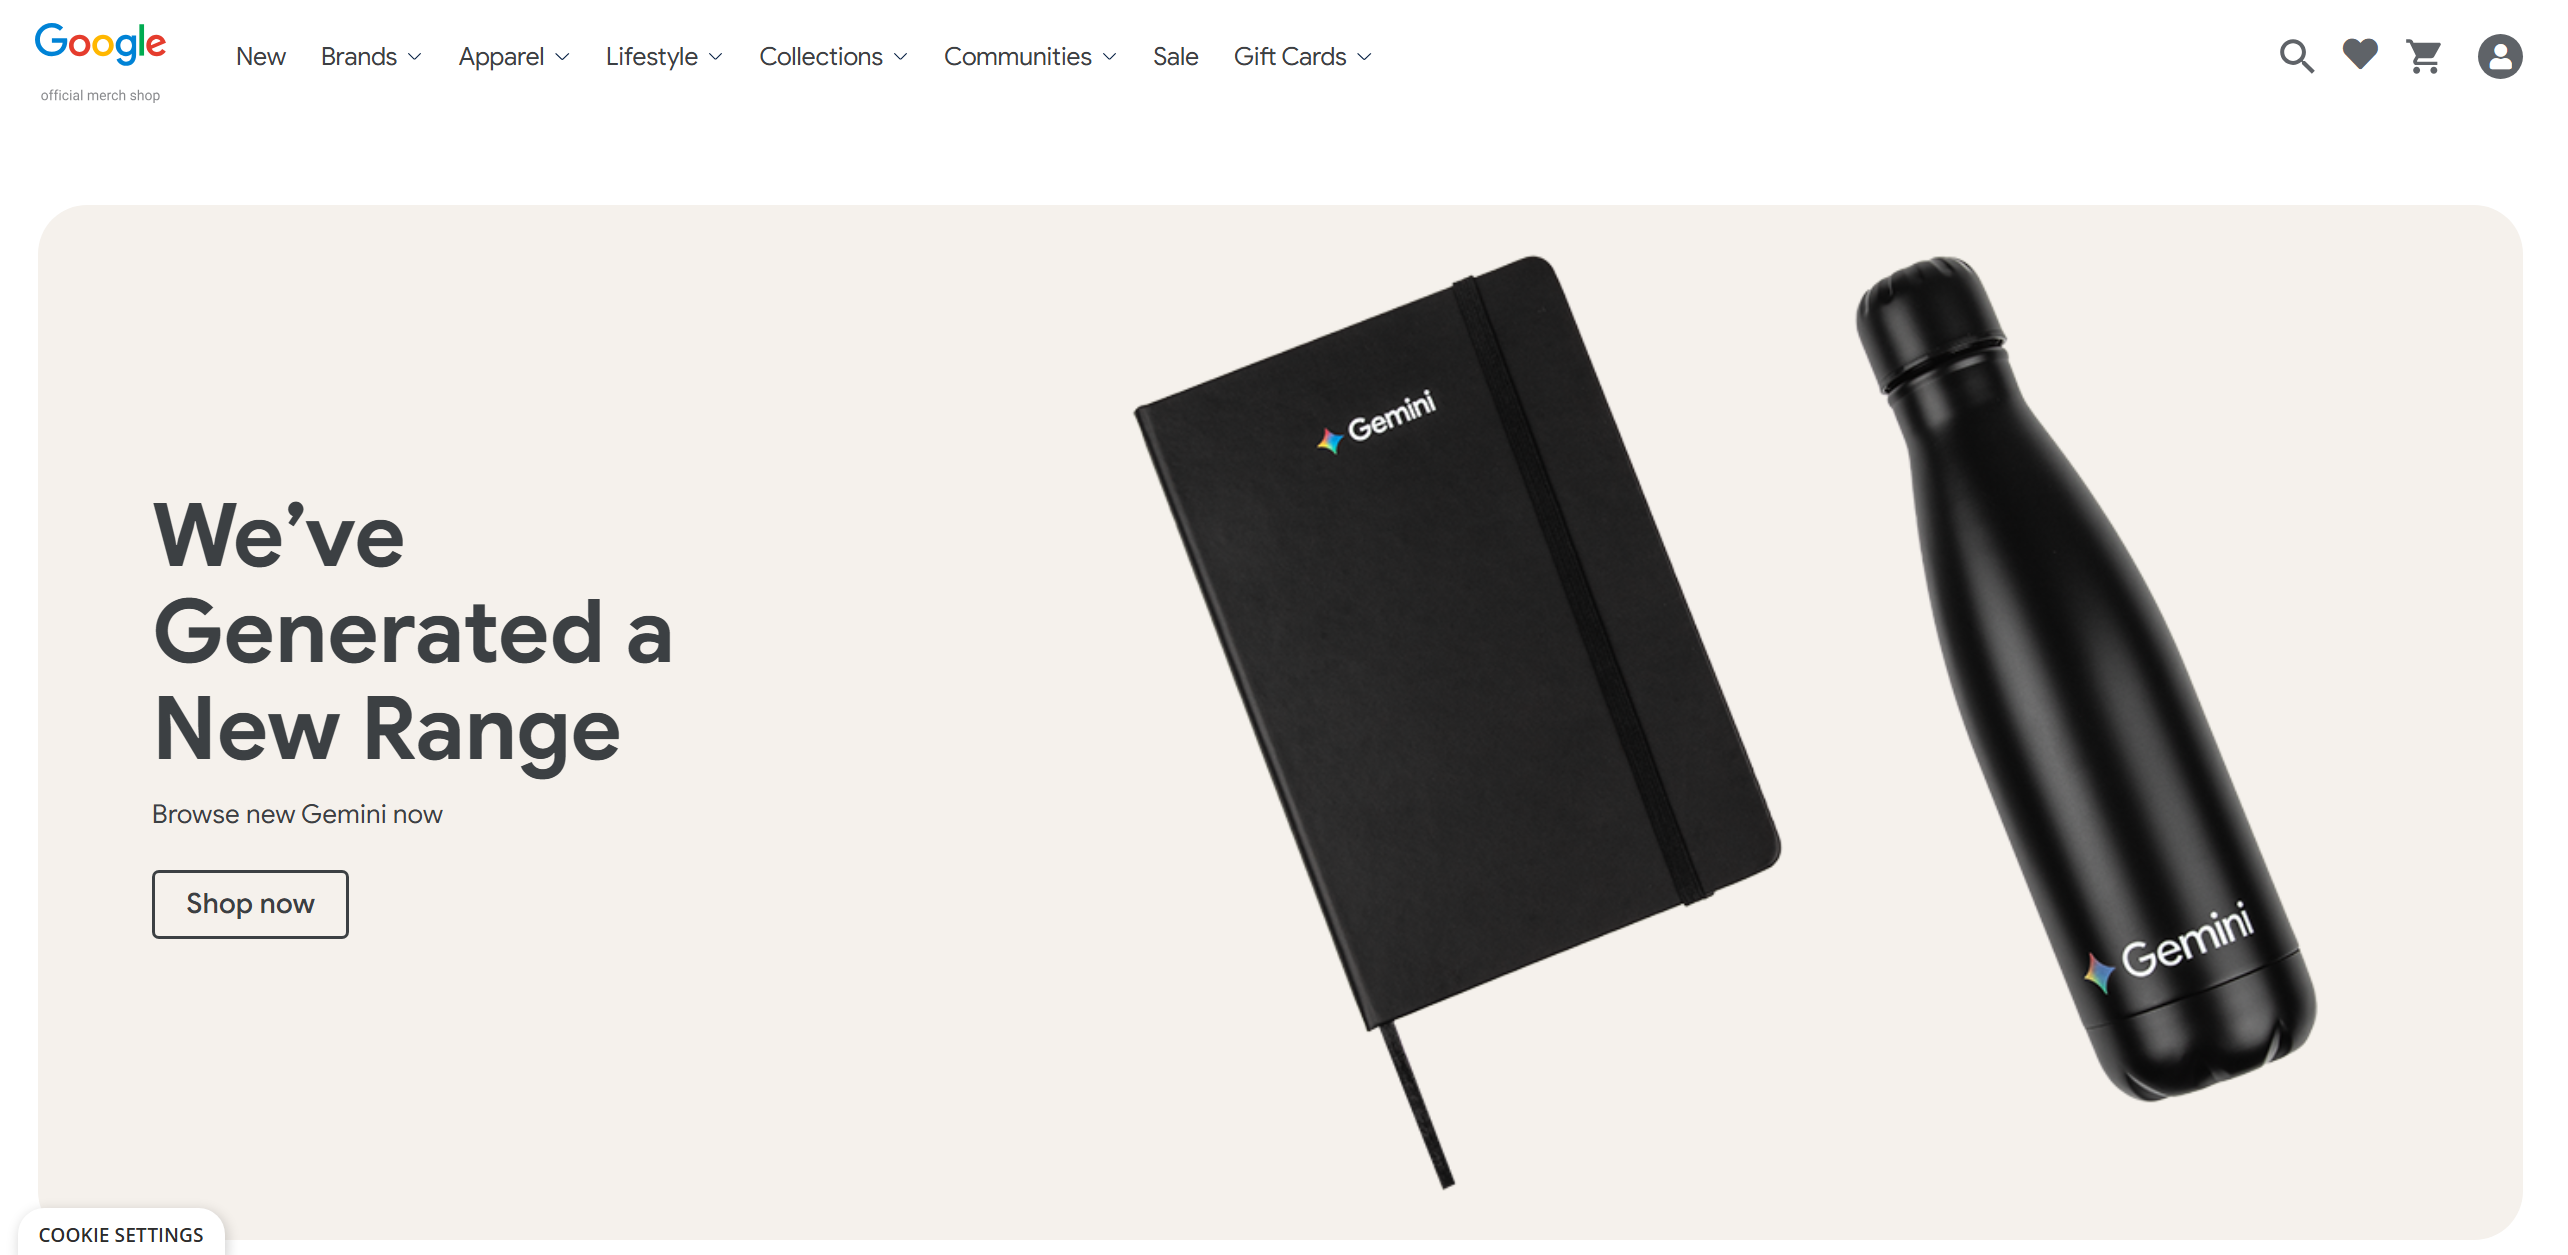

# <span style="background: linear-gradient(90deg,#6a5acd,#7bdff2,#b9fbc0); -webkit-background-clip: text; background-clip: text; color: transparent;">üöÄ Acquisition: ÏÇ¨Ïö©ÏûêÎì§ÏùÑ Ïñ¥ÎñªÍ≤å Îç∞Î†§Ïò¨ Í≤ÉÏù∏Í∞Ä?</span>

<p align="center" style="color:#6b7280;margin-top:4px;">
  Ïã†Í∑ú Ïú†ÏûÖÏùÑ ÎäòÎ¶¨Í≥†, ÎÇ®Í≤å ÌïòÍ≥†, Í≤∞Íµ≠ Í≤∞Ï†úÎ°ú Ïó∞Í≤∞ÏãúÌÇ§Îäî Ï†Ñ Í≥ºÏ†ïÏùò Ï†ÑÎûµ
</p>

<hr style="border:0; height:1px; background:linear-gradient(90deg,#e5e7eb,#d1d5db,#e5e7eb); margin:16px 0;">

<!-- üîù ÏúÑÏ™Ω Î†àÏù¥ÏïÑÏõÉ ÎÅäÍ∏∞ -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

<!-- ÏÑ§Î™Ö Î∞ïÏä§ (ÏûêÏ≤¥ ÎÅäÍπÄ: overflow + contain) -->
<div style="border:1px solid #e5e7eb;border-radius:14px;padding:16px 18px;background:linear-gradient(180deg,#ffffff,#fafafa); word-break:break-word; overflow-wrap:anywhere; overflow:auto; contain:content; box-sizing:border-box;">
  <p style="margin:0;font-size:15px;line-height:1.6;color:#374151;">
    <strong>Acquisition</strong>ÏùÄ Ïö∞Î¶¨ ÏÑúÎπÑÏä§Î°ú <strong>Ïã†Í∑ú Í≥†Í∞ù</strong>ÏùÑ Îç∞Î†§Ïò§Îäî Î™®Îì† ÌôúÎèôÏùÑ ÎßêÌï¥Ïöî. 
    ÌïµÏã¨ÏùÄ <strong>Ï±ÑÎÑêÎ≥Ñ ÏÑ±Í≥ºÎ•º ÌåêÎ≥Ñ</strong>ÌïòÎäî Í≤É. Ïñ¥Îñ§ Ï±ÑÎÑêÏù¥ Ïú†Ï†ÄÎ•º Íæ∏Ï§ÄÌûà ÎÇ®Í≤å ÌïòÍ≥†,
    <strong>ÌôúÎèô¬∑Í≤∞Ï†ú Ï†ÑÌôò</strong>ÍπåÏßÄ Ïù¥ÎÅÑÎäîÏßÄ ÏïåÏïÑÏïº ÏòàÏÇ∞ÏùÑ ÎòëÎòëÌïòÍ≤å Î∞∞Î∂ÑÌï† Ïàò ÏûàÏ£†.
  </p>
</div>

<!-- Ïôú Ï§ëÏöîÌïúÍ∞Ä -->
<details style="margin-top:10px;">
  <summary style="cursor:pointer;font-weight:700;">üí° Ïôú Ï§ëÏöîÌïúÍ∞Ä (ÌÅ¥Î¶≠Ìï¥ÏÑú Ïó¥Í∏∞)</summary>
  <div style="border-left:4px solid #7c3aed;padding:10px 12px;margin-top:8px;background:#faf5ff;border-radius:8px; word-break:break-word; overflow-wrap:anywhere;">
    <ul style="margin:0 0 0 16px;color:#4b5563;">
      <li>Ï±ÑÎÑêÎ≥Ñ ROIÎ•º Î™ÖÌôïÌûà Ï∏°Ï†ïÌïòÍ≥† ÏòàÏÇ∞ÏùÑ <strong>Ìö®Ïú®Ï†ÅÏúºÎ°ú Î∞∞Î∂Ñ</strong></li>
      <li>Ï¥àÍ∏∞ Ïú†ÏûÖÏù¥ <strong>ÏûîÏ°¥¬∑Í≤∞Ï†ú</strong>Î°ú Ïù¥Ïñ¥ÏßÄÎäî <em>Ïßà Ï¢ãÏùÄ Ìä∏ÎûòÌîΩ</em> ÏÑ†Î≥Ñ</li>
      <li>Ï∫†ÌéòÏù∏ Î∞è ÌÅ¨Î¶¨ÏóêÏù¥Ìã∞Î∏åÏùò <strong>ÏßÄÏÜçÏ†ÅÏù∏ Ïã§Ìóò¬∑ÌïôÏäµ</strong> Î£®ÌîÑ Íµ¨Ï∂ï</li>
    </ul>
  </div>
</details>

<!-- üîù KPI ÏúÑÏ™Ω ÎÅäÍ∏∞ -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

## üìä KPI ÏòàÏãú

<!-- ÌîåÎ†âÏä§ Ïπ¥Îìú Ïª®ÌÖåÏù¥ÎÑà (Î∂ÄÎ™®Í∞Ä ÏûêÏãù ÎÜíÏù¥ Ïù∏ÏãùÌïòÍ≤å BFC ÏÉùÏÑ±) -->
<div style="display:flex; flex-wrap:wrap; gap:12px; align-items:stretch; clear:both; overflow:auto; contain:content; box-sizing:border-box;">

  <!-- Ïπ¥Îìú 1 -->
  <div style="flex:1 1 260px; min-width:260px; border:1px solid #e5e7eb; border-radius:14px; padding:14px; background:#ffffff; box-sizing:border-box; word-break:break-word; overflow-wrap:anywhere;">
    <div style="font-weight:700;">üß≠ ÏÑ∏ÏÖò Ïàò</div>
    <div style="font-size:13px; color:#6b7280; margin-top:4px;">
      Ï±ÑÎÑê¬∑Ï∫†ÌéòÏù∏Î≥Ñ Ìä∏ÎûòÌîΩ Í∑úÎ™® ÌååÏïÖÏùò Í∏∞Î≥∏ ÏßÄÌëú
    </div>
    <div style="margin-top:8px;">
      <span style="background:#eef2ff;color:#3730a3;border-radius:999px;padding:4px 8px;font-size:12px;">Í∑úÎ™®</span>
      <span style="background:#ecfeff;color:#155e75;border-radius:999px;padding:4px 8px;font-size:12px;">Ïú†ÏûÖÍ∞ïÎèÑ</span>
    </div>
  </div>

  <!-- Ïπ¥Îìú 2 -->
  <div style="flex:1 1 260px; min-width:260px; border:1px solid #e5e7eb; border-radius:14px; padding:14px; background:#ffffff; box-sizing:border-box; word-break:break-word; overflow-wrap:anywhere;">
    <div style="font-weight:700;">‚è±Ô∏è Ï≤¥Î•ò ÏãúÍ∞Ñ</div>
    <div style="font-size:13px; color:#6b7280; margin-top:4px;">
      Ïú†ÏûÖ ÌíàÏßà¬∑ÏΩòÌÖêÏ∏† Ï†ÅÌï©ÎèÑÎ•º Î≥¥Ïó¨Ï£ºÎäî Ï∞∏Ïó¨ ÏßÄÌëú
    </div>
    <div style="margin-top:8px;">
      <span style="background:#f0fdf4;color:#166534;border-radius:999px;padding:4px 8px;font-size:12px;">Ï∞∏Ïó¨ÎèÑ</span>
      <span style="background:#fff7ed;color:#9a3412;border-radius:999px;padding:4px 8px;font-size:12px;">Í¥ÄÏã¨ÎèÑ</span>
    </div>
  </div>

  <!-- Ïπ¥Îìú 3 -->
  <div style="flex:1 1 260px; min-width:260px; border:1px solid #e5e7eb; border-radius:14px; padding:14px; background:#ffffff; box-sizing:border-box; word-break:break-word; overflow-wrap:anywhere;">
    <div style="font-weight:700;">üîÅ Ïû¨Î∞©Î¨∏Ïûê ÎπÑÏú®</div>
    <div style="font-size:13px; color:#6b7280; margin-top:4px;">
      Ï±ÑÎÑêÏù¥ <strong>ÏßÄÏÜç ÏÇ¨Ïö©</strong>ÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäîÏßÄ ÌôïÏù∏ÌïòÎäî ÏûîÏ°¥ ÏßÄÌëú
    </div>
    <div style="margin-top:8px;">
      <span style="background:#fdf4ff;color:#7e22ce;border-radius:999px;padding:4px 8px;font-size:12px;">Î¶¨ÌÖêÏÖò</span>
      <span style="background:#fff1f2;color:#9f1239;border-radius:999px;padding:4px 8px;font-size:12px;">Ï∂©ÏÑ±ÎèÑ</span>
    </div>
  </div>

</div>

<!-- üîö KPI ÏïÑÎûò ÎÅäÍ∏∞ -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

<!-- Î≥¥ÎÑàÏä§ ÌåÅ Î∞ïÏä§ (ÏûêÏ≤¥ ÎÅäÍπÄ: overflow + contain) -->
<div style="margin-top:14px;padding:10px 12px;border:1px dashed #e5e7eb;border-radius:12px;background:#fcfcfd; word-break:break-word; overflow-wrap:anywhere; overflow:auto; contain:content; box-sizing:border-box;">
  <span style="font-weight:700;">üìå ÌåÅ:</span>
  <span style="color:#4b5563;">KPIÎäî <strong>Ï±ÑÎÑê ÎπÑÍµê</strong>Í∞Ä ÌïµÏã¨! ÎèôÏùºÌïú Í∏∞Í∞Ñ¬∑ÏÑ∏Í∑∏Î®ºÌä∏(Ïòà: Ïã†Í∑ú/Ïû¨Î∞©Î¨∏) Í∏∞Ï§ÄÏúºÎ°ú ÎπÑÍµêÌïòÏÑ∏Ïöî.</span>
</div>


## 1.1. Ïú†ÏûÖÍ≤ΩÎ°ú

### (1)ÏµúÎã§ Ïú†ÏûÖ Í≤ΩÎ°ú

Íµ¨Í∏Ä MD ÏÉµÏóêÎäî Ïñ¥Îäê Í≤ΩÎ°úÎ°ú ÏÇ¨ÎûåÎì§Ïù¥ Îì§Ïñ¥ÎäîÍ±∏ÍπåÏöî? ÏÉÅÏúÑ 10Í∞ú Ïú†ÏûÖ Í≤ΩÎ°úÎ•º ÌååÏïÖÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
# ÏÉÅÏúÑ 10Í∞ú Ïú†ÏûÖ Í≤ΩÎ°úÎ•º ÌååÏïÖÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

kdf = df.copy()
kdf["source"] = kdf["trafficSource.source"]

# Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Îì±Ïû• ÌöüÏàòÎ•º ÏßëÍ≥ÑÌïòÏó¨ ÏÉÅÏúÑ 10Í∞úÎ•º Î≥¥Í≤†ÏäµÎãàÎã§.
df_inflow = (
    kdf["source"]
      .***(dropna=True)              # Í∞Å Í≤ΩÎ°úÎ≥ÑÎ°ú Í∞úÏàòÎ•º ÏÑ∏Î≥ºÍ≤åÏöî! Í≤∞Ï∏°ÏπòÎäî Ï†úÏô∏ÌïòÍ≤†ÏäµÎãàÎã§.
      .rename_axis("source")         # Ïù∏Îç±Ïä§ Ïù¥Î¶ÑÏùÑ 'source'Î°ú Î∂ôÏù¥Í≤†ÏäµÎãàÎã§.
      .reset_index(name="count")     # ÎπàÎèÑÎ•º 'count' Ïª¨ÎüºÏúºÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
      .head(10)                      # ÏÉÅÏúÑ 10Í∞úÎßå Î≥¥Í≤†ÏäµÎãàÎã§.
)

# Í≤∞Í≥ºÎ•º Î∞îÎ°ú ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
display(df_inflow)

source  count
0                google  91088
1              (direct)  78836
2           youtube.com   9780
3  analytics.google.com   5594
4              Partners   4418
5        m.facebook.com   1624
6            google.com   1157
7                   dfa    907
8      sites.google.com    652
9            reddit.com    553

Íµ¨Í∏ÄÏùÑ ÌÜµÌïú Ïú†ÏûÖÏù¥ Ï†úÏùº ÎßéÎÑ§Ïöî!<br>
Í∑∏ Îã§ÏùåÏóêÎäî ÏÇ¨Ïù¥Ìä∏Î°ú ÏßÅÏ†ë Îì§Ïñ¥Ïò® Ïú†ÏûÖÏù¥ÎÑ§Ïöî.

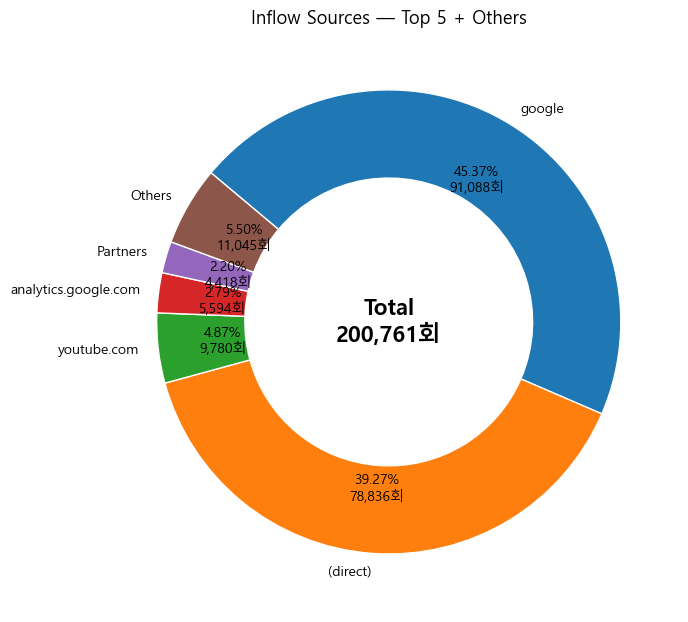

In [5]:
# ÎèÑÎÑõ Ï∞®Ìä∏Î°ú ÏÉÅÏúÑ Ïú†ÏûÖ Í≤ΩÎ°úÎ•º ÌïúÎààÏóê Î≥¥Í≤†ÏäµÎãàÎã§.

# ÏÜåÏä§ Ïª¨ÎüºÏùÑ Í≤∞Ï∏°Í≥º Í≥µÎ∞±ÏùÑ Ï†ïÎ¶¨Ìï©ÎãàÎã§.
vc = (
    kdf["source"]
      .fillna("(not set)")
      .astype(str).str.strip()
      .value_counts()
)

# ÏßëÍ≥ÑÎ•º Ìëú ÌòïÌÉúÎ°ú Î∞îÍøâÎãàÎã§.
base = vc.rename_axis("source").reset_index(name="count")
base["count"] = pd.to_numeric(base["count"], errors="coerce").fillna(0).astype(int)

# ÏÉÅÏúÑ 5Í∞úÏôÄ ÎÇòÎ®∏ÏßÄÎ•º OthersÎ°ú Î¨∂ÏäµÎãàÎã§.
top5 = base.head(5).copy()
others = int(base["count"].iloc[5:].sum())
if others > 0:
    top5 = pd.concat([top5, pd.DataFrame([{"source": "Others", "count": others}])], ignore_index=True)

labels = top5["source"].tolist()
values = top5["count"].to_numpy()
total  = int(values.sum())

# ÌçºÏÑºÌä∏ÏôÄ Í±¥ÏàòÎ•º Ïõ®ÏßÄ ÏïàÏóê Í∞ôÏù¥ ÌëúÏãúÌï©ÎãàÎã§.
def autopct_fmt(vals):
    s = np.sum(vals)
    def _fmt(pct):
        v = int(round(pct * s / 100.0))
        return f"{pct:.2f}%\n{v:,}Ìöå"
    return _fmt

# ÎèÑÎÑõ Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    values,
    labels=labels,
    startangle=140,
    counterclock=False,
    autopct=autopct_fmt(values),
    pctdistance=0.72,
    labeldistance=1.08,
    wedgeprops=dict(width=0.38, edgecolor="white")
)

# Í∞ÄÏö¥Îç∞Ïóê Ï¥ùÌï©ÏùÑ ÌëúÏãúÌï©ÎãàÎã§.
ax.text(0, 0, f"Total\n{total:,.0f}Ìöå", ha="center", va="center", fontsize=16, fontweight="bold")

# Ï†úÎ™©ÏùÑ Î∂ôÏù¥Í≥† Î™®ÏñëÏùÑ Ï†ïÎ¶¨Ìï©ÎãàÎã§.
ax.set_title("Inflow Sources ‚Äî Top 5 + Others", fontsize=13)
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

### (2) ÏùºÎ≥Ñ Ïú†ÏûÖ Í≤ΩÎ°ú

Ï†ÑÏ≤¥ ÏÑ∏ÏÖò ÎåÄÎπÑ ÎπÑÏú®ÏùÄ ÌååÏïÖÌñàÏäµÎãàÎã§. Ïù¥Î≤àÏóêÎäî day by dayÎ°ú ÌååÏïÖÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.<br>
1ÏúÑ Ïú†ÏûÖÍ≤ΩÎ°úÍ∞Ä Î∞îÎÄî Ïàò ÏûàÏúºÎãàÍπåÏöî. Î∞îÎÄêÎã§Î©¥ Í∑∏ ÏõêÏù∏ÏùÄ Ï∞æÏïÑÎ≥º ÏàòÎèÑ ÏûàÍ≤†ÏäµÎãàÎã§.

`.size()`Îäî Îç∞Ïù¥ÌÑ∞Ïùò Ï¥ù ÏàòÏùò Í∞ØÏàòÎ•º Íµ¨Ìï©ÎãàÎã§.<br>
Ï¶â, SeriesÏùº Í≤ΩÏö∞ ÌñâÏùò ÏàòÎ•º Î∞òÌôòÌïòÍ≥† DataFrameÏùò Í≤ΩÏö∞ ÌñâÏùòÏàò x Ïó¥ÏùòÏàò Î•º Î∞òÌôòÌï©ÎãàÎã§.

`apply()`Ìï®ÏàòÎäî DataFrameÏùò ÏπºÎüºÏóê Î≥µÏû°Ìïú Ïó∞ÏÇ∞ÏùÑ vectorizingÌï† Ïàò ÏûàÍ≤å Ìï¥Ï£ºÎäî Ìï®ÏàòÎ°ú Îß§Ïö∞ ÎßéÏù¥ ÌôúÏö©ÎêòÎäî Ìï®ÏàòÏóêÏöî.

`apply()` Ìï®ÏàòÎäî Í∞ÑÎã®Ìïú Í≤ΩÏö∞ lambda() Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï† Ïàò ÏûàÏúºÎ©∞, Î≥µÏû°Ìïú Í≤ΩÏö∞ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# ÎÇ†ÏßúÎ•º YYYYMMDDÏóêÏÑú datetime.dateÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
kdf["session_date"] = (
    pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.date
)

# ÏùºÏûêÏôÄ ÏÜåÏä§Î≥Ñ Î∞©Î¨∏ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
grouped = (
    kdf.groupby(["***", "***"], dropna=False)
       .size()
       .reset_index(name="visit_count")
       .rename(columns={"trafficSource.source": "source"})
)

# Í∞Å ÎÇ†ÏßúÎßàÎã§ Î∞©Î¨∏Ïàò ÏÉÅÏúÑ 5Í∞ú ÏÜåÏä§Îßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
df_daily = (
    grouped.groupby("session_date", group_keys=False)
           .apply(lambda g: g.nlargest(5, "visit_count"))
           .reset_index(drop=True)
           .rename(columns={"session_date": "date"})
)

# Í≤∞Í≥º ÏùºÎ∂ÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
df_daily.head(20)

C:\Users\Allen\AppData\Local\Temp\ipykernel_27452\2816227501.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(5, "visit_count"))


date                source  visit_count
0   2017-05-01                google         1051
1   2017-05-01              (direct)          787
2   2017-05-01           youtube.com          313
3   2017-05-01        m.facebook.com          151
4   2017-05-01  analytics.google.com           58
5   2017-05-02                google         1146
6   2017-05-02              (direct)          837
7   2017-05-02           youtube.com          251
8   2017-05-02        m.facebook.com           71
9   2017-05-02  analytics.google.com           64
10  2017-05-03                google         1242
11  2017-05-03              (direct)          723
12  2017-05-03           youtube.com          327
13  2017-05-03              Partners           59
14  2017-05-03     groups.google.com           50
15  2017-05-04                google         1218
16  2017-05-04              (direct)          679
17  2017-05-04           youtube.com          306
18  2017-05-04        m.facebook.com          172
19  2017-05-04                  t.co          103

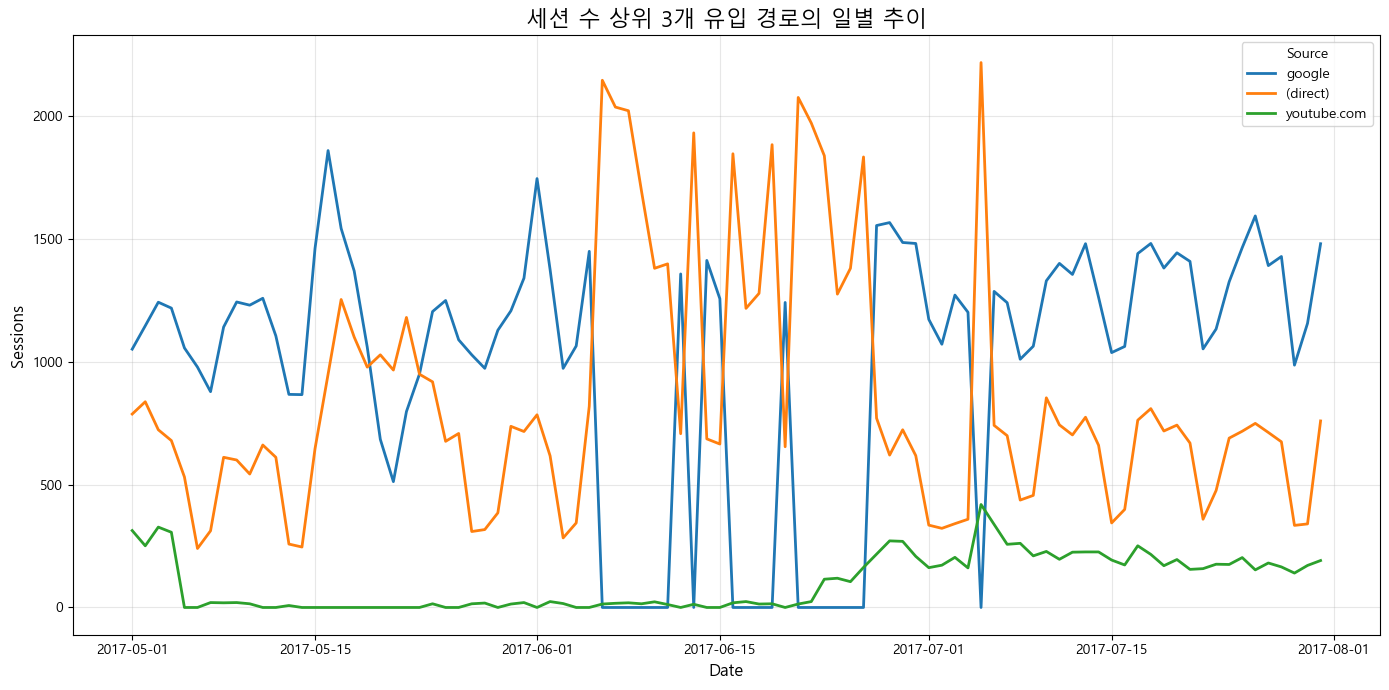

In [7]:
# ÏùºÎ≥Ñ ÏÉÅÏúÑ ÏÜåÏä§ Ï∂îÏù¥Î•º ÎùºÏù∏ Ï∞®Ìä∏Î°ú Î≥¥Í≤†ÏäµÎãàÎã§.

# ÌîºÎ≤óÏùÑ ÎßåÎì§Ïñ¥ ÎÇ†Ïßú√óÏÜåÏä§ ÌòïÌÉúÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
pivot_df = df_daily.pivot(index="date", columns="source", values="visit_count").fillna(0)

# Ï†ÑÏ≤¥ Ìï© Í∏∞Ï§Ä ÏÉÅÏúÑ 3Í∞ú ÏÜåÏä§Îßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
top3 = pivot_df.sum().nlargest(3).index
pivot_df = pivot_df[top3]

# ÎùºÏù∏ Ï∞®Ìä∏Î•º Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
plt.figure(figsize=(14, 7))
for src in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[src], label=src, linewidth=2)

# Ï∞®Ìä∏Ïùò Ï†úÎ™©Í≥º ÎùºÎ≤®ÏùÑ Ï∂îÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.
plt.title("ÏÑ∏ÏÖò Ïàò ÏÉÅÏúÑ 3Í∞ú Ïú†ÏûÖ Í≤ΩÎ°úÏùò ÏùºÎ≥Ñ Ï∂îÏù¥", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sessions", fontsize=12)

# Î≥¥Ï°∞ÏÑ†ÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Î≤îÎ°ÄÎ•º ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
plt.grid(alpha=0.3)
plt.legend(title="Source")

# Ïó¨Î∞±ÏùÑ Ï†ïÎ¶¨ÌïòÍ≥† Î≥¥Ïó¨Ï£ºÍ≤†ÏäµÎãàÎã§.
plt.tight_layout()
plt.show()


Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Íµ¨Í∏ÄÏùÑ ÌÜµÌïú Ï†ëÏÜçÏù¥ Ïö∞ÏÑ∏ÌïòÎã§Í∞Ä, directÎûë Îí§ÏßëÌûàÎäî Í≤ΩÏö∞Í∞Ä ÏûàÎÑ§Ïöî?!<br>
6Ïõî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í∑∏Îü∞ Í≤ÉÏúºÎ°ú ÌååÏïÖÎêòÎäîÎç∞Ïöî.<br>
Ïã§Ï†ú ÌîÑÎ°úÏ†ùÌä∏ÎùºÎ©¥ ÏõêÏù∏ÏùÑ Ï∞æÏïÑÎ≥ºÎßåÌïú ÌùêÎ¶ÑÏûÖÎãàÎã§.<br>
Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Ïùò Î¨∏Ï†úÏùº ÏàòÎèÑ ÏûàÍ≥†, ÌòπÏùÄ Ïô∏Î∂ÄÏùò ÏöîÏù∏Ïù¥ Í∞úÏûÖÌñàÏùÑ Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏäµÎãàÎã§.

`.agg()`Î©îÏÑúÎìúÎäî applyÏôÄ ÎπÑÏä∑ÌïòÍ≤å Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÎäî Î©îÏÑúÎìúÏù¥ÏßÄÎßå, Ïó¨Îü¨Í∞úÏùò Ìï®ÏàòÎ•º ÎèôÏãúÏóê Ï†ÅÏö©Ìï† Ïàò ÏûàÎã§Îäî Ïû•Ï†êÏù¥ ÏûàÏäµÎãàÎã§.

### (3) Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ïã†Í∑ú/Ïû¨Î∞©Î¨∏ÏûêÏùò ÎπÑÏú®

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Ïú†ÏûÖ Í≤ΩÎ°úÎ•º Î≥¥Í∏∞ ÏâΩÍ≤å Î≥ÑÏπ≠ Ïª¨ÎüºÏúºÎ°ú Î≥µÏÇ¨ÌïòÍ≤†ÏäµÎãàÎã§.
kdf["source"] = kdf["trafficSource.source"]

# Ïã†Í∑ú Î∞©Î¨∏ Ïó¨Î∂ÄÎ•º Ïà´ÏûêÎ°ú Í∞ïÏ†ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
kdf["newVisits_num"] = pd.to_numeric(kdf["totals.newVisits"], errors="coerce")

# Ïú†ÏûÖ Í≤ΩÎ°úÎ≥ÑÎ°ú Î∞©Î¨∏ ÏàòÏôÄ Ïã†Í∑ú Î∞©Î¨∏ ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
agg = (
    kdf.groupby("source", dropna=False)
       .***(
           visit_count=("source", "size"),
           new_visitors=("newVisits_num", lambda s: np.nansum(s == 1.0))
       )
       .reset_index()
)

# Ïû¨Î∞©Î¨∏ ÏàòÏôÄ ÎπÑÏú® ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
agg["returning_visitors"] = agg["visit_count"] - agg["new_visitors"]
agg["new_visitors_rate"] = np.where(agg["visit_count"] > 0, agg["new_visitors"] / agg["visit_count"], np.nan)
agg["returning_visitors_rate"] = np.where(agg["visit_count"] > 0, agg["returning_visitors"] / agg["visit_count"], np.nan)

# Î∞©Î¨∏ Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú Ïú†ÏûÖ Í≤ΩÎ°úÎßå ÍπîÎÅîÌïòÍ≤å Ï†ïÎ¶¨Ìï¥ÏÑú Î≥¥Ïó¨Ï£ºÍ≤†ÏäµÎãàÎã§.
df_visit = (
    agg.sort_values("visit_count", ascending=False)
       .loc[:, ["source", "visit_count", "new_visitors_rate", "returning_visitors_rate"]]
       .head(10)
       .reset_index(drop=True)
)

df_visit

source  visit_count  new_visitors_rate  \
0                google        91088           0.790620   
1              (direct)        78836           0.709016   
2           youtube.com         9780           0.919121   
3  analytics.google.com         5594           0.609939   
4              Partners         4418           0.746718   
5        m.facebook.com         1624           0.889778   
6            google.com         1157           0.869490   
7                   dfa          907           0.076075   
8      sites.google.com          652           0.277607   
9            reddit.com          553           0.728752   

   returning_visitors_rate  
0                 0.209380  
1                 0.290984  
2                 0.080879  
3                 0.390061  
4                 0.253282  
5                 0.110222  
6                 0.130510  
7                 0.923925  
8                 0.722393  
9                 0.271248

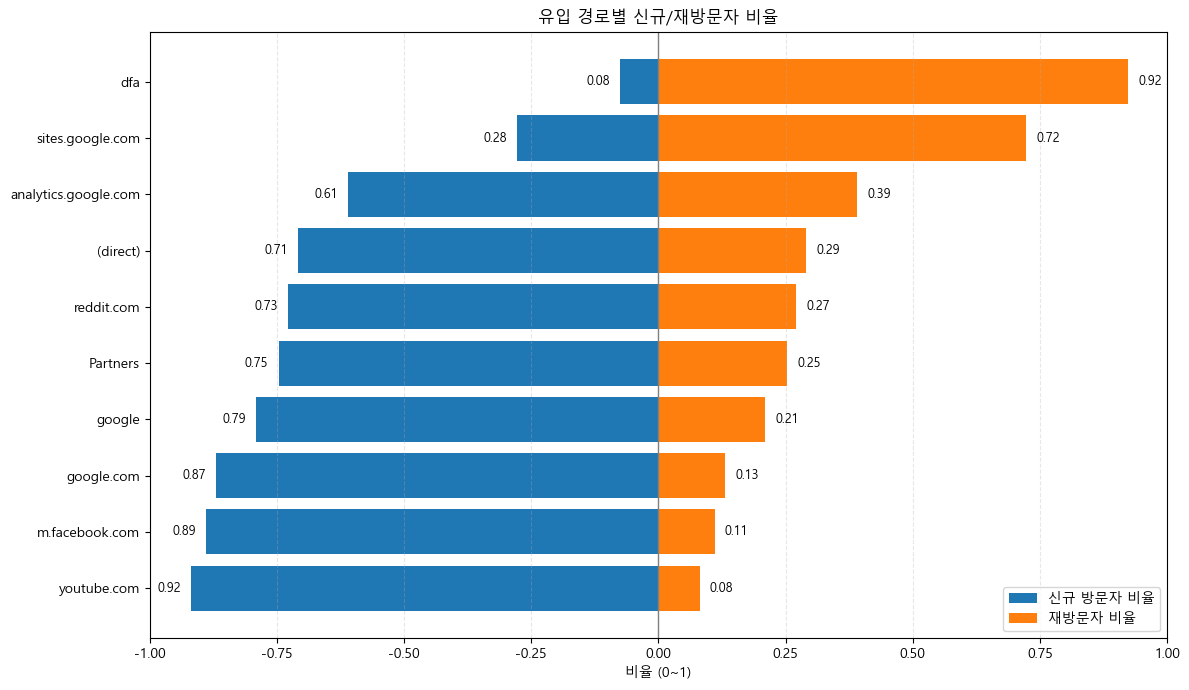

In [9]:
# ÌëúÏãúÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î≥µÏÇ¨ÌïòÍ≥† Í≤∞Ï∏° ÎπÑÏú®ÏùÄ 0ÏúºÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
plot_df = df_visit.copy()
plot_df["new_visitors_rate"] = plot_df["new_visitors_rate"].fillna(0.0)
plot_df["returning_visitors_rate"] = plot_df["returning_visitors_rate"].fillna(0.0)

# Ïã†Í∑ú Î∞©Î¨∏Ïûê ÎπÑÏú®Ïù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
plot_df = plot_df.sort_values("new_visitors_rate", ascending=False).reset_index(drop=True)

# Ï¢åÏö∞ ÏñëÎ∂Ñ ÎßâÎåÄÎ•º Í∑∏Î¶¨Í∏∞ ÏúÑÌïú Í∞íÍ≥º ÎùºÎ≤®ÏùÑ Ï§ÄÎπÑÌïòÍ≤†ÏäµÎãàÎã§.
y = np.arange(len(plot_df))
left_vals  = -plot_df["new_visitors_rate"].to_numpy()      # ÏôºÏ™ΩÏóêÎäî Ïã†Í∑ú ÎπÑÏú®ÏùÑ ÏùåÏàòÎ°ú ÎëêÍ≤†ÏäµÎãàÎã§.
right_vals =  plot_df["returning_visitors_rate"].to_numpy() # Ïò§Î•∏Ï™ΩÏóêÎäî Ïû¨Î∞©Î¨∏ ÎπÑÏú®ÏùÑ ÎëêÍ≤†ÏäµÎãàÎã§.
labels = plot_df["source"].tolist()

# Îã®ÏàúÌïòÍ≤å 0~1 ÎπÑÏú® Ïä§ÏºÄÏùºÎ°ú Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
xlim_left, xlim_right = -1.0, 1.0

# Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í≥† Ï†úÎ™©/ÎùºÎ≤®ÏùÑ Î∂ôÏù¥Í≤†ÏäµÎãàÎã§.
plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.barh(y, left_vals,  label="Ïã†Í∑ú Î∞©Î¨∏Ïûê ÎπÑÏú®")
ax.barh(y, right_vals, label="Ïû¨Î∞©Î¨∏Ïûê ÎπÑÏú®")
ax.axvline(0, color="gray", linewidth=1)  # Ï§ëÏïô Í∏∞Ï§ÄÏÑ†ÏùÑ ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
ax.set_yticks(y, labels)
ax.set_xlim(xlim_left, xlim_right)
ax.set_xlabel("ÎπÑÏú® (0~1)")
ax.set_title("Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ïã†Í∑ú/Ïû¨Î∞©Î¨∏Ïûê ÎπÑÏú®")
ax.legend(loc="lower right")
ax.grid(axis="x", linestyle="--", alpha=0.3)

# ÎßâÎåÄ ÎÅùÏóê Í∞íÏùÑ Í∞ÑÎã®Ìûà ÌëúÍ∏∞ÌïòÍ≤†ÏäµÎãàÎã§.
for i, (lv, rv) in enumerate(zip(left_vals, right_vals)):
    ax.text(lv - 0.02, i, f"{abs(lv):.2f}", va="center", ha="right", fontsize=9)
    ax.text(rv + 0.02, i, f"{rv:.2f}",     va="center", ha="left",  fontsize=9)

plt.tight_layout()
plt.show()

* **dfa**: GoogleÏùò DFA(Campaign Manager 360Ïùò Ïù¥Ï†Ñ Î≤ÑÏ†Ñ) Í¥ëÍ≥† Ï∫†ÌéòÏù∏ÏóêÏÑú Ïú†ÏûÖ
* **sites.google.com**: Îã§Î•∏ ÏÇ¨Ïö©ÏûêÍ∞Ä ÎßåÎì† Google Sites ÌéòÏù¥ÏßÄÏóê ÌåêÎß§ÏûêÏùò ÏõπÏÇ¨Ïù¥Ìä∏ ÎßÅÌÅ¨Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥, Ìï¥Îãπ ÎßÅÌÅ¨Î•º ÌÜµÌï¥ Î∞©Î¨∏ÏûêÍ∞Ä Ïú†ÏûÖ (Ïù¥Î≤à Î∂ÑÏÑùÏóêÏÑú ÌåêÎß§ÏûêÎäî Goolge Merchandise Store)

### (4) Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ï≤¥Î•ò ÏãúÍ∞Ñ

In [ ]:
# ÏõêÎ≥∏ÏùÑ ÏßÄÌÇ§Í∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Ï≤¥Î•ò ÏãúÍ∞ÑÏùÑ Ïà´ÏûêÎ°ú Î∞îÍøîÏÑú Í≥ÑÏÇ∞Ïù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
kdf["timeOnSite_num"] = pd.to_numeric(kdf["totals.timeOnSite"], errors="coerce")

# Ïú†ÏûÖ Í≤ΩÎ°úÎ≥ÑÎ°ú Î∞©Î¨∏ ÏàòÏôÄ Ï≤¥Î•ò ÏãúÍ∞Ñ Ï§ëÏïôÍ∞íÏùÑ ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
df_timeOnScreen = (
    kdf.groupby("trafficSource.source")
       .***(
           visit_count=("trafficSource.source", "size"), # `trafficSource.source`Ïóê sizeÎ•º Ï†ÅÏö©..~
           median_screen_time=("timeOnSite_num", "median") # `timeOnSite_num`Ïóê medianÏùÑ Ï†ÅÏö©..~
       )
       .rename_axis(None)
       .reset_index()
       .rename(columns={"index": "source"})
       .sort_values("visit_count", ascending=False)
       .head(10)
       .reset_index(drop=True)
)

# Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
df_timeOnScreen

source  visit_count  median_screen_time
0                google        91088                91.0
1              (direct)        78836               108.0
2           youtube.com         9780                73.0
3  analytics.google.com         5594                89.5
4              Partners         4418               109.0
5        m.facebook.com         1624                66.5
6            google.com         1157                99.0
7                   dfa          907               110.0
8      sites.google.com          652                43.0
9            reddit.com          553                45.0

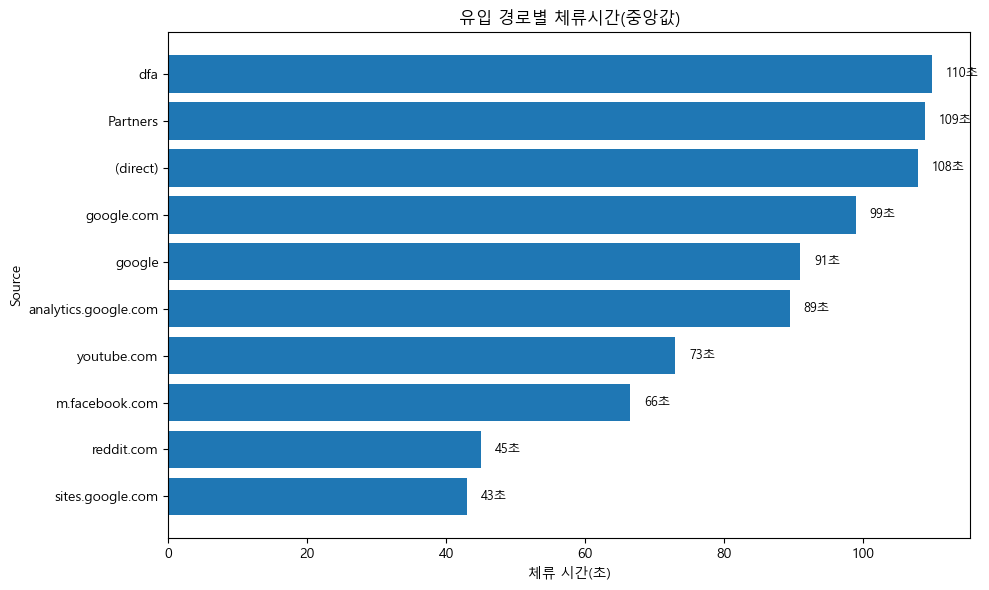

In [ ]:
# Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ï≤¥Î•òÏãúÍ∞Ñ(Ï§ëÏïôÍ∞í)ÏùÑ Í∞ÄÎ°ú ÎßâÎåÄÎ°ú Îã®ÏàúÌûà Í∑∏Î†§ÏÑú ÎπÑÍµêÌïòÍ≤†ÏäµÎãàÎã§.

# Îç∞Ïù¥ÌÑ∞Îäî Î≥µÏÇ¨Î≥∏ÏúºÎ°ú Ï†ïÎ†¨Îßå Ìï¥ÏÑú ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
plot_df = df_timeOnScreen.copy().sort_values("median_screen_time", ascending=True)

# Í∞ÄÎ°ú ÎßâÎåÄÎ•º Í∑∏Î†§ÏÑú Í∞íÏùÑ ÌïúÎààÏóê ÎπÑÍµêÌïòÍ≤†ÏäµÎãàÎã§.
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_df["source"], plot_df["median_screen_time"])

# Í∞Å ÎßâÎåÄ ÎÅùÏóê Í∞íÏùÑ Ï¥à Îã®ÏúÑÎ°ú ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
for bar, val in zip(bars, plot_df["median_screen_time"]):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f"{int(val)}Ï¥à", va="center", fontsize=9)

# Ï†úÎ™©Í≥º Ï∂ï ÎùºÎ≤®ÏùÑ Í∞ÑÎã®Ìûà Îã¨Í≤†ÏäµÎãàÎã§.
plt.title("Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ï≤¥Î•òÏãúÍ∞Ñ(Ï§ëÏïôÍ∞í)")
plt.xlabel("Ï≤¥Î•ò ÏãúÍ∞Ñ(Ï¥à)")
plt.ylabel("Source")

# Î†àÏù¥ÏïÑÏõÉÏùÑ ÏûêÎèôÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
plt.tight_layout()
plt.show()

* Partner: GoogleÍ≥º Ï†úÌú¥ Í¥ÄÍ≥ÑÏóê ÏûàÎäî ÌÉÄÏÇ¨ ÌîåÎû´ÌèºÏù¥ÎÇò ÏÑúÎπÑÏä§Î•º ÌÜµÌï¥ Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩ

## 1.2. Ï∫†ÌéòÏù∏Î≥Ñ ÏÑ∏ÏÖò Ïàò

In [ ]:
# Ï∫†ÌéòÏù∏Î≥ÑÎ°ú Î∞©Î¨∏ ÏàòÎ•º Í∞ÑÎã®Ìûà ÏßëÍ≥ÑÌï¥ÏÑú ÎßéÏù¥ Ïò® ÏàúÏúºÎ°ú Î≥¥Ïó¨Ï£ºÍ≤†ÏäµÎãàÎã§.

kdf = df.copy()  # ÏõêÎ≥∏ÏùÑ Î≥¥Ìò∏ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.

df_campaign = (
    kdf.***("trafficSource.campaign", dropna=False)       # Í≤∞Ï∏° Ï∫†ÌéòÏù∏ÎèÑ ÌïòÎÇòÏùò Í∑∏Î£πÏúºÎ°ú Î≥¥Í≤†ÏäµÎãàÎã§.
      .***()                                              # Í∞Å Ï∫†ÌéòÏù∏Ïùò Î∞©Î¨∏ ÏàòÎ•º ÏÑ∏Í≤†ÏäµÎãàÎã§.
      .reset_index(name="visit_count")                    # Î∞©Î¨∏ ÏàòÎ•º Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
      .rename(columns={"trafficSource.campaign": "campaign"})  # Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÏùΩÍ∏∞ ÏâΩÍ≤å Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
      .sort_values("visit_count", ascending=False)        # Î∞©Î¨∏ ÏàòÍ∞Ä ÎßéÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
      .reset_index(drop=True)                             # Ï†ïÎ†¨ ÌõÑ Ïù∏Îç±Ïä§Î•º Îã§Ïãú Îß§Í∏∞Í≤†ÏäµÎãàÎã§.
)

df_campaign.head(20)  # ÏÉÅÏúÑ 20Í∞úÎ•º ÎØ∏Î¶¨ ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.

campaign  visit_count
0                           (not set)       191276
1                    Data Share Promo         4418
2                    AW - Accessories         3002
3  AW - Dynamic Search Ads Whole Site         2038
4                        AW - Apparel           25
5                    AW - Electronics            2

## 1.3. Î∞©Î¨∏ Îß§Ï≤¥Î≥Ñ ÏÑ∏ÏÖò Ïàò

In [ ]:
# Ïú†ÏûÖ Îß§Ï≤¥(medium)Î≥Ñ Î∞©Î¨∏ ÏàòÎ•º Í∞ÑÎã®Ìûà ÏßëÍ≥ÑÌï¥ÏÑú ÎßéÏù¥ Ïò® ÏàúÏÑúÎ°ú Î≥¥Ïó¨Ï£ºÍ≤†ÏäµÎãàÎã§.

kdf = df.copy()  # ÏõêÎ≥∏ÏùÑ Î≥¥Ìò∏ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.

df_medium = (
    kdf.***("trafficSource.medium", dropna=False)         # Í≤∞Ï∏° Îß§Ï≤¥ÎèÑ ÌïòÎÇòÏùò Í∑∏Î£πÏúºÎ°ú Î≥¥Í≤†ÏäµÎãàÎã§.
      .***()                                              # Í∞Å Îß§Ï≤¥Ïùò Î∞©Î¨∏ ÏàòÎ•º ÏÑ∏Í≤†ÏäµÎãàÎã§.
      .reset_index(name="visit_count")                    # Î∞©Î¨∏ ÏàòÎ•º Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
      .rename(columns={"trafficSource.medium": "medium"}) # Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÏùΩÍ∏∞ ÏâΩÍ≤å Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
      .sort_values("visit_count", ascending=False)        # Î∞©Î¨∏ ÏàòÍ∞Ä ÎßéÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
      .reset_index(drop=True)                             # Ï†ïÎ†¨ ÌõÑ Ïù∏Îç±Ïä§Î•º Îã§Ïãú Îß§Í∏∞Í≤†ÏäµÎãàÎã§.
)

df_medium.head(20)  # ÏÉÅÏúÑ 20Í∞úÎ•º ÎØ∏Î¶¨ ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.


medium  visit_count
0    organic        86564
1     (none)        78834
2   referral        24213
3        cpc         5321
4  affiliate         4418
5        cpm         1405
6  (not set)            6

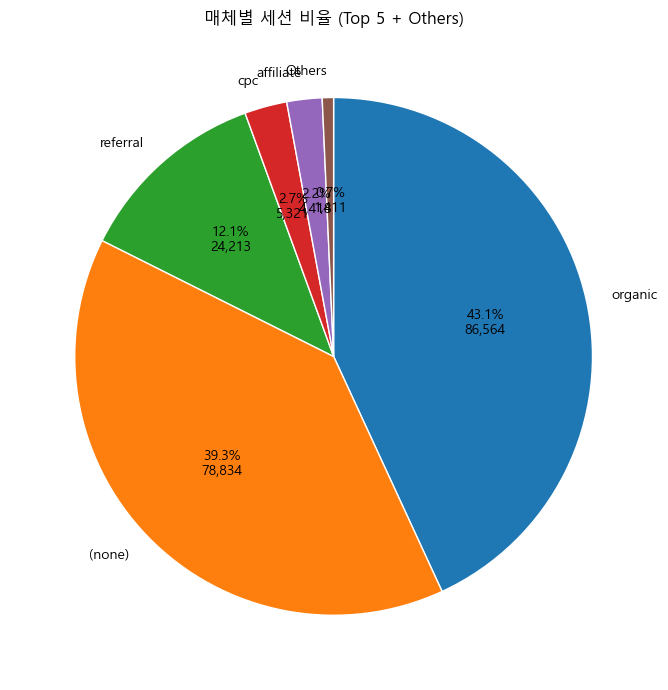

In [14]:
# Ïù¥ Îß§Ï≤¥Î≥Ñ ÎπÑÏ§ëÏùÑ Top 5 + OthersÎ°ú Í∞ÑÎã®Ìûà ÌååÏïÖÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

N = 5  # ÏÉÅÏúÑÏóê ÎÖ∏Ï∂úÌï† Îß§Ï≤¥ Í∞úÏàòÎ•º Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
top5 = df_medium.head(N).copy()  # ÏÉÅÏúÑ NÍ∞ú Îß§Ï≤¥Î•º Í∞ÄÏ†∏Ïò§Í≤†ÏäµÎãàÎã§.

# ÏÉÅÏúÑ NÍ∞ú Ïù¥ÌõÑÏùò Î∞©Î¨∏ ÏàòÎ•º Ìï©Ï≥êÏÑú OthersÎ°ú Î¨∂Í≤†ÏäµÎãàÎã§.
others_count = int(df_medium["visit_count"].iloc[N:].sum())
if others_count > 0:
    top5 = pd.concat(
        [top5, pd.DataFrame([{"medium": "Others", "visit_count": others_count}])],
        ignore_index=True
    )

# ÌååÏù¥Ï∞®Ìä∏Ïóê ÎÑ£ÏùÑ ÎùºÎ≤®Í≥º Í∞íÏùÑ Ï§ÄÎπÑÌïòÍ≤†ÏäµÎãàÎã§.
labels = top5["medium"].tolist()
values = top5["visit_count"].astype(float).to_numpy()
total = values.sum()

# Î∞©Î¨∏ ÏàòÏùò Ï¥ùÌï©Ïù¥ 0Ïù¥Î©¥ Ï∞®Ìä∏Î•º Í∑∏Î¶¨ÏßÄ ÏïäÍ≤†ÏäµÎãàÎã§.
if total == 0:
    print("Î∞©Î¨∏ ÏàòÍ∞Ä ÏóÜÏñ¥ ÌååÏù¥Ï∞®Ìä∏Î•º ÏÉùÎûµÌï©ÎãàÎã§.")
else:
    # ÌçºÏÑºÌä∏ÏôÄ Í±¥ÏàòÎ•º Ìï®Íªò Î≥¥Ïó¨Ï£ºÎäî Í∞ÑÎã®Ìïú Ìè¨Îß∑ÌÑ∞Î•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.
    def _autopct(pct):
        cnt = int(round(total * pct / 100.0))
        return f"{pct:.1f}%\n{cnt:,}"

    # ÌååÏù¥Ï∞®Ìä∏Î•º Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pie(
        values,
        labels=labels,          # Ï°∞Í∞Å ÎùºÎ≤®Î°ú Îß§Ï≤¥Î™ÖÏùÑ ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
        autopct=_autopct,       # ÌçºÏÑºÌä∏ÏôÄ Í±¥ÏàòÎ•º Ìï®Íªò ÌëúÍ∏∞ÌïòÍ≤†ÏäµÎãàÎã§.
        startangle=90,          # ÏúÑÏ™ΩÏóêÏÑú ÏãúÏûëÌïòÍ≤†ÏäµÎãàÎã§.
        counterclock=False,     # ÏãúÍ≥Ñ Î∞©Ìñ•ÏúºÎ°ú ÎèåÎ¶¨Í≤†ÏäµÎãàÎã§.
        wedgeprops=dict(linewidth=1, edgecolor="white")  # Í≤ΩÍ≥ÑÏÑ†ÏùÑ ÎÑ£Ïñ¥ Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏù¥Í≤†ÏäµÎãàÎã§.
    )
    ax.set_title("Îß§Ï≤¥Î≥Ñ ÏÑ∏ÏÖò ÎπÑÏú® (Top 5 + Others)")
    ax.set_aspect("equal")  # ÏõêÌòï ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÍ≤†ÏäµÎãàÎã§.
    plt.tight_layout()
    plt.show()


**none**
* Î≥¥ÌÜµ ÏßÅÏ†ë Î∞©Î¨∏(Direct Traffic)ÏùÑ ÏùòÎØ∏.
* ÏÇ¨Ïö©ÏûêÍ∞Ä URLÏùÑ ÏßÅÏ†ë ÏûÖÎ†•ÌïòÍ±∞ÎÇò Ï¶êÍ≤®Ï∞æÍ∏∞Î•º ÌÜµÌï¥ Ï†ëÏÜçÌïòÎäî Í≤ΩÏö∞, Ï∫†ÌéòÏù∏ Ï†ïÎ≥¥ ÏóÜÏù¥ mediumÏù¥ "(none)"ÏúºÎ°ú ÌëúÏãúÎê®.

**referral**
* Îã§Î•∏ ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÎßÅÌÅ¨Î•º ÌÜµÌï¥ Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩ.
* Î∞©Î¨∏ÏûêÍ∞Ä Ïô∏Î∂Ä ÏÇ¨Ïù¥Ìä∏Ïùò ÎßÅÌÅ¨Î•º ÌÅ¥Î¶≠Ìï¥ ÎèÑÏ∞©Ìïú Í≤ΩÏö∞ mediumÏù¥ "referral"Î°ú ÏÑ§Ï†ïÎê®.

**organic**
* Ïú†Î£å Í¥ëÍ≥†Í∞Ä ÏïÑÎãå, Í≤ÄÏÉâÏóîÏßÑÏùò ÏûêÏó∞ Í≤ÄÏÉâ Í≤∞Í≥º(Organic Search)ÏóêÏÑú Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩ.
* Íµ¨Í∏Ä, ÎÑ§Ïù¥Î≤Ñ, Îπô Îì±ÏóêÏÑú ÏûêÏó∞ Í≤ÄÏÉâ Í≤∞Í≥ºÎ°ú Î∞©Î¨∏ÌñàÏùÑ Îïå mediumÏùÄ "organic".

**affiliate**
* Ï†úÌú¥(affiliate) ÎßàÏºÄÌåÖÏùÑ ÌÜµÌï¥ Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩ.
* Ï†úÌú¥ ÌîÑÎ°úÍ∑∏Îû® ÎßÅÌÅ¨Î•º ÌÜµÌï¥ Î∞©Î¨∏Ìïú Í≤ΩÏö∞ Ïù¥ Í∞íÏù¥ ÏÇ¨Ïö©Îê®.

**cpc**
* ÌÅ¥Î¶≠Îãπ ÎπÑÏö©(Cost Per Click) Í¥ëÍ≥†Î•º ÌÜµÌï¥ Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩ.
* Íµ¨Í∏Ä Ïï†Ï¶àÏôÄ Í∞ôÏùÄ Ïú†Î£å Í≤ÄÏÉâ Ï∫†ÌéòÏù∏ÏóêÏÑú ÌÅ¥Î¶≠ÏùÑ ÌÜµÌï¥ Î∞©Î¨∏Ìïú Í≤ΩÏö∞ mediumÏùÄ "cpc".

**cpm**
* Ï≤ú Ìöå ÎÖ∏Ï∂úÎãπ ÎπÑÏö©(Cost Per Mille) Í¥ëÍ≥†Î•º ÌÜµÌï¥ Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩ.
* ÎÖ∏Ï∂ú Í∏∞Î∞òÏùò Í¥ëÍ≥† Ï∫†ÌéòÏù∏ÏóêÏÑú Ïú†ÏûÖÎêú Ìä∏ÎûòÌîΩÏùò Í≤ΩÏö∞ "cpm"Ïù¥ ÏÇ¨Ïö©Îê† Ïàò ÏûàÎã§.

**not set**
* Ï∫†ÌéòÏù∏ Îß§Í∞úÎ≥ÄÏàòÎÇò Ï∂îÏ†Å Ï†ïÎ≥¥Í∞Ä Ï†úÎåÄÎ°ú Ï†ÑÎã¨ÎêòÏßÄ ÏïäÏïÑ, medium Í∞íÏù¥ ÏÑ§Ï†ïÎêòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Ïóê ÎÇòÌÉÄÎÇ®.
* ÏÑ§Ï†ï Ïò§Î•òÎÇò Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ Îì±ÏúºÎ°ú Ïù∏Ìï¥ "not set"ÏúºÎ°ú ÌëúÏãúÎê®.

## 1.4. Íµ≠Í∞ÄÎ≥Ñ ÏÑ∏ÏÖò Ïàò

In [ ]:
# Íµ≠Í∞ÄÎ≥Ñ Î∞©Î¨∏ ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≥† ÏÉÅÏúÑ 10Í∞úÎßå Í∞ÑÎã®Ìûà ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

kdf = df.copy()  # ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.

df_country = (
    kdf.groupby("***", dropna=False)                  # Íµ≠Í∞ÄÎ≥ÑÎ°ú Î¨∂Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.
       .size()                                        # Í∞Å Íµ≠Í∞ÄÏùò Î∞©Î¨∏ ÏàòÎ•º ÏÑ∏Í≤†ÏäµÎãàÎã§.
       .reset_index(name="visit_count")               # ÏßëÍ≥Ñ Í≤∞Í≥ºÏóê Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Î∂ôÏù¥Í≤†ÏäµÎãàÎã§.
       .rename(columns={"geoNetwork.country": "country"})  # Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÏùΩÍ∏∞ ÏâΩÍ≤å Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
       .sort_values("visit_count", ascending=False)   # Î∞©Î¨∏ ÏàòÍ∞Ä ÎßéÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
       .head(10)                                      # ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞ÄÎßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
       .reset_index(drop=True)                        # Ïù∏Îç±Ïä§Î•º ÍπîÎÅîÌïòÍ≤å Ïû¨ÏÑ§Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
)

df_country  # Í≤∞Í≥ºÎ•º ÎØ∏Î¶¨ ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.


country  visit_count
0   United States        93429
1           India        13270
2  United Kingdom        10204
3          Canada         6462
4           Japan         5209
5         Germany         4650
6          France         3680
7          Taiwan         3605
8       Australia         3535
9           Spain         2914

In [16]:
# !pip install squarify ÏÑ§Ïπò ÏïàÎêòÏñ¥ÏûàÎã§Î©¥ Ï£ºÏÑù Ìï¥Ï†úÌï¥ÏÑú ÏÑ§ÏπòÌï¥Ï£ºÏÑ∏Ïöî!!

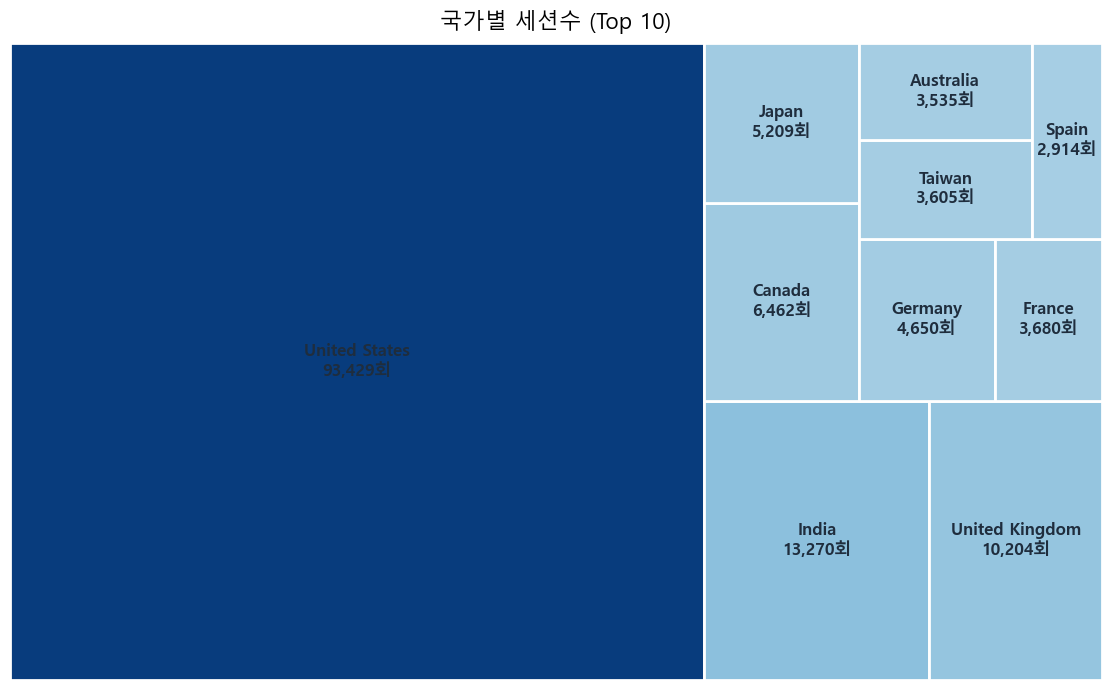

In [17]:
# Ïù¥ ÏÖÄÏùÄ Íµ≠Í∞ÄÎ≥Ñ Î∞©Î¨∏ Ïàò Top 10ÏùÑ Ìä∏Î¶¨ÎßµÏúºÎ°ú Í∞ÄÎ≥çÍ≤å ÏãúÍ∞ÅÌôîÌïòÍ≤†ÏäµÎãàÎã§.
import squarify

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÏãúÍ∞ÅÌôî ÎåÄÏÉÅÏùÑ Î≥µÏÇ¨Ìï©ÎãàÎã§.
plot_df = df_country.copy()

# Íµ≠Í∞ÄÎ™ÖÏù¥ ÎπÑÏñ¥ ÏûàÏúºÎ©¥ '(not set)'ÏúºÎ°ú Ï±ÑÏõÅÎãàÎã§.
plot_df["country"] = plot_df["country"].fillna("(not set)")

# Í∞íÍ≥º ÎùºÎ≤®ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
values = plot_df["visit_count"].to_numpy(dtype=float)
labels = plot_df["country"].astype(str).tolist()

# Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ ÍπîÎÅîÌûà Ï¢ÖÎ£åÌï©ÎãàÎã§.
if values.size == 0 or np.nansum(values) == 0:
    print("ÌëúÏãúÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    # Í∞íÏùò ÌÅ¨Í∏∞Ïóê Îî∞Îùº ÌååÎûÄÏÉâ Í≥ÑÏó¥Î°ú ÏÉâÏùÑ ÏßÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§.
    vmin, vmax = np.nanmin(values), np.nanmax(values)
    denom = (vmax - vmin) if vmax != vmin else 1.0
    norm = (values - vmin) / denom
    colors = plt.cm.Blues(0.35 + 0.6 * norm)

    # Ìä∏Î¶¨ÎßµÏùò ÏÇ¨Í∞ÅÌòï Ï¢åÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
    width, height = 1200, 700
    sizes = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(sizes, 0, 0, width, height)

    # Ìä∏Î¶¨ÎßµÏùÑ Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
    fig, ax = plt.subplots(figsize=(12, 7))
    area_threshold = (width * height) * 0.012  # ÎÑàÎ¨¥ ÏûëÏùÄ Î∞ïÏä§Îäî ÎùºÎ≤®ÏùÑ ÏÉùÎûµÌïòÍ≤†ÏäµÎãàÎã§.

    for r, c, name, v in zip(rects, colors, labels, values):
        ax.add_patch(plt.Rectangle((r["x"], r["y"]), r["dx"], r["dy"],
                                   facecolor=c, edgecolor="white", linewidth=2))
        area = r["dx"] * r["dy"]
        if area >= area_threshold:
            cx, cy = r["x"] + r["dx"] / 2, r["y"] + r["dy"] / 2
            ax.text(cx, cy, f"{name}\n{int(v):,}Ìöå",
                    ha="center", va="center", fontsize=12, fontweight="bold", color="#1f2d3d")

    # Ï∂ïÍ≥º Ï†úÎ™©ÏùÑ Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
    ax.set_xlim(0, width); ax.set_ylim(0, height)
    ax.set_aspect("equal"); ax.axis("off")
    ax.set_title("Íµ≠Í∞ÄÎ≥Ñ ÏÑ∏ÏÖòÏàò (Top 10)", fontsize=16, pad=10)
    plt.tight_layout()
    plt.show()


**Ïù∏ÏÇ¨Ïù¥Ìä∏:**<br>
Ïú†ÏûÖ¬∑Î∞©Î¨∏ Î∂ÑÏÑù ÏöîÏïΩ

1) Ïú†ÏûÖ Í≤ΩÎ°ú Î∂ÑÏÑù _(ÏÑ∏ÏÖò Ïàò Í∏∞Ï§Ä)_
- **Ï¥ù ÏÑ∏ÏÖò Ïàò:** **200,761Ìöå**
- **ÏµúÎã§ Ïú†ÏûÖ Í≤ΩÎ°ú:**  
  **google (45.37%) > (direct) (39.27%) > youtube.com (4.87%)**
- **Ìï¥ÏÑù**
  - google ÎπÑÏ§ëÏù¥ Í∞ÄÏû• ÎÜíÏùå ‚Üí 
  - **(direct)** Ïú†ÏûÖ Îã§Ïàò ‚Üí 

---

2) Ïã†Í∑ú Î∞©Î¨∏Ïûê vs Ïû¨Î∞©Î¨∏Ïûê ÎπÑÏú®
- **Ïã†Í∑ú ÎπÑÏú®Ïù¥ Îß§Ïö∞ ÎÜíÏùå:** `youtube.com (0.94)`, `m.facebook.com (0.93)`
- **Ïû¨Î∞©Î¨∏ ÎπÑÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùå:** `dfa (0.73)`, `sites.google.com (0.65)`
- **Ìï¥ÏÑù**
  - YouTube/facebook ‚Üí 
  - dfa/sites.google.com ‚Üí 

---

3) Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ï≤¥Î•ò ÏãúÍ∞Ñ
- **ÏÉÅÏúÑ Ï≤¥Î•ò ÏãúÍ∞Ñ:** `dfa (110Ï¥à) > Partners (109Ï¥à) > (direct) (108Ï¥à)`
- **ÏßßÏùÄ Ï≤¥Î•ò:** `sites.google.com (43Ï¥à)`
- **Ìï¥ÏÑù**
  - dfa/Partners: **Î¶¨ÎßàÏºÄÌåÖ¬∑Ï†úÌú¥ Ìä∏ÎûòÌîΩÏù¥ ÏùòÎèÑ Ï†ÅÌï©** ‚Üí 

---

4) Î∞©Î¨∏ Îß§Ï≤¥Î≥Ñ ÏÑ∏ÏÖò Ïàò
- **Ï£ºÏöî Îß§Ï≤¥:** `organic, (none), referral`Í∞Ä **ÏïïÎèÑÏ†Å**
- **Í¥ëÍ≥† Ïú†ÏûÖ(Í∑úÎ™®):** `cpc: 5,321`, `cpm: 1,405` _(ÎπÑÏ§ë ÎÇÆÏùå)_
- **Ìï¥ÏÑù**
  - ÏûêÏó∞ Ïú†ÏûÖ Ï§ëÏã¨ Íµ¨Ï°∞ ‚Üí 
  - Í¥ëÍ≥†Îäî 

---

5) Íµ≠Í∞ÄÎ≥Ñ Î∞©Î¨∏Ïûê
- **Top 3:** `United States (93,429) > India (13,270) > United Kingdom (10,204)`
- **Ìï¥ÏÑù**
  - ÎØ∏Íµ≠ ÎπÑÏú® **ÏïïÎèÑÏ†Å** ‚Üí 
  - **Î≤†Ìä∏ÎÇ®¬∑ÌÉúÍµ≠¬∑ÏùºÎ≥∏ Îì± ÏïÑÏãúÏïÑ Ïú†ÏûÖ Ï°¥Ïû¨** ‚Üí

# 2. Activation (ÌôúÏÑ±Ìôî)

: Ï≤´ Î∞©Î¨∏ ÌõÑ Í≥†Í∞ùÏù¥ Í∏çÏ†ïÏ†ÅÏù∏ Í≤ΩÌóòÏùÑ ÌñàÎäîÏßÄ ÌèâÍ∞Ä. ÏòàÎ•º Îì§Ïñ¥, ÌöåÏõê Í∞ÄÏûÖ, Ï≤´ Íµ¨Îß§, Ïï± ÎÇ¥ Ï≤´ ÌñâÎèô Îì±Ïù¥ Ïù¥Ïóê Ìï¥Îãπ Îê®.

**ÏÇ¨Ïö©ÏûêÎì§Ïù¥ Ïö∞Î¶¨ ÏÑúÎπÑÏä§Ïùò ÌïµÏã¨ Í∏∞Îä•ÏùÑ Ïûò ÏÇ¨Ïö©ÌïòÎäîÍ∞Ä?**

ÏòàÎ•º Îì§Ïñ¥ ÏáºÌïëÎ™∞Ïù¥ÎùºÎ©¥ Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞, ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄ Ï°∞Ìöå Îì±Ïù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

ÎßåÏïΩ Ïù¥ Îã®Í≥ÑÏóêÏÑú Î¨∏Ï†úÍ∞Ä ÏûàÎã§Î©¥ ÏÑúÎπÑÏä§Ïùò UXÎì±ÏùÑ Ï≤¥ÌÅ¨Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÍ≤†Ï£†.

**ActivationÎã®Í≥ÑÏùò ÌïµÏã¨ÏùÄ Funnel Î∂ÑÏÑù.**

* ÏÇ¨Ïö©ÏûêÎì§Ïù¥ Í≤ΩÌóòÌïòÎäî Îã®Í≥ÑÎ•º ÎèÑÏãùÌôî 
* Í∞Å Îã®Í≥ÑÏùò Ï†ÑÌôòÏú®ÏùÑ Ï∏°Ï†ï/ Î∂ÑÏÑù 

**ÌçºÎÑê Î∂ÑÏÑù(Funnel Analysis)**<br>
ÌçºÎÑê Î∂ÑÏÑùÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑúÎπÑÏä§Ïóê Ïú†ÏûÖÎêòÏñ¥ ÏµúÏ¢Ö Ï†ÑÌôò(Conversion)ÍπåÏßÄ Ïù¥Ïñ¥ÏßÄÎäî Ïó¨Ï†ïÏùÑ Ïó¨Îü¨ Îã®Í≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Í∞Å Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®Í≥º Ïù¥ÌÉàÎ•†ÏùÑ Ï∏°Ï†ïÌïòÎäî Î∂ÑÏÑù Î∞©Î≤ïÏù¥ÏóêÏöî. Ïù¥Î•º ÌÜµÌï¥ Ïñ¥Îäê ÏßÄÏ†êÏóêÏÑú ÏÇ¨Ïö©ÏûêÍ∞Ä Ïù¥ÌÉàÌïòÎäîÏßÄ, Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏóêÏÑú Í∞úÏÑ†Ïù¥ ÌïÑÏöîÌïúÏßÄ ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.

Î™©Ï†Å:
* Î≥ëÎ™© Íµ¨Í∞Ñ ÏãùÎ≥Ñ: Í∞Å Îã®Í≥ÑÏóêÏÑú Ïù¥ÌÉàÌïòÎäî ÏÇ¨Ïö©ÏûêÏùò ÎπÑÏú®ÏùÑ ÌååÏïÖÌï¥, Í∞úÏÑ†Ìï¥Ïïº Ìï† ÌïµÏã¨ Íµ¨Í∞ÑÏùÑ ÎèÑÏ∂ú.
* Ï†ÑÌôòÏú® ÏµúÏ†ÅÌôî: ÏÇ¨Ïö©Ïûê Ïó¨Ï†ïÏùò Í∞Å Îã®Í≥ÑÎ•º Í∞úÏÑ†ÌïòÏó¨ ÏµúÏ¢Ö Ï†ÑÌôòÏú®ÏùÑ ÎÜíÏûÑÏúºÎ°úÏç® Îß§Ï∂ú Ï¶ùÎåÄ.

## 2.1. Îã®Í≥ÑÎ≥Ñ ÏÑ∏ÏÖò Ïàò ÌååÏïÖ

In [ ]:
kdf = df

# ÏßëÍ≥Ñ ÎåÄÏÉÅ ÏΩîÎìúÏôÄ Ïª¨ÎüºÎ™ÖÏùÑ Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
codes = ["1", "2", "3", "5", "6"]
colmap = {c: f"action_type_count_{c}" for c in codes}

# Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå Ìï©Í≥ÑÎ•º Íµ¨ÌïòÍ≥†, ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú Ï±ÑÏö∞Í≤†ÏäµÎãàÎã§.
counts = {c: (kdf[colmap[c]].sum() if colmap[c] in kdf.columns else 0) for c in codes}

# ÏΩîÎìú‚ÜíÎùºÎ≤® Îß§ÌïëÏùÑ Ï†ÅÏö©ÌïòÍ≤†ÏäµÎãàÎã§.
action_map = {
    "1": "Product list",
    "2": "Product detail page",
    "3": "Add to cart",
    "5": "Check out",
    "6": "Completed purchase",
}

# Í≤∞Í≥º DataFrameÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≥† Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
df_funnels = (
    pd.Series(counts).rename_axis("action_code").reset_index(name="count")
)
df_funnels["action"] = df_funnels["action_code"].map(action_map)
df_funnels = df_funnels[["action", "count"]].sort_values("count", ascending=False).reset_index(drop=True)

# Í≤∞Í≥ºÎ•º Î∞òÌôò/ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
df_funnels


action  count
0         Product list  98499
1  Product detail page  76193
2          Add to cart  30963
3            Check out  21787
4   Completed purchase   6459

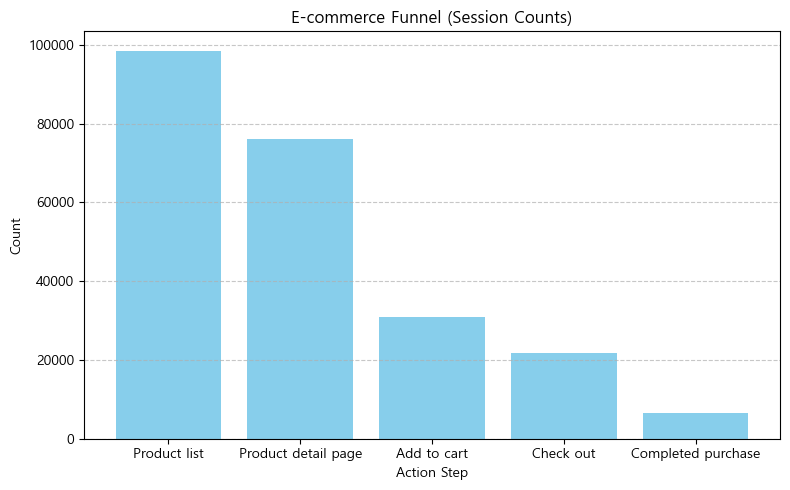

In [19]:
# Îç∞Ïù¥ÌÑ∞Í∞Ä Î¨∏ÏûêÏó¥/Î≤îÏ£ºÌòïÏù¥Ïñ¥ÎèÑ ÏïàÏ†ÑÌïòÍ≤å ÌëúÏãúÎêòÎèÑÎ°ù ÎùºÎ≤®ÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
x = df_funnels["action"].astype(str)
y = df_funnels["count"].astype(float)

# ÍπîÎÅîÌïú Í∏∞Î≥∏ ÌÅ¨Í∏∞Ïùò Ï∫îÎ≤ÑÏä§Î•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.
plt.figure(figsize=(8, 5))

# ÌçºÎÑê Îã®Í≥ÑÎ•º xÏ∂ï, ÏÑ∏ÏÖò ÏàòÎ•º yÏ∂ïÏúºÎ°ú ÎßâÎåÄÎ•º Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
plt.bar(x, y, color="skyblue")

# Ï∞®Ìä∏ Ï†úÎ™©Í≥º Ï∂ï Î†àÏù¥Î∏îÏùÑ ÏùΩÍ∏∞ ÏâΩÍ≤å Î∂ôÏù¥Í≤†ÏäµÎãàÎã§.
plt.title("E-commerce Funnel (Session Counts)")
plt.xlabel("Action Step")
plt.ylabel("Count")

# Í∞í ÎπÑÍµêÍ∞Ä ÏâΩÎèÑÎ°ù yÏ∂ïÏóê Ï†êÏÑ† Î≥¥Ï°∞Í≤©ÏûêÎ•º Ï∂îÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Í∑∏Î¶ºÏùÑ ÌôîÎ©¥Ïóê Ï∂úÎ†•ÌïòÍ≤†ÏäµÎãàÎã§.
plt.tight_layout()
plt.show()


## 2.2. Ï†ÑÌôòÏú®, Ïù¥ÌÉàÏú® ÏÇ∞Ï∂ú

In [ ]:
# ÌçºÎÑê Îã®Í≥ÑÏùò ÎÖºÎ¶¨Ï†Å ÏàúÏÑúÎ•º Î™ÖÏãúÌï©ÎãàÎã§. Ïù¥ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÍ≥† Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
order = [
    "Product list",
    "Product detail page",
    "Add to cart",
    "Check out",
    "Completed purchase",
]

# ÏõêÎ≥∏ÏùÑ ÏàúÏÑúÎåÄÎ°ú Ïû¨Î∞∞Ïó¥ÌïòÍ≥†, countÎ•º Ïà´ÏûêÌòïÏúºÎ°ú Í∞ïÏ†ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
f = (
    df_funnels.set_index("action")
              .***(order)           # order ÏàúÏúºÎ°ú Îã§Ïãú Ïû¨Î∞∞Ïó¥!
              .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0))
              .reset_index()
)

# Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§. Ïïû Îã®Í≥Ñ ÎåÄÎπÑ Îã§Ïùå Îã®Í≥Ñ ÎπÑÏú®ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
conv = [100.0]
for i in range(len(order) - 1):
    base = f.loc[i, "count"]
    nxt  = f.loc[i + 1, "count"]
    conv.append(round((nxt / base * 100.0) if base > 0 else 0.0, 2))

# Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®Í≥º Ïù¥ÌÉàÏú®ÏùÑ ÌëúÏóê Ï∂îÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.
f["conversion_rate"] = conv
f["bounce_rate"] = [0.0] + [round(100 - r, 2) for r in conv[1:]]

# ÎàÑÏ†Å Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§. Ï≤´ Îã®Í≥Ñ ÎåÄÎπÑ Í∞Å Îã®Í≥ÑÏùò ÎπÑÏú®ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
first = f.loc[0, "count"]
f["cumulative_conversion"] = (f["count"] / first * 100.0).round(2) if first > 0 else 0.0

# Í≤∞Í≥ºÎ•º df_funnelsÎ°ú Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§.
df_funnels = f
df_funnels

action  count  conversion_rate  bounce_rate  \
0         Product list  98499           100.00         0.00   
1  Product detail page  76193            77.35        22.65   
2          Add to cart  30963            40.64        59.36   
3            Check out  21787            70.36        29.64   
4   Completed purchase   6459            29.65        70.35   

   cumulative_conversion  
0                 100.00  
1                  77.35  
2                  31.43  
3                  22.12  
4                   6.56

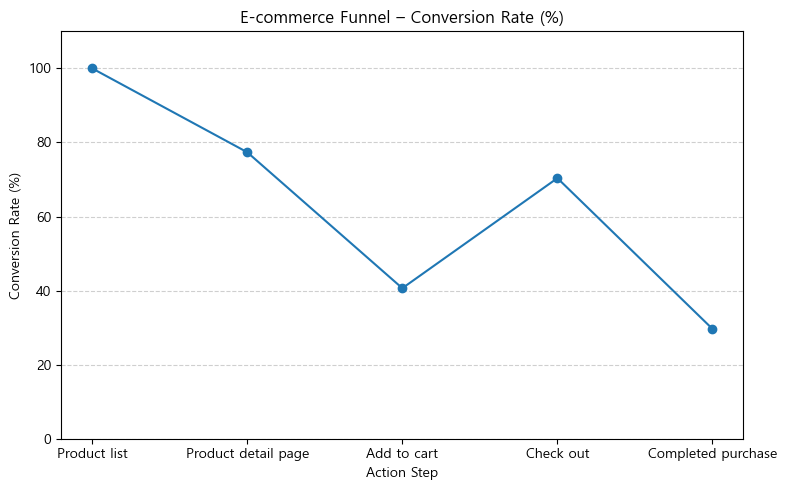

In [21]:
# ÌçºÎÑê Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ ÏÑ† Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
plt.figure(figsize=(8, 5))
plt.plot(df_funnels["action"], df_funnels["conversion_rate"], marker="o")

# Í∑∏ÎûòÌîÑÍ∞Ä Î¨¥ÏóáÏùÑ Î≥¥Ïó¨Ï£ºÎäîÏßÄ Ï†úÎ™©Í≥º Ï∂ï ÎùºÎ≤®Î°ú Î∂ÑÎ™ÖÌûà ÌïòÍ≤†ÏäµÎãàÎã§.
plt.title("E-commerce Funnel ‚Äì Conversion Rate (%)")
plt.xlabel("Action Step")
plt.ylabel("Conversion Rate (%)")

# ÏãúÏïºÎ•º ÏùºÏ†ïÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ 0~110% Î≤îÏúÑÎ°ú Í≥†Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
plt.ylim(0, 110)

# ÏùΩÍ∏∞ ÏâΩÍ≤å Í∞ÄÎ°ú Î≥¥Ï°∞Í≤©ÏûêÎ•º Ï∂îÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Ïó¨Î∞±ÏùÑ ÏûêÎèô Ï°∞Ï†ïÌï¥ ÏûòÎ¶ºÏùÑ Î∞©ÏßÄÌïòÍ≤†ÏäµÎãàÎã§.
plt.tight_layout()
plt.show()

**Ïù∏ÏÇ¨Ïù¥Ìä∏:**

1. Îã®Í≥ÑÎ≥Ñ ÏÑ∏ÏÖò Ïàò
- Product list(Î™©Î°ù): 98,499
- Product detail page(ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ): 76,193
- Add to cart(Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞): 30,963
- Check out(Í≤∞Ï†ú ÏßÑÌñâ): 21,787
- Completed purchase(Íµ¨Îß§ ÏôÑÎ£å): 6,459

2. Ï†ÑÌôòÏú®(Conversion Rate) Î∞è Ïù¥ÌÉàÎ•†(Bounce Rate)
- Î™©Î°ù ‚Üí ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: Ï†ÑÌôòÏú® ÏïΩ 77.35%, Ïù¥ÌÉàÎ•† ÏïΩ 22.65%
- ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ ‚Üí Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞: Ï†ÑÌôòÏú® ÏïΩ 40.64%, Ïù¥ÌÉàÎ•† ÏïΩ 59.36%
- Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞ ‚Üí Í≤∞Ï†ú ÏßÑÌñâ: Ï†ÑÌôòÏú® ÏïΩ 70.36%, Ïù¥ÌÉàÎ•† ÏïΩ 29.64%
- Í≤∞Ï†ú ÏßÑÌñâ ‚Üí Íµ¨Îß§ ÏôÑÎ£å: Ï†ÑÌôòÏú® ÏïΩ ÎåÄÎûµ 29.65%, Ïù¥ÌÉàÎ•† ÏïΩ 70.35%
- Ï†ÑÏ≤¥ Ï†ÑÌôòÏú®(Î™©Î°ù ÎåÄÎπÑ Íµ¨Îß§ ÏôÑÎ£å): ÏïΩ 6.56% (6,459 √∑ 98,499)

Îã®Í≥ÑÎ≥Ñ ÌïµÏã¨ Ïù¥Ïäà Î∞è Í∞úÏÑ† Ìè¨Ïù∏Ìä∏

1) Î™©Î°ù ‚Üí ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ
- Ï†ÑÌôòÏú®(77.35%)Ïù¥ ÏñëÌò∏Ìïú Ìé∏Ïù¥ÎØÄÎ°ú, Îã§Î•∏ Îã®Í≥Ñ ÎåÄÎπÑ Ïã¨Í∞ÅÌïú Î≥ëÎ™© Íµ¨Í∞ÑÏùÄ ÏïÑÎãò
- Ïù¥ÌÉà ÏÇ¨Ïú†: Î™©Î°ùÏóêÏÑú ÏõêÌïòÎäî ÏÉÅÌíàÏùÑ Ï∞æÏßÄ Î™ªÌñàÍ±∞ÎÇò, Ï≤´Ïù∏ÏÉÅÏù¥ Í∏∞ÎåÄÏóê Î™ª ÎØ∏Ï≥ê Ïù¥ÌÉà
- Í∞úÏÑ† Î∞©Ïïà
  - Ïç∏ÎÑ§Ïùº¬∑Í∞ÄÍ≤©¬∑ÌèâÏ†ê Îì± ÌïµÏã¨ Ï†ïÎ≥¥Î•º ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÎÖ∏Ï∂úÌïòÏó¨ ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ïú†ÎèÑ
  - 

2) ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ ‚Üí Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞
- Ï†ÑÌôòÏú®(40.64%) ÎÇÆÍ≥† Ïù¥ÌÉàÎ•†(59.36%) ÌÅº
- ÏõêÏù∏: ÏÉÅÌíà Ï†ïÎ≥¥¬∑Í∞ÄÍ≤©¬∑ÌõÑÍ∏∞¬∑Î∞∞ÏÜ°Ï°∞Í±¥ Îì±ÏúºÎ°ú Íµ¨Îß§ ÏùòÏÇ¨ ÌòïÏÑ± Î∂ÄÏ°±
- Í∞úÏÑ† Î∞©Ïïà
  - ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Í∞ïÌôî: Ïù¥ÎØ∏ÏßÄ/ÎèôÏòÅÏÉÅ/Î¶¨Î∑∞/FAQ ÌôïÏ∂©
  - Í∞ÄÍ≤©¬∑ÌòúÌÉù ÏïàÎÇ¥: Ìï†Ïù∏ Ïø†Ìè∞, ÌîÑÎ°úÎ™®ÏÖò, Ï†ÅÎ¶ΩÍ∏à Îì± ÎèôÍ∏∞ Ïú†Î∞ú
  -
  - 

3) Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞ ‚Üí Í≤∞Ï†ú ÏßÑÌñâ
- Ï†ÑÌôòÏú® 70.36%Î°ú ÎπÑÍµêÏ†Å ÏñëÌò∏ÌïòÎÇò, 29.64%Îäî Í≤∞Ï†úÎ°ú Ïù¥ÎèôÌïòÏßÄ ÏïäÏùå
- ÏõêÏù∏: Ï∂îÍ∞Ä Îã¥Í∏∞ ÏùòÎèÑ, ÎÇòÏ§ë Í≤∞Ï†ú ÏùòÎèÑ Îì±
- Í∞úÏÑ† Î∞©Ïïà
  - Ïû•Î∞îÍµ¨Îãà UX: Ìï©ÏÇ∞ Í∏àÏï°, Î∞∞ÏÜ°ÎπÑ, ÏòàÏÉÅ Î∞∞ÏÜ°Ïùº Î™ÖÌôïÌôî
  - 

4) Í≤∞Ï†ú ÏßÑÌñâ ‚Üí Íµ¨Îß§ ÏôÑÎ£å
- Ïù¥ÌÉàÎ•† 70.35%Î°ú ÏµúÎåÄ Î≥ëÎ™©
- ÏõêÏù∏: Í≤∞Ï†ú ÏàòÎã® Î∂ÄÏ°±, Î≥µÏû°Ìïú ÌîÑÎ°úÏÑ∏Ïä§, Ï∂îÍ∞Ä ÎπÑÏö© ÎÖ∏Ï∂ú, Ïø†Ìè∞ Ï†ÅÏö© Î¨∏Ï†ú Îì±
- Í∞úÏÑ† Î∞©Ïïà
  - Í≤∞Ï†ú Í≥ºÏ†ï Îã®ÏàúÌôî: Í∞ÑÌé∏Í≤∞Ï†ú(PG) ÎèÑÏûÖ, Îã®Í≥Ñ Ï∂ïÏÜå
  - ÏÇ¨Î°Ä: Ïø†Ìå°Ïùò Î∞îÎ°úÍ≤∞Ï†ú(Î∞ÄÏñ¥ÏÑú Í≤∞Ï†ú)Ï≤òÎüº Í≤∞Ï†ú Îã®Í≥ÑÎ•º ÎåÄÌè≠ Ï∂ïÏÜå
  - 
  - 

Ïö∞ÏÑ†ÏàúÏúÑ Î∞è Ïï°ÏÖò ÏïÑÏù¥ÌÖú
1) Í≤∞Ï†ú ÏßÑÌñâ ‚Üí Íµ¨Îß§ ÏôÑÎ£å Ï†ÑÌôòÏú® Í∞úÏÑ†
- Í∞ÄÏû• ÌÅ∞ Ïù¥ÌÉà(70.35%) Íµ¨Í∞Ñ
- Í≤∞Ï†ú Í≥ºÏ†ï Îã®ÏàúÌôî, ÏóêÎü¨/Ïù¥ÌÉà Î∞©ÏßÄ, Ïù¥ÌÉà Î¶¨ÎßàÏù∏Îìú Îì± Í≤∞Ï†ú ÌéòÏù¥ÏßÄ Ï†ÑÎ©¥ Í∞úÏÑ†
- Í≤∞Ï†ú ÎèÑÏ§ë Ïù¥ÌÉà Ïãú Ïû¨Ï†ëÏÜç Ïú†ÎèÑ(Î¶¨ÎßàÏù∏Îìú, Ìï†Ïù∏ Ïø†Ìè∞)

2) ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ ‚Üí Ïû•Î∞îÍµ¨Îãà Îã¥Í∏∞ Ï†ÑÌôòÏú® Í∞úÏÑ†
- A/B ÌÖåÏä§Ìä∏Î°ú ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Íµ¨ÏÑ±¬∑Î≤ÑÌäº ÏúÑÏπò/ÎîîÏûêÏù∏ ÏµúÏ†ÅÌôî
- Ìï†Ïù∏ Ïø†Ìè∞, ÌîÑÎ°úÎ™®ÏÖò, Ï†ÅÎ¶ΩÍ∏à Îì± Íµ¨Îß§ ÎèôÍ∏∞ Í∞ïÌôî

3) Í∏∞ÌÉÄ
- Î™©Î°ù ‚Üí ÏÉÅÏÑ∏ Íµ¨Í∞ÑÏóêÏÑú Ïç∏ÎÑ§Ïùº Îì± ÌôçÎ≥¥ ÏöîÏÜåÎ•º Î≥¥Í∞ïÌïòÎêò Í≥ºÎèÑÌïú ÏûêÍ∑πÏùÄ ÏßÄÏñë
- Ïû•Î∞îÍµ¨Îãà Ïù¥ÌÉà Î∞©ÏßÄ Ï†ÑÎûµ Ïã§Ìñâ

Ï¢ÖÌï© ÏöîÏïΩ
- ~~~
- ~~~
- ~~~

# 3. Retention(Ïú†ÏßÄ)

: Í≥†Í∞ùÏù¥ Ï†úÌíàÏù¥ÎÇò ÏÑúÎπÑÏä§Î•º Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ïù¥Ïö©ÌïòÎäîÏßÄÎ•º Ï∏°Ï†ï. Ï¶â, Ï¥àÍ∏∞ Í≤ΩÌóò ÌõÑ ÏñºÎßàÎÇò ÎßéÏùÄ Í≥†Í∞ùÏù¥ ÎèåÏïÑÏò§ÎäîÏßÄÎ•º Î∂ÑÏÑù.

**ÏÇ¨Ïö©ÏûêÍ∞Ä Ïö∞Î¶¨ ÏÑúÎπÑÏä§Ïóê ÏßÄÏÜçÏ†ÅÏúºÎ°ú Î∞©Î¨∏ÌïòÎäîÍ∞Ä?** 

Active Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ Í≤ΩÌóòÌïú ÌïµÏã¨Í∞ÄÏπòÎ•º Íæ∏Ï§ÄÌûà Í≤ΩÌóòÌïòÍ≤å ÌïòÍ≥†, Í∑∏ ÏàòÏ§ÄÏùÑ Ï∏°Ï†ïÌï† Ïàò ÏûàÎäî ÏßÄÌëúÎ•º Ï†ïÏùòÌïòÍ≥† Í¥ÄÎ¶¨ÌïòÎäî Îã®Í≥Ñ.

**RetentionÎã®Í≥ÑÏùò ÌïµÏã¨ÏùÄ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù(Cohort Analysis).**

* ÌäπÏ†ï Í∏∞Í∞ÑÏù¥ÎÇò Í∏∞Ï§ÄÏóê Îî∞Îùº ÏÇ¨Ïö©Ïûê ÏßëÎã®(ÏΩîÌò∏Ìä∏)ÏùÑ ÎÇòÎàÑÏñ¥, Ïù¥Îì§Ïù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Ïñ¥ÎñªÍ≤å ÌñâÎèôÌïòÎäîÏßÄ Î∂ÑÏÑùÌïòÎäî Í∏∞Î≤ïÏù¥ÏóêÏöî.
* Îã®ÏàúÌïú Ï†ÑÏ≤¥ ÌèâÍ∑† ÏßÄÌëúÎßåÏúºÎ°úÎäî ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÏÇ¨Ïö©Ïûê ÌñâÎèôÏùò ÏÑ∏Î∂Ä Ìå®ÌÑ¥ÏùÑ ÎìúÎü¨ÎÇ∏Îã§.
* Í∞Å Í∑∏Î£πÏùò Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Î∂ÑÏÑùÌï®ÏúºÎ°úÏç® Retention Îã®Í≥ÑÏóêÏÑúÏùò Î¨∏Ï†úÏ†êÏùÑ ÎèÑÏ∂úÌïòÍ≥† Í∞úÏÑ†Ìï† Ïàò ÏûàÏñ¥Ïöî.

**ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù(Cohort Analysis)**

GA Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏµúÏ¥à Ïú†ÏûÖ ÏãúÏ†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¨Ïö©ÏûêÎ•º Í∑∏Î£πÌôîÌïú Îí§, ÏùºÏ†ï Í∏∞Í∞Ñ ÎèôÏïà ÏñºÎßàÎßåÌÅºÏùò ÏÇ¨Ïö©ÏûêÍ∞Ä Ïû¨Î∞©Î¨∏ÌïòÎäîÏßÄÎ•º Ï∂îÏ†ÅÌïòÍ≥†, Ï±ÑÎÑêÎ≥Ñ ÏΩîÌò∏Ìä∏ ÎπÑÍµêÎ•º ÌÜµÌï¥ Ïñ¥Îñ§ Ïú†ÏûÖ Í≤ΩÎ°úÍ∞Ä Ïû•Í∏∞Ï†ÅÏúºÎ°ú Îçî Ìö®Í≥ºÏ†ÅÏù∏ÏßÄ Î∂ÑÏÑùÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

## 3.1. Î™©Ìëú Î≥ÄÏàò ÏÉùÏÑ±
* `first_visit_week`: Ï≤´ Íµ¨Îß§ Ï£ºÍ∞Ñ
* `week_passed`: ÏÇ¨Ïö©Ïûê Î≥Ñ Ï≤´ Íµ¨Îß§Ï£ºÎ∂ÄÌÑ∞ Îç∞Ïù¥ÌÑ∞Ïùò ÎßàÏßÄÎßâ ÎÇ†ÏßúÏù∏ 2017ÎÖÑ 7ÏõîÍπåÏßÄÏùò Ï∞®Ïù¥
* `customer_count`: Í∞Å Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Í≥†Í∞ùÏùò Ïàò

In [ ]:
UID_COL  = "fullVisitorId"
DATE_END = pd.to_datetime("2017-07-31")  # Îç∞Ïù¥ÌÑ∞Ïùò ÎßàÏßÄÎßâ ÎÇ†ÏßúÎ•º Î™ÖÏãúÌï©ÎãàÎã§.

# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# YYYYMMDDÎ•º Ïùº Îã®ÏúÑ datetimeÏúºÎ°ú ÏïàÏ†ÑÌïòÍ≤å Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_session_day"] = pd.to_datetime(
    kdf["date"].astype(str), format="%Y%m%d", errors="coerce"
).dt.normalize()

# Î™®Îì† ÎÇ†ÏßúÎ•º Í∑∏ Ï£ºÏùò 'ÏõîÏöîÏùº'Î°ú Ïä§ÎÉÖÏãúÏºú Ï£ºÏ∞® ÏãúÏûëÏùºÏùÑ Í∞ïÏ†úÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_session_week"] = kdf["_session_day"] - pd.to_timedelta(
    kdf["_session_day"].dt.weekday, unit="D"
)

# ÏÇ¨Ïö©ÏûêÎ≥ÑÎ°ú ÏµúÏ¥à Î∞©Î¨∏ Ï£º(ÏõîÏöîÏùº ÏãúÏûë)Î•º Íµ¨ÌïòÍ≤†ÏäµÎãàÎã§.
kdf["first_visit_week"] = kdf.***(***)["_session_week"].transform("min")

# ÎßàÏßÄÎßâ Î∂ÄÎ∂Ñ ÏΩîÌò∏Ìä∏(2017-07-31 ÏãúÏûë Ï£º)Î•º Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÍ≤†ÏäµÎãàÎã§.
last_anchor = DATE_END - pd.to_timedelta(DATE_END.weekday(), unit="D")
kdf = kdf[kdf["first_visit_week"] != last_anchor].copy()

# ÏµúÏ¥à Ï£ºÎ°úÎ∂ÄÌÑ∞ Í≤ΩÍ≥º Ï£ºÏ∞®Î•º Ï†ïÏàòÎ°ú Í≥ÑÏÇ∞ÌïòÍ≥† ÏùåÏàòÎäî Î∞©Ïñ¥Ï†ÅÏúºÎ°ú Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
kdf["week_passed"] = ((kdf["_session_week"] - kdf["first_visit_week"])
                      .dt.days // 7).astype(int)
kdf = kdf[kdf["week_passed"] >= 0].copy()

# (ÏµúÏ¥à Ï£º √ó Í≤ΩÍ≥º Ï£º) Í∏∞Ï§ÄÏùò Ïú†ÎãàÌÅ¨ ÏÇ¨Ïö©Ïûê Ïàò ÏΩîÌò∏Ìä∏ Îß§Ìä∏Î¶≠Ïä§Î•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.
cohort = (
    kdf.***(["***", "***"])[UID_COL]
       .***()
       .reset_index(name="customer_count")
       .sort_values(["first_visit_week", "week_passed"])
)

# ÏãúÏûë/Ï¢ÖÎ£å ÏΩîÌò∏Ìä∏Îßå Í∞ÑÎã®Ìûà ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
print("first cohort:", cohort["first_visit_week"].min().date())
print("last  cohort:", cohort["first_visit_week"].max().date(), "(excluded:", last_anchor.date(), ")")

# ÌïÑÏöî Ïãú ÎØ∏Î¶¨Î≥¥Í∏∞Î•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
display(cohort.head(10))

first cohort: 2017-05-01
last  cohort: 2017-07-24 (excluded: 2017-07-31 )


first_visit_week  week_passed  customer_count
0       2017-05-01            0           13065
1       2017-05-01            1             596
2       2017-05-01            2             404
3       2017-05-01            3             277
4       2017-05-01            4             222
5       2017-05-01            5             174
6       2017-05-01            6             146
7       2017-05-01            7             116
8       2017-05-01            8             122
9       2017-05-01            9              82

## 3.2. ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±

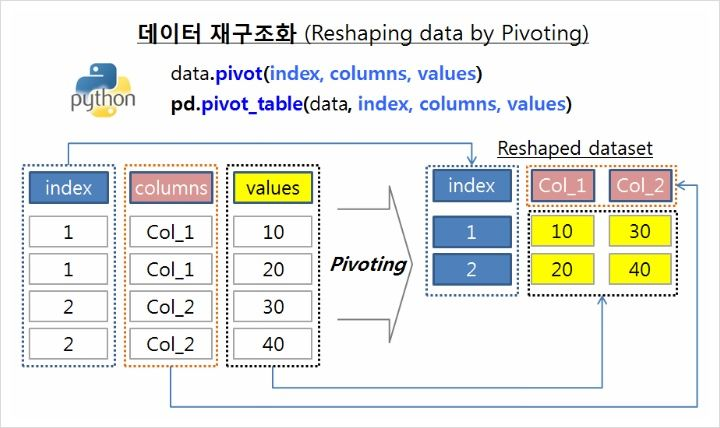

`.pivot()`Î©îÏÑúÎìúÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌîºÎ≤óÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôòÏãúÌÇ§Îäî Î©îÏÑúÎìú ÏûÖÎãàÎã§.

`df.pivot(index=None, columns=None, values=None)`<br>

**index**: Ïù∏Îç±Ïä§Î°ú ÏÇ¨Ïö©Îê† Ïó¥ÏûÖÎãàÎã§.<br>
**columns**: Ïó¥Î°ú ÏÇ¨Ïö©Îê† Ïó¥ ÏûÖÎãàÎã§.<br>
**values**: Í∞íÏúºÎ°ú ÏûÖÎ†•Îê† Ïó¥ ÏûÖÎãàÎã§.<br>
‚Äª indexÎÇò columnsÏóê Î¶¨Ïä§Ìä∏Î•º ÏûÖÎ†• Ìï† Í≤ΩÏö∞ Î©ÄÌã∞ Ïù∏Îç±Ïä§Î°ú ÌîºÎ≤óÌÖåÏù¥Î∏îÏù¥ ÏÉùÏÑ±Îê©ÎãàÎã§.<br>
valuesÏóê Î¶¨Ïä§Ìä∏Î•º ÏûÖÎ†• Ìï† Í≤ΩÏö∞ Í∞Å Í∞íÏóê ÎåÄÌïú ÌÖåÏù¥Î∏îÏù¥ Ïó∞ÏÜçÏ†ÅÏúºÎ°ú ÏÉùÏÑ±Îê©ÎãàÎã§.

In [23]:
# ÏΩîÌò∏Ìä∏√óÍ≤ΩÍ≥ºÏ£º ÌîºÎ≤ó (Í≥†Í∞ù Ïàò)
p_count = (
    cohort.pivot(index="first_visit_week", columns="week_passed", values="customer_count")
          .fillna(0)
          .astype(int)
          .sort_index()
          .reindex(sorted(cohort["week_passed"].unique()), axis=1)
)

p_count

week_passed          0    1    2    3    4    5    6    7    8   9   10  11  \
first_visit_week                                                              
2017-05-01        13065  596  404  277  222  174  146  116  122  82  92  97   
2017-05-08        10249  471  246  183  142  120   83   92   60  73  55  47   
2017-05-15        13196  487  250  233  145  100   77   51   55  50  44  11   
2017-05-22        10859  410  237  174  130   96   48   79   57  55  11   0   
2017-05-29        11245  405  198  147  119   67   69   60   44   7   0   0   
2017-06-05        11143  395  190  149  103   91   77   70   17   0   0   0   
2017-06-12        11000  381  190  137  111   81   72   17    0   0   0   0   
2017-06-19        10984  338  172  170  146   87   15    0    0   0   0   0   
2017-06-26        13603  338  203  155  119   30    0    0    0   0   0   0   
2017-07-03        12789  367  190  154   30    0    0    0    0   0   0   0   
2017-07-10        12918  436  245   42    0    0    0    0    0   0   0   0   
2017-07-17        12547  458   67    0    0    0    0    0    0   0   0   0   
2017-07-24        12224  165    0    0    0    0    0    0    0   0   0   0   

week_passed       12  13  
first_visit_week          
2017-05-01        83  30  
2017-05-08        10   0  
2017-05-15         0   0  
2017-05-22         0   0  
2017-05-29         0   0  
2017-06-05         0   0  
2017-06-12         0   0  
2017-06-19         0   0  
2017-06-26         0   0  
2017-07-03         0   0  
2017-07-10         0   0  
2017-07-17         0   0  
2017-07-24         0   0

## 3.3. ÎπÑÏú®Î°ú Î≥ÄÌôò

In [24]:
# 0Ï£ºÏ∞® Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§. ÏóÜÎã§Î©¥ ÌîºÎ≤ó Îã®Í≥ÑÏóêÏÑú week_passed=0 Ìè¨Ìï® Ïó¨Î∂ÄÎ•º Ï†êÍ≤ÄÌï©ÎãàÎã§.
if 0 not in p_count.columns:
    raise ValueError("p_countÏóê 0Ï£ºÏ∞®(Ïó¥=0)Í∞Ä ÏóÜÏäµÎãàÎã§. pivot Îã®Í≥ÑÏóêÏÑú week_passed=0Ïù¥ Ìè¨Ìï®ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")

# Í∞Å ÏΩîÌò∏Ìä∏Ïùò 0Ï£ºÏ∞®Î•º Î∂ÑÎ™®Î°ú ÌïòÏó¨ Î¶¨ÌÖêÏÖò(%)ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
denom = p_count[0].replace(0, np.nan)                 # 0ÏúºÎ°ú ÎÇòÎàÑÎäî ÏÉÅÌô©ÏùÑ ÌîºÌï©ÎãàÎã§.
retention_pct = (p_count.div(denom, axis=0) * 100).round(1)

# ÏΩîÌò∏Ìä∏ ÏãúÏûë Ï£º Ïù∏Îç±Ïä§Î•º YYYY-MM-DD Î¨∏ÏûêÏó¥Î°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Î∞îÍøâÎãàÎã§.
idx_fmt = pd.to_datetime(p_count.index).strftime("%Y-%m-%d")
p_count.index = idx_fmt
retention_pct.index = idx_fmt

# Í≤∞Í≥ºÎ•º ÏùºÎ∂ÄÎßå ÌôïÏù∏Ìï©ÎãàÎã§.
print("‚ñ∂ Cohort Counts:\n", p_count.head())
print("\n‚ñ∂ Retention (%):\n", retention_pct.head())


‚ñ∂ Cohort Counts:
 week_passed          0    1    2    3    4    5    6    7    8   9   10  11  \
first_visit_week                                                              
2017-05-01        13065  596  404  277  222  174  146  116  122  82  92  97   
2017-05-08        10249  471  246  183  142  120   83   92   60  73  55  47   
2017-05-15        13196  487  250  233  145  100   77   51   55  50  44  11   
2017-05-22        10859  410  237  174  130   96   48   79   57  55  11   0   
2017-05-29        11245  405  198  147  119   67   69   60   44   7   0   0   

week_passed       12  13  
first_visit_week          
2017-05-01        83  30  
2017-05-08        10   0  
2017-05-15         0   0  
2017-05-22         0   0  
2017-05-29         0   0  

‚ñ∂ Retention (%):
 week_passed          0    1    2    3    4    5    6    7    8    9    10  \
first_visit_week                                                            
2017-05-01        100.0  4.6  3.1  2.1  1.7  1.3  1.1  0.9  0.

## 3.4. ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî

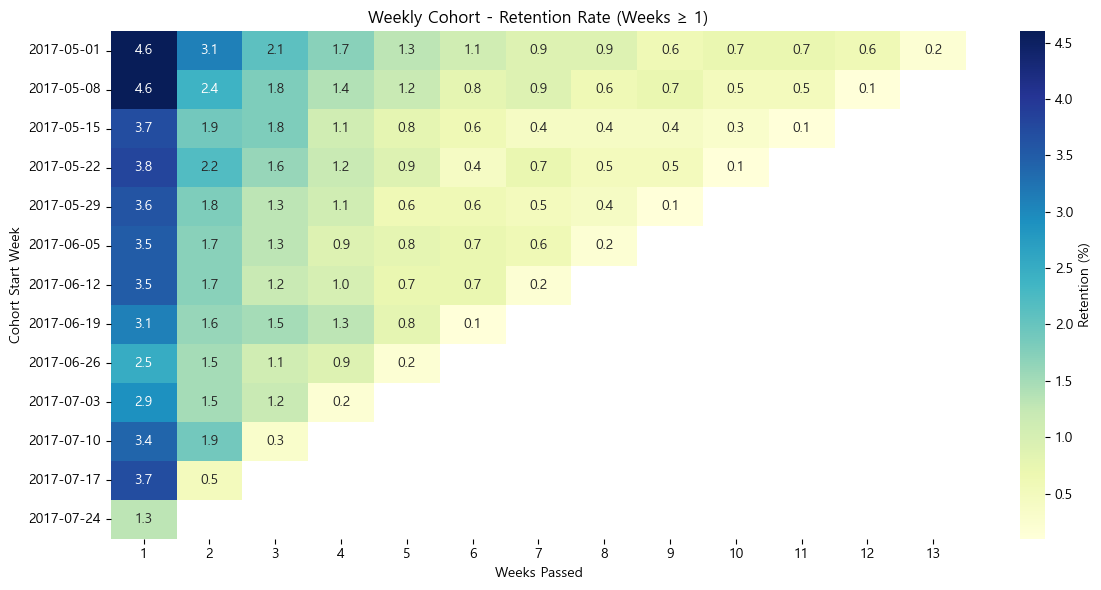

In [25]:
# Ï£ºÏ∞® 1 Ïù¥ÏÉÅÎßå ÏÑ†ÌÉùÌï©ÎãàÎã§. (Ïó¥ Ïù¥Î¶ÑÏù¥ Ï†ïÏàòÏù∏ Í≤ÉÎßå ÏïàÏ†ÑÌïòÍ≤å Ï∂îÎ¶ΩÎãàÎã§.)
cols = sorted([c for c in retention_pct.columns if isinstance(c, (int, np.integer)) and c >= 1])
ret_1p = retention_pct[cols]

# 0 ÎòêÎäî NaNÏùÑ Í∞ÄÎ¶¨Îäî ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
mask = ret_1p.isna() | (ret_1p == 0)

plt.figure(figsize=(12, 6))
sns.heatmap(
    ret_1p,
    annot=True, fmt=".1f",
    cmap="YlGnBu",
    mask=mask,
    cbar_kws={'label': 'Retention (%)'}
)
plt.title("Weekly Cohort - Retention Rate (Weeks ‚â• 1)")
plt.ylabel("Cohort Start Week")
plt.xlabel("Weeks Passed")
plt.tight_layout()
plt.show()

Ïó¨Í∏∞ÏÑú, 06Ïõî 26Ïùº Ï£ºÍ∞Ñ ÏΩîÌò∏Ìä∏Ïùò Ï≤´ Ï£ºÏ∞® Î¶¨ÌÖêÏÖòÏú®ÏùÄ 2.5%Î°ú Îã§Î•∏ ÏΩîÌò∏Ìä∏ ÎåÄÎπÑ ÎÇÆÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎäîÎç∞, Í∑∏ ÏõêÏù∏Ïù¥ Î¨¥ÏóáÏùºÏßÄ Ï∂îÏ∏°Ìï¥Î¥ÖÏãúÎã§.

Î®ºÏ†Ä, Í∞Å Ïú†ÏûÖ Í≤ΩÎ°ú, Î∞©Î¨∏ Îß§Ï≤¥, Ï∫†ÌéòÏù∏Î≥ÑÎ°ú Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Ï∏°Ï†ïÌï¥Î≥¥Î©∞ ÌÅ∞ Í∑∏Î¶ºÏùÑ Î≥ºÍ≤åÏöî.

Í∑∏ Îã§Ïùå 06Ïõî 26Ïùº Ï£ºÍ∞Ñ ÏΩîÌò∏Ìä∏Ïùò Ïú†ÏûÖ Í≤ΩÎ°úÎÇò Î∞©Î¨∏ Îß§Ï≤¥ Îì± Í∞Å ÏßëÎã®Ïùò ÏÑ∏ÏÖò ÏàòÎ•º Ï∏°Ï†ïÌïòÏó¨ Îã§Î•∏ ÏΩîÌò∏Ìä∏ÏôÄÏùò Ï∞®Ïù¥Ï†êÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

## 3.5. Ïú†ÏûÖ Í≤ΩÎ°ú, Î∞©Î¨∏ Îß§Ï≤¥, Ï∫†ÌéòÏù∏Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®

### (1) Ïú†ÏûÖ Í≤ΩÎ°ú

In [ ]:
# Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌï©ÎãàÎã§.
kdf = df.copy()

# ÎÇ†ÏßúÎ•º datetimeÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce")

# ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï≤´ ÏÑ∏ÏÖòÏùò ÏÜåÏä§Î•º ÎΩëÏäµÎãàÎã§(ÏãúÍ∞ÑÏàúÏúºÎ°ú Ï†ïÎ†¨ ÌõÑ Ï≤´ ÌñâÏùÑ ÏÇ¨Ïö©).
first_src = (
    kdf.***(["fullVisitorId", "_day"])      # Ï†ïÎ†¨Ìï¥Ï§òÏïº Îê† Í≤É Í∞ôÏùÄÎç∞...! Ï†ïÎ†¨Ìï¥Ï£ºÎäî Î©îÏÜåÎìúÎäî Î≠êÏòÄÏ£†?
       .drop_duplicates("fullVisitorId", keep="first")[["fullVisitorId", "trafficSource.source"]]
       .rename(columns={"trafficSource.source": "source"})
)

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
sess_cnt = (
    kdf.groupby("fullVisitorId", as_index=False)
       .size()
       .rename(columns={"size": "session_count"})
)

# Ï≤´ ÏÜåÏä§ÏôÄ ÏÑ∏ÏÖò ÏàòÎ•º Ìï©Ïπ©ÎãàÎã§.
user_df = first_src.merge(sess_cnt, on="fullVisitorId", how="left")

# ÏÜåÏä§Î≥Ñ ÏÇ¨Ïö©Ïûê ÏàòÏôÄ Ïû¨Î∞©Î¨∏Ïûê Ïàò(ÏÑ∏ÏÖò 2Ìöå Ïù¥ÏÉÅ)Î•º ÏßëÍ≥ÑÌï©ÎãàÎã§.
agg = (
    user_df.groupby("source", dropna=False)
           .agg(
               total_users=("fullVisitorId", "nunique"),
               retained_users=("session_count", lambda s: (s > 1).sum())
           )
           .reset_index()
)

# ÏÜåÏä§Î≥Ñ Î¶¨ÌÖêÏÖòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÏÉÅÏúÑÎßå Ï†ïÎ†¨Ìï¥ Î¥ÖÎãàÎã§.
agg["retention_rate"] = (agg["retained_users"] / agg["total_users"]).round(2)
agg = agg.sort_values(["total_users", "retention_rate"], ascending=[False, False]).head(50)

# Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
agg.head(10)


source  total_users  retained_users  retention_rate
39                 google        74275            9607            0.13
0                (direct)        58958           10736            0.18
141           youtube.com         9109             422            0.05
6    analytics.google.com         3693             719            0.19
2                Partners         3402             584            0.17
83         m.facebook.com         1506              95            0.06
51             google.com         1016              88            0.09
12                  baidu          468              25            0.05
132                  t.co          440              30            0.07
112             qiita.com          425              42            0.10

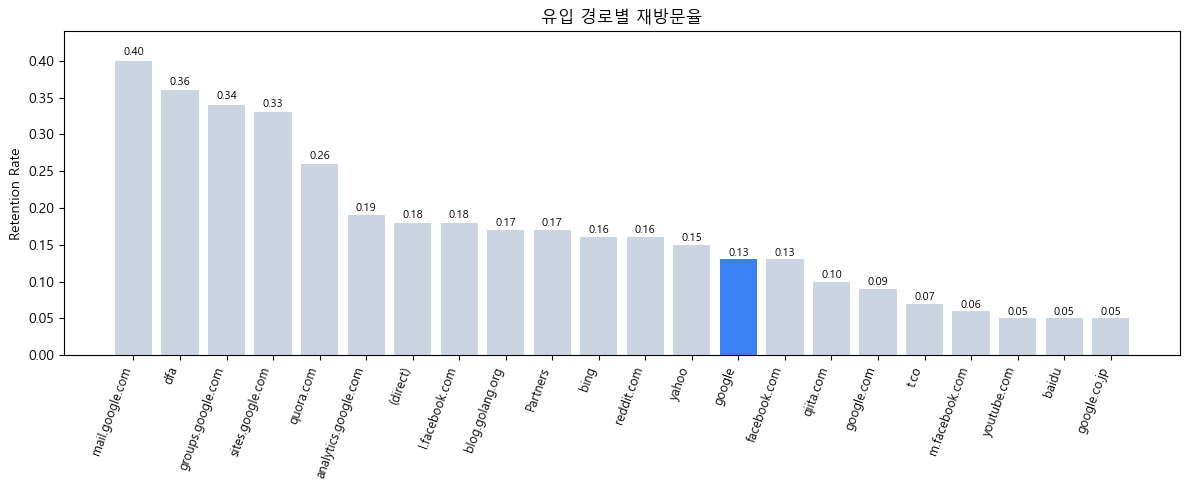

In [27]:
# ÏÜåÏä§Î≥Ñ Ïû¨Î∞©Î¨∏Ïú® ÎßâÎåÄÏ∞®Ìä∏Î•º Í∞ÄÏû• Í∞ÄÎ≥çÍ≤å Í∑∏Î¶ΩÎãàÎã§.

# ÏµúÏÜå ÏÇ¨Ïö©Ïûê Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÏÜåÏä§Î•º Í±∏Îü¨ÏÑú ÌëúÎ≥∏Ïù¥ ÎÑàÎ¨¥ ÏûëÏùÄ Í≤ΩÏö∞Î•º Ï§ÑÏûÖÎãàÎã§.
min_users = 100
plot_df = (
    agg.query("total_users >= @min_users")
       .sort_values("retention_rate", ascending=False)
       .reset_index(drop=True)
)

# Í∞ïÏ°∞ÌïòÍ≥† Ïã∂ÏùÄ ÏÜåÏä§Î•º Ìïú Í∞ÄÏßÄ ÏßÄÏ†ïÌï©ÎãàÎã§(ÏóÜÏúºÎ©¥ NoneÏúºÎ°ú Îë°ÎãàÎã§).
highlight_source = "google"

# Í∏∞Î≥∏ ÎßâÎåÄÏ∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§. Í∞ïÏ°∞ ÎåÄÏÉÅÎßå ÏÉâÏùÑ Îã§Î•¥Í≤å ÌëúÏãúÌï©ÎãàÎã§.
plt.figure(figsize=(12, 5))
colors = np.where(plot_df["source"].eq(highlight_source), "#3b82f6", "#cbd5e1")
bars = plt.bar(np.arange(len(plot_df)), plot_df["retention_rate"].values, color=colors)

# Ï∂ïÍ≥º Î†àÏù¥Î∏îÏùÑ Í∞ÑÎã®Ìûà ÏÑ§Ï†ïÌï©ÎãàÎã§.
plt.title("Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ïû¨Î∞©Î¨∏Ïú®")
plt.ylabel("Retention Rate")
plt.xticks(np.arange(len(plot_df)), plot_df["source"], rotation=70, ha="right", fontsize=9)

# Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞íÏùÑ Í∞ÑÎã®Ìûà ÌëúÏãúÌï©ÎãàÎã§.
ymax = float(plot_df["retention_rate"].max()) * 1.1 if len(plot_df) else 1.0
plt.ylim(0, ymax)
for rect, val in zip(bars, plot_df["retention_rate"].values):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height()*1.01, f"{val:.2f}",
             ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ Ïû¨Î∞©Î¨∏Ïú®ÏùÄ ÏúÑ Í∑∏ÎûòÌîÑÏôÄ Í∞ôÍ≥†, Í∞ÄÏû• ÎÜíÏùÄ ÏÑ∏ÏÖò ÏàòÎ•º Î≥¥Ïú†Ìïú googleÏùò Ïû¨Î∞©Î¨∏Ïú®ÏùÄ ÏïΩ 13%Î°ú Îã§Î•∏ Ïú†ÏûÖ Í≤ΩÎ°úÏôÄ ÎπÑÍµêÌñàÏùÑ Îïå, Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Î≥¥Ïù∏Îã§.

### (2) Î∞©Î¨∏ Îß§Ï≤¥

In [ ]:
# Îß§Ï≤¥Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥ºÍπåÏöî?

# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌï©ÎãàÎã§.
kdf = df.copy()

# ÏÇ¨Ïö©Ïûê√óÎß§Ï≤¥ Ï°∞Ìï©Î≥Ñ ÏÑ∏ÏÖò ÏàòÎ•º ÏÖâÎãàÎã§.
user_sessions = (
    kdf.***(["***", "***"], dropna=False)
       .size()
       .reset_index(name="session_count")
       .rename(columns={"trafficSource.medium": "medium"})
)

# Îß§Ï≤¥Î≥ÑÎ°ú Í≥†Ïú† ÏÇ¨Ïö©Ïûê ÏàòÏôÄ Ïû¨Î∞©Î¨∏ ÏÇ¨Ïö©Ïûê ÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§.
df_rtn_med = (
    user_sessions.groupby("medium", dropna=False)
      .agg(
          total_users=("fullVisitorId", "nunique"),
          retained_users=("session_count", lambda s: (s > 1).sum())
      )
      .assign(retention_rate=lambda d: (d["retained_users"] / d["total_users"]).round(2))
      .sort_values(["total_users", "retention_rate"], ascending=[False, False])
      .reset_index()
)

df_rtn_med

medium  total_users  retained_users  retention_rate
0    organic        73701            7728            0.10
1     (none)        60716            9733            0.16
2   referral        20845            1874            0.09
3        cpc         4201             649            0.15
4  affiliate         3652             477            0.13
5        cpm          964             221            0.23
6  (not set)            5               1            0.20

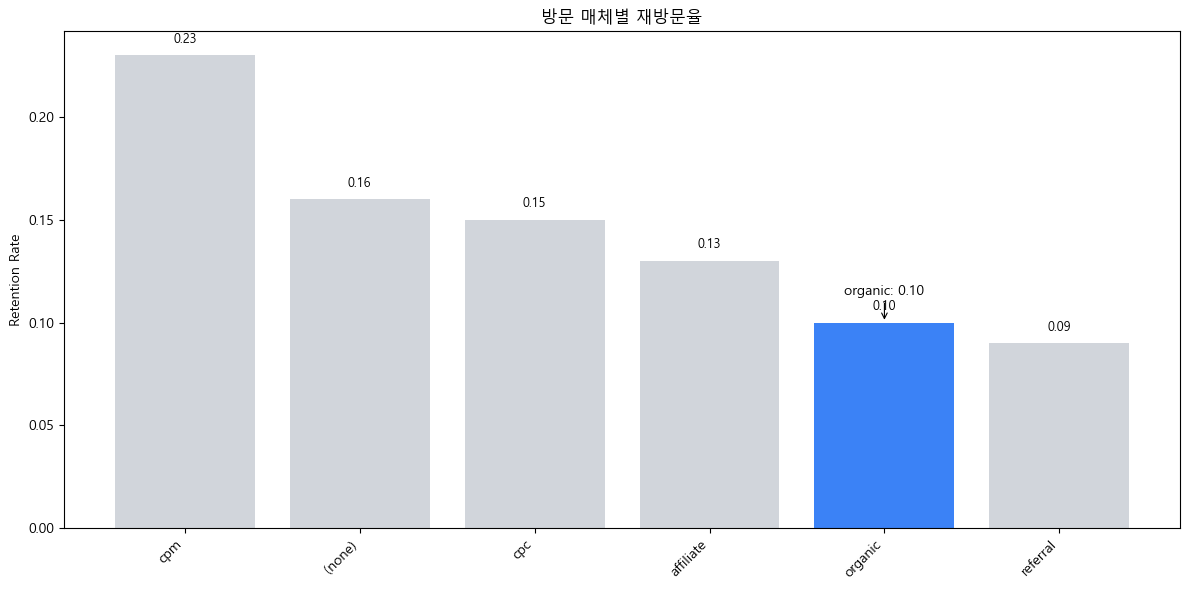

In [29]:
# Îß§Ï≤¥Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú Î≥¥Í≤†ÏäµÎãàÎã§.

# ÏµúÏÜå ÏÇ¨Ïö©Ïûê Ïàò Í∏∞Ï§ÄÏúºÎ°ú ÏûëÏùÄ ÏßëÎã®ÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
min_users = 100
plot_df = (
    df_rtn_med.query("total_users >= @min_users")
              .sort_values("retention_rate", ascending=False)
              .reset_index(drop=True)
)

# Í∞ïÏ°∞Ìï† Îß§Ï≤¥Î•º ÌïòÎÇò ÏÑ†ÌÉùÌïòÍ≤†ÏäµÎãàÎã§.
highlight_medium = "organic"

# ÎßâÎåÄÎ•º Í∑∏Î¶¨Í∏∞ ÏúÑÌïú ÏúÑÏπòÏôÄ Í∞íÏùÑ Ï§ÄÎπÑÌïòÍ≤†ÏäµÎãàÎã§.
x = np.arange(len(plot_df))
y = plot_df["retention_rate"].values

# Í∞ïÏ°∞ Îß§Ï≤¥Îäî ÏßÑÌïú ÏÉâ, ÎÇòÎ®∏ÏßÄÎäî Ïó∞Ìïú ÏÉâÏúºÎ°ú ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
colors = np.where(plot_df["medium"].eq(highlight_medium), "#3b82f6", "#d1d5db")

# ÎßâÎåÄ Ï∞®Ìä∏Î•º Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
plt.figure(figsize=(12, 6))
bars = plt.bar(x, y, color=colors)

# xÏ∂ïÏóê Îß§Ï≤¥ Ïù¥Î¶ÑÏùÑ ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
plt.xticks(x, plot_df["medium"], rotation=45, ha="right")
plt.ylabel("Retention Rate")
plt.title("Î∞©Î¨∏ Îß§Ï≤¥Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®")

# ÎßâÎåÄ ÏúÑÏóê Í∞íÏùÑ Í∞ÑÎã®Ìûà ÌëúÍ∏∞ÌïòÍ≤†ÏäµÎãàÎã§.
ymax = float(y.max()) if len(y) else 0.0
for rect, val in zip(bars, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height() + ymax*0.02,
             f"{val:.2f}", ha="center", va="bottom", fontsize=9)

# Í∞ïÏ°∞ Îß§Ï≤¥Í∞Ä ÏûàÏúºÎ©¥ Í∞ÑÎã®Ìûà Ï£ºÏÑùÏúºÎ°ú ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
if highlight_medium in plot_df["medium"].values:
    idx = int(plot_df.index[plot_df["medium"].eq(highlight_medium)][0])
    rect = bars[idx]
    plt.annotate(
        f"{highlight_medium}: {plot_df.loc[idx, 'retention_rate']:.2f}",
        xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
        xytext=(0, 18),
        textcoords="offset points",
        ha="center", va="bottom",
        arrowprops=dict(arrowstyle="->", lw=0.8)
    )

plt.tight_layout()
plt.show()

Í∞ÄÏû• ÎÜíÏùÄ ÏÑ∏ÏÖòÏùÑ Î≥¥Ïú†Ìïú organicÏùÄ ÏïΩ 10%Î°ú Îã§Î•∏ Î∞©Î¨∏ Îß§Ï≤¥Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Î≥¥Ïù∏Îã§.

### (3) Ï∫†ÌéòÏù∏

In [ ]:
# Ï∫†ÌéòÏù∏Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

# ÏõêÎ≥∏ÏùÑ Í±¥ÎìúÎ¶¨ÏßÄ ÏïäÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# ÎÇ†ÏßúÎäî YYYYMMDD ÌòïÏãùÏùÑ ÏïàÏ†ÑÌïòÍ≤å datetimeÏúºÎ°ú Î∞îÍæ∏Í≥†, ÌïòÎ£® Îã®ÏúÑ ÎπÑÍµêÎ•º ÏúÑÌï¥ ÏûêÏ†ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎßûÏ∂îÍ≤†ÏäµÎãàÎã§.
kdf["_session_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()

# ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏµúÏ¥à ÏÑ∏ÏÖò ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Ìï¥ÏÑú ÎåÄÌëú Ï∫†ÌéòÏù∏ÏùÑ ÎΩëÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.
kdf = kdf.***(["fullVisitorId", "_session_day"]) # Ï†ïÎ†¨ÌïòÎäî Î©îÏÜåÎìú! Î∞©Í∏àÎèÑ Ïì¥ Í≤É Í∞ôÏùÄÎç∞...?

# Í∞Å ÏÇ¨Ïö©Ïûê ÏïàÏóêÏÑú Í≤∞Ï∏°Ïù¥ ÏïÑÎãå Ï≤´ Ï∫†ÌéòÏù∏ÏùÑ ÎåÄÌëú Ï∫†ÌéòÏù∏ÏúºÎ°ú Ï†ïÌïòÍ≥†, Î™®Îëê Í≤∞Ï∏°Ïù¥Î©¥ (none)ÏúºÎ°ú ÏπòÌôòÌïòÍ≤†ÏäµÎãàÎã§.
first_campaign = (
    kdf.groupby("fullVisitorId")["trafficSource.campaign"]
       .apply(lambda s: s.dropna().iloc[0] if not s.dropna().empty else "(none)")
       .rename("campaign")
)

# ÎèôÏãúÏóê ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏ÏÖò Ïàò(Î∞©Î¨∏ ÌöüÏàò)Î•º ÏÑ∏Ïñ¥ Ïû¨Î∞©Î¨∏ Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÍ≤†ÏäµÎãàÎã§.
session_count = kdf.groupby("fullVisitorId").size().rename("session_count")

# ÎåÄÌëú Ï∫†ÌéòÏù∏Í≥º ÏÑ∏ÏÖò ÏàòÎ•º ÏÇ¨Ïö©Ïûê Îã®ÏúÑÎ°ú Ìï©ÏπòÍ≤†ÏäµÎãàÎã§.
user_sessions = pd.concat([first_campaign, session_count], axis=1).reset_index()

# Ï∫†ÌéòÏù∏Î≥ÑÎ°ú ÏÇ¨Ïö©Ïûê ÏàòÏôÄ Ïû¨Î∞©Î¨∏ ÏÇ¨Ïö©ÏûêÎ•º ÏßëÍ≥ÑÌïòÍ≥† Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
df_rtn_cpn = (
    user_sessions.groupby("campaign", dropna=False)
        .agg(
            total_users=("fullVisitorId", "nunique"),
            retained_users=("session_count", lambda s: (s > 1).sum())
        )
        .assign(retention_rate=lambda d: (d["retained_users"] / d["total_users"]).round(2))
        .sort_values(["total_users", "retention_rate"], ascending=[False, False])
        .reset_index()
)

# ÏÉÅÏúÑ 10Í∞úÎßå ÎØ∏Î¶¨ Î≥¥Í≤†ÏäµÎãàÎã§.
df_rtn_cpn.head(10)


campaign  total_users  retained_users  \
0                           (not set)       150805           21753   
1                    Data Share Promo         3402             584   
2                    AW - Accessories         2149             468   
3  AW - Dynamic Search Ads Whole Site         1360             423   
4                        AW - Apparel           20               4   
5                    AW - Electronics            2               0   

   retention_rate  
0            0.14  
1            0.17  
2            0.22  
3            0.31  
4            0.20  
5            0.00

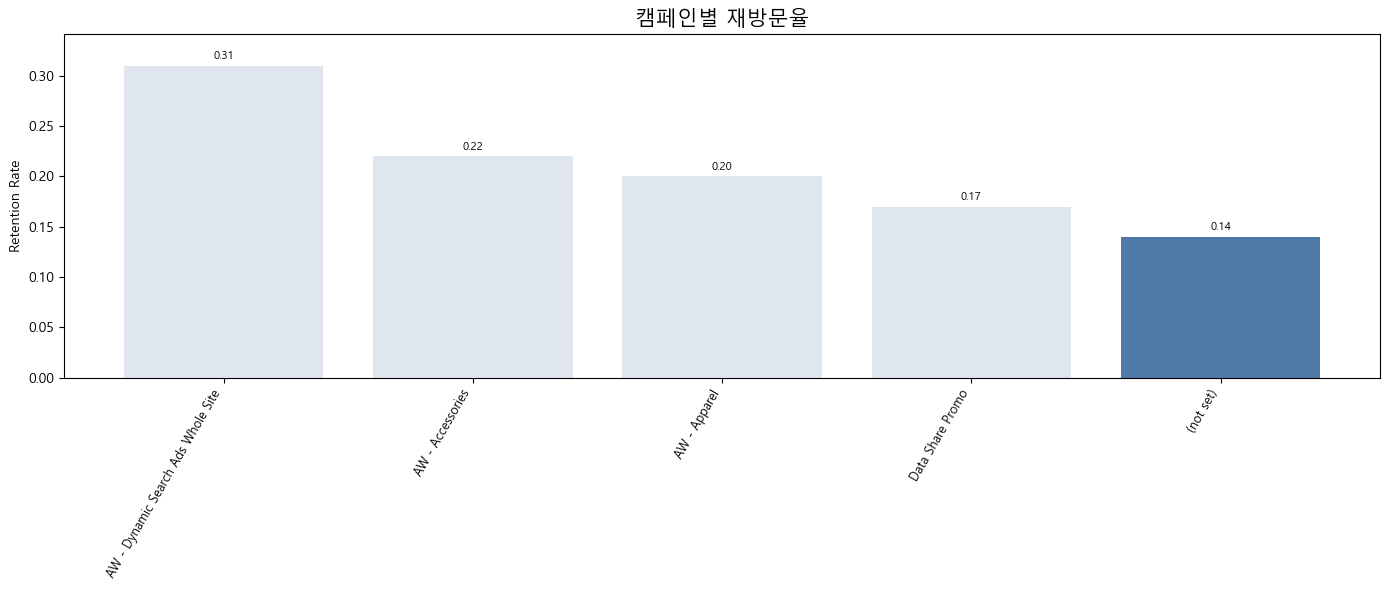

In [31]:
# Ï∫†ÌéòÏù∏Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú Î≥ºÍ≤åÏöî.
# Ïö∞Î¶¨Îäî ÏûëÏùÄ ÏßëÎã®Ïùò ÎÖ∏Ïù¥Ï¶àÎ•º Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ ÏµúÏÜå ÏÇ¨Ïö©Ïûê ÏàòÎ°ú ÌïÑÌÑ∞ÎßÅÌïòÍ≤†ÏäµÎãàÎã§.

min_users = 10  # ÏµúÏÜå ÏÇ¨Ïö©Ïûê Ïàò Í∏∞Ï§ÄÏûÖÎãàÎã§.
plot_df = (
    df_rtn_cpn.query("total_users >= @min_users")
              .sort_values("retention_rate", ascending=False)
              .reset_index(drop=True)
)

# Ïö∞Î¶¨Îäî ÌäπÏ†ï Ï∫†ÌéòÏù∏ÏùÑ ÎààÏóê ÎùÑÍ≤å ÌïòÎ†§Í≥† ÌïòÏù¥ÎùºÏù¥Ìä∏ ÎåÄÏÉÅÏùÑ ÌïòÎÇò Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
highlight_campaign = "(not set)"

# Ïö∞Î¶¨Îäî ÌïòÏù¥ÎùºÏù¥Ìä∏ ÎåÄÏÉÅÏùÄ ÏßÑÌïú ÏÉâ, ÎÇòÎ®∏ÏßÄÎäî Ïó∞Ìïú ÏÉâÏúºÎ°ú Íµ¨Î∂ÑÌï¥ÏÑú Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏù¥Í≤†ÏäµÎãàÎã§.
colors = np.where(plot_df["campaign"].eq(highlight_campaign), "#4f79a7", "#dfe6ee")

# Ïö∞Î¶¨Îäî ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º Í∑∏Î†§ÏÑú Ï∫†ÌéòÏù∏Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ ÌïúÎààÏóê Î≥¥Ïù¥Í≤å ÌïòÍ≤†ÏäµÎãàÎã§.
plt.figure(figsize=(14, 6))
ax = plt.gca()
bars = ax.bar(np.arange(len(plot_df)), plot_df["retention_rate"].values, color=colors)

# Ïö∞Î¶¨Îäî Ï∂ïÍ≥º Î†àÏù¥Î∏îÏùÑ Í∞ÑÍ≤∞ÌïòÍ≤å ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
ax.set_title("Ï∫†ÌéòÏù∏Î≥Ñ Ïû¨Î∞©Î¨∏Ïú®", fontsize=15)
ax.set_ylabel("Retention Rate")
ax.set_xticks(np.arange(len(plot_df)))
ax.set_xticklabels(plot_df["campaign"], rotation=60, ha="right", fontsize=9)

# Ïö∞Î¶¨Îäî ÏÉÅÎã®Ïù¥ ÏûòÎ¶¨ÏßÄ ÏïäÎèÑÎ°ù Ïó¨Ïú†Î•º ÎëêÍ≤†ÏäµÎãàÎã§.
ymax = float(plot_df["retention_rate"].max()) * 1.1 if len(plot_df) else 1.0
ax.set_ylim(0, ymax)

# Ïö∞Î¶¨Îäî Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞íÏùÑ Í∞ÑÎã®Ìûà ÌëúÏãúÌïòÍ≤†ÏäµÎãàÎã§.
for rect, val in zip(bars, plot_df["retention_rate"].values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + ymax*0.01,
            f"{val:.2f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

(not set)Ïùò Í≤ΩÏö∞ ÏïΩ 14%Î°ú Îã§Î•∏ Ï∫†ÌéòÏù∏Ïóê ÎπÑÌï¥ ÎÇÆÏùÄ Ïû¨Î∞©Î¨∏Ïú®ÏùÑ Î≥¥Ïù∏Îã§.

## 3.6. Ï£ºÍ∞ÑÎ≥Ñ Ïú†ÏûÖ Í≤ΩÎ°ú, Î∞©Î¨∏ Îß§Ï≤¥, Ï∫†ÌéòÏù∏ ÌôïÏù∏

### (1) Ïú†ÏûÖ Í≤ΩÎ°ú

In [32]:
# === Sessions by Week x Source (All Sessions, Monday anchor, 2017-05-01 ~ 2017-07-30) ===

# Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÏó¨ ÏõêÎ≥∏ÏùÑ Î≥¥Ìò∏ÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# ÎÇ†ÏßúÎ•º ÏïàÏ†ÑÌïòÍ≤å Ïùº Îã®ÏúÑÎ°ú Î≥ÄÌôòÌïòÍ≥† Î∂ÑÏÑù Íµ¨Í∞Ñ(5/1~7/30)Ïóê ÎßûÏ∂∞ ÌïÑÌÑ∞ÎßÅÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf[(kdf["_day"] >= "2017-05-01") & (kdf["_day"] <= "2017-07-30")].copy()

# Î™®Îì† ÎÇ†ÏßúÎ•º Ìï¥Îãπ Ï£ºÏùò ÏõîÏöîÏùºÎ°ú Ïä§ÎÉÖÌïòÏó¨ Ï£º ÏãúÏûëÏùºÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.
kdf["_week_start"] = kdf["_day"] - pd.to_timedelta(kdf["_day"].dt.weekday, unit="D")

# ÏÜåÏä§ Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
src_col = "trafficSource.source" if "trafficSource.source" in kdf.columns else "source"

# visitIdÍ∞Ä ÏûàÏúºÎ©¥ Í≥†Ïú† ÏÑ∏ÏÖò ÏàòÎ•º, ÏóÜÏúºÎ©¥ Ìñâ Í∞úÏàòÎ°ú ÏÑ∏ÏÖò ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
if {"fullVisitorId", "visitId"}.issubset(kdf.columns):
    kdf["_session_key"] = kdf["fullVisitorId"].astype(str) + "-" + kdf["visitId"].astype(str)
    df_inf = (
        kdf.groupby(["_week_start", src_col], dropna=False)["_session_key"]
           .nunique()
           .reset_index(name="visit_count")
           .rename(columns={src_col: "_source"})
           .sort_values(["_week_start", "visit_count"], ascending=[True, False])
    )
else:
    df_inf = (
        kdf.groupby(["_week_start", src_col], dropna=False)
           .size()
           .reset_index(name="visit_count")
           .rename(columns={src_col: "_source"})
           .sort_values(["_week_start", "visit_count"], ascending=[True, False])
    )

# Î≥¥Í∏∞ Ï¢ãÏùÄ Ï£ºÏ∞® ÎùºÎ≤®ÏùÑ Ï∂îÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.
df_inf["week"] = pd.to_datetime(df_inf["_week_start"]).dt.strftime("%Y-%m-%d")

# Í≤∞Í≥ºÎ•º Í∞ÑÎã®Ìûà ÎØ∏Î¶¨ Î≥¥Í≤†ÏäµÎãàÎã§.
display(df_inf.head(10))

_week_start               _source  visit_count        week
21  2017-05-01                google         7569  2017-05-01
0   2017-05-01              (direct)         4109  2017-05-01
61  2017-05-01           youtube.com         1251  2017-05-01
38  2017-05-01        m.facebook.com          532  2017-05-01
3   2017-05-01  analytics.google.com          347  2017-05-01
2   2017-05-01              Partners          289  2017-05-01
56  2017-05-01                  t.co          227  2017-05-01
31  2017-05-01     groups.google.com          159  2017-05-01
16  2017-05-01          facebook.com          126  2017-05-01
12  2017-05-01                   dfa          105  2017-05-01

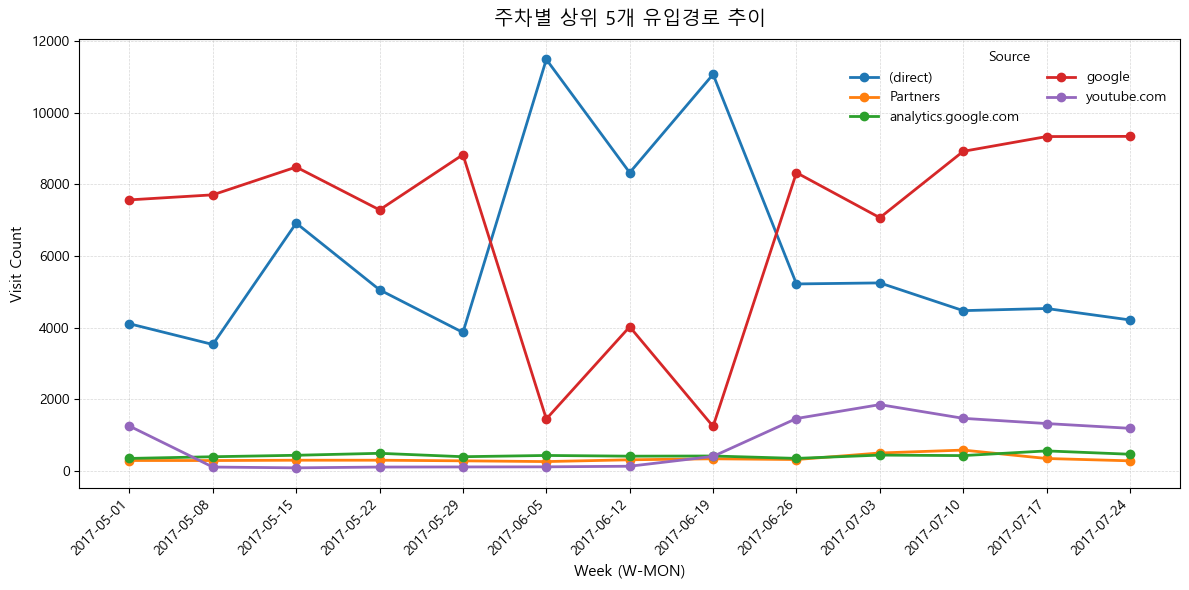

In [33]:
# Í∏∞Í∞Ñ Ï†ÑÏ≤¥ÏóêÏÑú Ïú†ÏûÖÍ≤ΩÎ°úÎ≥Ñ Î∞©Î¨∏ÏàòÎ•º Ìï©ÏÇ∞Ìï¥ ÏÉÅÏúÑ 5Í∞úÎ•º Í≥†Î•¥Í≤†ÏäµÎãàÎã§.
top5 = (
    df_inf.groupby("_source")["visit_count"].sum()
          .nlargest(5).index.tolist()
)

# ÏÉÅÏúÑ 5Í∞ú Ïú†ÏûÖÍ≤ΩÎ°úÎßå ÎÇ®Í∏∞Í≥† Ï£ºÏ∞®√óÏÜåÏä§ ÌîºÎ≤óÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.
pivot = (
    df_inf[df_inf["_source"].isin(top5)]
      .pivot(index="week", columns="_source", values="visit_count")
      .fillna(0)
      .sort_index()
)

# Ï£ºÏ∞®Î≥Ñ ÏÉÅÏúÑ 5Í∞ú Ïú†ÏûÖÍ≤ΩÎ°úÏùò Ï∂îÏù¥Î•º ÎùºÏù∏ Ï∞®Ìä∏Î°ú Î≥¥Ïù¥Í≤†ÏäµÎãàÎã§.
plt.figure(figsize=(12, 6))
ax = plt.gca()
for col in pivot.columns:
    ax.plot(pivot.index, pivot[col].values, marker="o", linewidth=2, label=col)

ax.set_title("Ï£ºÏ∞®Î≥Ñ ÏÉÅÏúÑ 5Í∞ú Ïú†ÏûÖÍ≤ΩÎ°ú Ï∂îÏù¥", fontsize=14, pad=10)
ax.set_xlabel("Week (W-MON)", fontsize=11)   # ÏõîÏöîÏùº ÏãúÏûë Ï£ºÏ∞® ÎùºÎ≤®ÏûÖÎãàÎã§.
ax.set_ylabel("Visit Count", fontsize=11)

ax.set_xticks(list(pivot.index))
ax.set_xticklabels(pd.to_datetime(pivot.index).strftime("%Y-%m-%d"),
                   rotation=45, ha="right")

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
ax.legend(title="Source", ncol=2, frameon=False)
plt.tight_layout()
plt.show()

### (2) Î∞©Î¨∏ Îß§Ï≤¥

In [34]:
# ÎÇ†ÏßúÎ•º Ïùº Îã®ÏúÑÎ°ú ÌååÏã±Ìï¥ÏÑú Ï£º(ÏõîÏöîÏùº ÏãúÏûë)Î°ú Ïä§ÎÉÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf.dropna(subset=["_day"])
kdf["_week_start"] = kdf["_day"] - pd.to_timedelta(kdf["_day"].dt.weekday, unit="D")  # ÏõîÏöîÏùºÎ°ú Ï†ïÎ†¨

# ÎßàÏßÄÎßâ Î∂ÄÎ∂Ñ Ï£º(2017-07-31 ÏãúÏûë)Îäî Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÍ≤†ÏäµÎãàÎã§.
last_anchor = pd.to_datetime("2017-07-31")
kdf = kdf[kdf["_week_start"] != last_anchor]

# Ï£ºÏ∞® √ó Ïú†ÏûÖ Îß§Ï≤¥Î≥Ñ ÏÑ∏ÏÖò ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
df_med = (
    kdf.groupby(["_week_start", "trafficSource.medium"], dropna=False)
       .size()
       .reset_index(name="visit_count")
       .rename(columns={"trafficSource.medium": "medium"})
       .sort_values(["_week_start", "visit_count"], ascending=[True, False])
       .reset_index(drop=True)
)

# Ï£ºÏ∞® ÎùºÎ≤®ÏùÄ Î≥¥Í∏∞ Ï¢ãÍ≤å YYYY-MM-DD Î¨∏ÏûêÏó¥Î°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
df_med["_week"] = df_med["_week_start"].dt.strftime("%Y-%m-%d")

# ÎØ∏Î¶¨Î≥¥Í∏∞Î•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
df_med.head(20)

_week_start     medium  visit_count       _week
0   2017-05-01    organic         7297  2017-05-01
1   2017-05-01     (none)         4109  2017-05-01
2   2017-05-01   referral         3109  2017-05-01
3   2017-05-01        cpc          378  2017-05-01
4   2017-05-01  affiliate          289  2017-05-01
5   2017-05-01        cpm          105  2017-05-01
6   2017-05-01  (not set)            2  2017-05-01
7   2017-05-08    organic         7434  2017-05-08
8   2017-05-08     (none)         3530  2017-05-08
9   2017-05-08   referral         1170  2017-05-08
10  2017-05-08        cpc          349  2017-05-08
11  2017-05-08  affiliate          288  2017-05-08
12  2017-05-08        cpm           77  2017-05-08
13  2017-05-15    organic         8115  2017-05-15
14  2017-05-15     (none)         6919  2017-05-15
15  2017-05-15   referral         1138  2017-05-15
16  2017-05-15        cpc          425  2017-05-15
17  2017-05-15  affiliate          297  2017-05-15
18  2017-05-15        cpm          116  2017-05-15
19  2017-05-15  (not set)            3  2017-05-15

C:\Users\Allen\AppData\Local\Temp\ipykernel_27452\3667579740.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20", len(top_mediums))


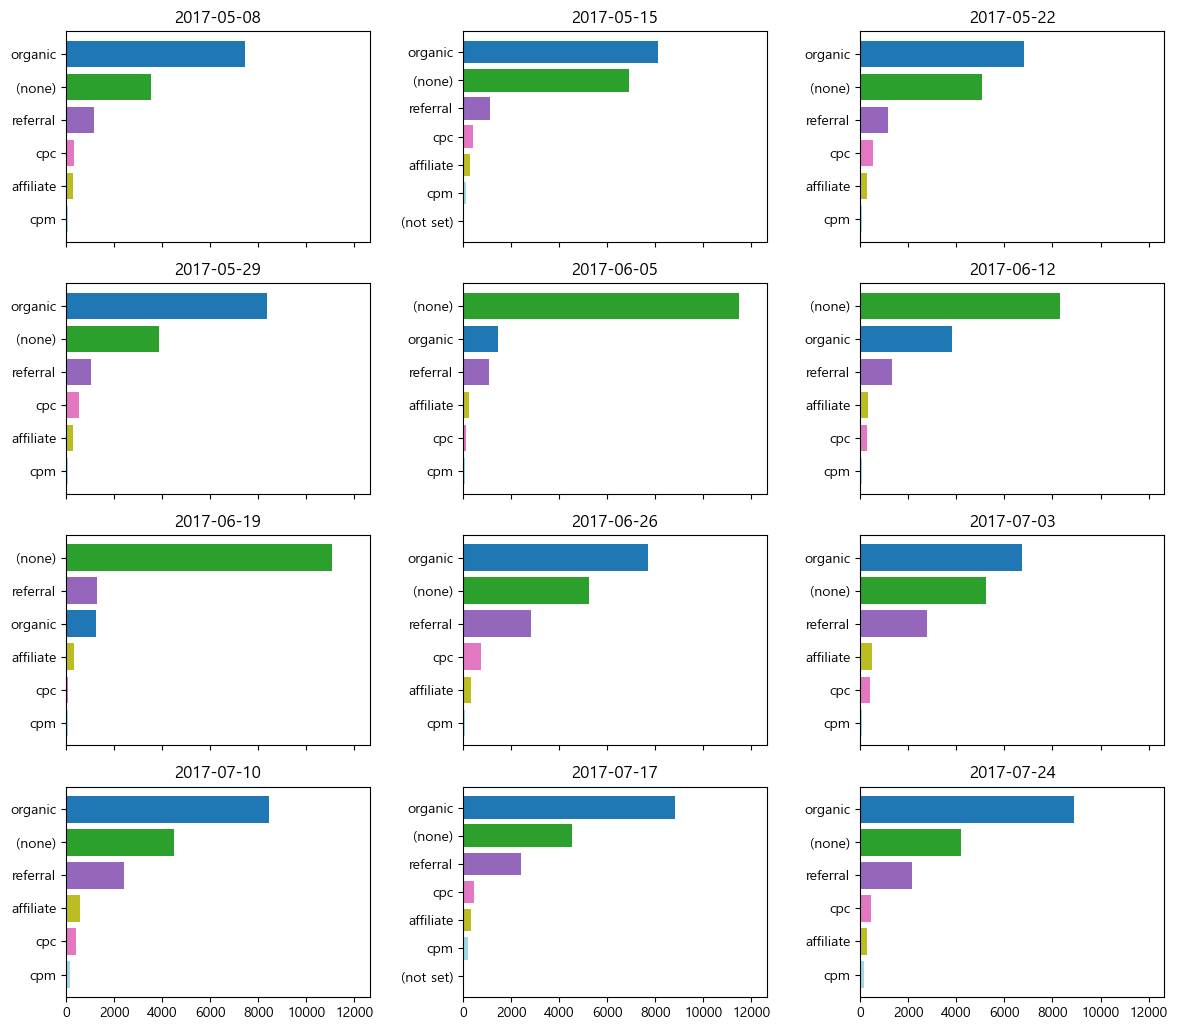

In [35]:
# ÏµúÍ∑º NÍ∞ú Ï£ºÏ∞®Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
N_WEEKS = 12

# Ï£ºÏ∞® ÎùºÎ≤®ÏùÑ ÏãúÍ∞ÑÏàúÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≥† ÏµúÍ∑º NÍ∞úÎßå Ï∂îÏ∂úÌïòÍ≤†ÏäµÎãàÎã§.
weeks = (
    pd.to_datetime(df_med["_week"]).sort_values().drop_duplicates()
      .dt.strftime("%Y-%m-%d").tolist()
)[-N_WEEKS:]

# ÏÑ†ÌÉùÌïú Ï£ºÏ∞® Îç∞Ïù¥ÌÑ∞Îßå ÎÇ®Í∏∞Í≥† Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
plot_df = (
    df_med[df_med["_week"].isin(weeks)]
      .sort_values(["_week", "visit_count"], ascending=[True, False])
      .reset_index(drop=True)
)

# ÏÉÅÏúÑ KÍ∞ú Îß§Ï≤¥ÏóêÎßå Í≥†Ï†ï ÏÉâÏùÑ ÎëêÍ≥† ÎÇòÎ®∏ÏßÄÎäî Í∏∞Î≥∏ ÏÉâÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
TOP_K = 6
from matplotlib.cm import get_cmap
top_mediums = plot_df.groupby("medium")["visit_count"].sum().nlargest(TOP_K).index.tolist()
cmap = get_cmap("tab20", len(top_mediums))
color_map = {m: cmap(i) for i, m in enumerate(top_mediums)}
default_color = (0.88, 0.92, 0.98, 1.0)

def pick_color(m):  # ÏÉÅÏúÑ Îß§Ï≤¥Î©¥ Í≥†Ï†ï ÏÉâÏùÑ, ÏïÑÎãàÎ©¥ Í∏∞Î≥∏ ÏÉâÏùÑ Ïì∞Í≤†ÏäµÎãàÎã§.
    return color_map.get(m, default_color)

# Í≥ºÎèÑÌïú Ìï≠Î™©ÏùÄ OthersÎ°ú Î¨∂Ïñ¥ Í∞ÄÎèÖÏÑ±ÏùÑ ÌôïÎ≥¥ÌïòÍ≤†ÏäµÎãàÎã§.
MAX_BARS = 7

# ÏÜåÌòï Î©ÄÌã∞ÌîåÎ°ØÏùÑ Íµ¨ÏÑ±ÌïòÍ≤†ÏäµÎãàÎã§.
import math, matplotlib.pyplot as plt
NCOLS = 3
n = len(weeks)
nrows = max(1, math.ceil(n / NCOLS))
fig, axes = plt.subplots(nrows=nrows, ncols=NCOLS, sharex=True, figsize=(12, 2.6*nrows))
axes = axes.ravel() if n > 1 else [axes]

# Ï£ºÏ∞®Î≥ÑÎ°ú Í∞ÑÎã®Ìïú Í∞ÄÎ°ú ÎßâÎåÄÎ•º Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
xmax = float(plot_df["visit_count"].max()) * 1.1 if len(plot_df) else 1.0
for ax, wk in zip(axes, weeks):
    wdf = plot_df[plot_df["_week"] == wk].copy()
    if len(wdf) > MAX_BARS:  # ÎÑàÎ¨¥ ÎßéÏùÄ Îß§Ï≤¥Îäî OthersÎ°ú Î¨∂Í≤†ÏäµÎãàÎã§.
        head = wdf.head(MAX_BARS - 1)
        others = pd.DataFrame([{"_week": wk, "medium": "Others",
                                "visit_count": wdf["visit_count"].iloc[MAX_BARS-1:].sum()}])
        wdf = pd.concat([head, others], ignore_index=True)
    wdf = wdf.sort_values("visit_count", ascending=True)  # ÌÅ∞ Í∞íÏù¥ ÏúÑÎ°ú Ïò§Í≤å Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
    ax.barh(wdf["medium"], wdf["visit_count"], color=[pick_color(m) for m in wdf["medium"]])
    ax.set_title(wk); ax.set_xlim(0, xmax)  # Ï†úÎ™©Í≥º xÏ∂ï Î≤îÏúÑÎßå ÏÑ§Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.

# ÎÇ®Îäî Ï∂ïÏùÄ Ïà®Í∏∞Í≤†ÏäµÎãàÎã§.
for ax in axes[len(weeks):]:
    ax.axis("off")

# Ïó¨Î∞±ÏùÑ Ï†ïÎ¶¨ÌïòÍ≥† Í∑∏Î¶ºÏùÑ Ï∂úÎ†•ÌïòÍ≤†ÏäµÎãàÎã§.
plt.tight_layout()
plt.show()

### (3) Ï∫†ÌéòÏù∏

In [36]:
# ÏõêÎ≥∏ Î≥ÄÌòïÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf.dropna(subset=["_day"])
kdf["_week_start"] = kdf["_day"] - pd.to_timedelta(kdf["_day"].dt.weekday, unit="D")  # ÏõîÏöîÏùºÎ°ú Ï†ïÎ†¨

# ÎßàÏßÄÎßâ Î∂ÄÎ∂Ñ Ï£º(2017-07-31 ÏãúÏûë)Îäî Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÍ≤†ÏäµÎãàÎã§.
last_anchor = pd.to_datetime("2017-07-31")
kdf = kdf[kdf["_week_start"] != last_anchor]

# (Ï£ºÏ∞®, Ï∫†ÌéòÏù∏)Î≥Ñ ÏÑ∏ÏÖò ÏàòÎ•º ÏßëÍ≥ÑÌïòÍ≥† Ï†ïÎ†¨¬∑Ïª¨ÎüºÎ™ÖÏùÑ Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
weekly_cpn = (
    kdf.groupby(["_week_start", "trafficSource.campaign"], dropna=False)
          .size()
          .reset_index(name="visit_count")
          .rename(columns={"trafficSource.campaign": "_campaign"})
          .sort_values(["_week_start", "visit_count"], ascending=[True, False])
          .reset_index(drop=True)
)

# ÏãúÍ∞ÅÌôî¬∑ÌëúÏãúÏö©ÏúºÎ°ú Ï£ºÏ∞® ÎùºÎ≤®ÏùÑ YYYY-MM-DD Î¨∏ÏûêÏó¥Î°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
weekly_cpn["_week_start"] = weekly_cpn["_week_start"].dt.strftime("%Y-%m-%d")

# Í≤∞Í≥º ÏùºÎ∂ÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
weekly_cpn.head(20)

_week_start                           _campaign  visit_count
0   2017-05-01                           (not set)        14652
1   2017-05-01                    Data Share Promo          289
2   2017-05-01                    AW - Accessories          261
3   2017-05-01  AW - Dynamic Search Ads Whole Site           84
4   2017-05-01                        AW - Apparel            2
5   2017-05-01                    AW - Electronics            1
6   2017-05-08                           (not set)        12228
7   2017-05-08                    Data Share Promo          288
8   2017-05-08                    AW - Accessories          237
9   2017-05-08  AW - Dynamic Search Ads Whole Site           95
10  2017-05-15                           (not set)        16308
11  2017-05-15                    AW - Accessories          331
12  2017-05-15                    Data Share Promo          297
13  2017-05-15  AW - Dynamic Search Ads Whole Site           73
14  2017-05-15                        AW - Apparel            4
15  2017-05-22                           (not set)        13166
16  2017-05-22                    AW - Accessories          422
17  2017-05-22                    Data Share Promo          297
18  2017-05-22  AW - Dynamic Search Ads Whole Site           98
19  2017-05-22                        AW - Apparel            2

C:\Users\Allen\AppData\Local\Temp\ipykernel_27452\2529751061.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20", max(10, len(campaigns)))


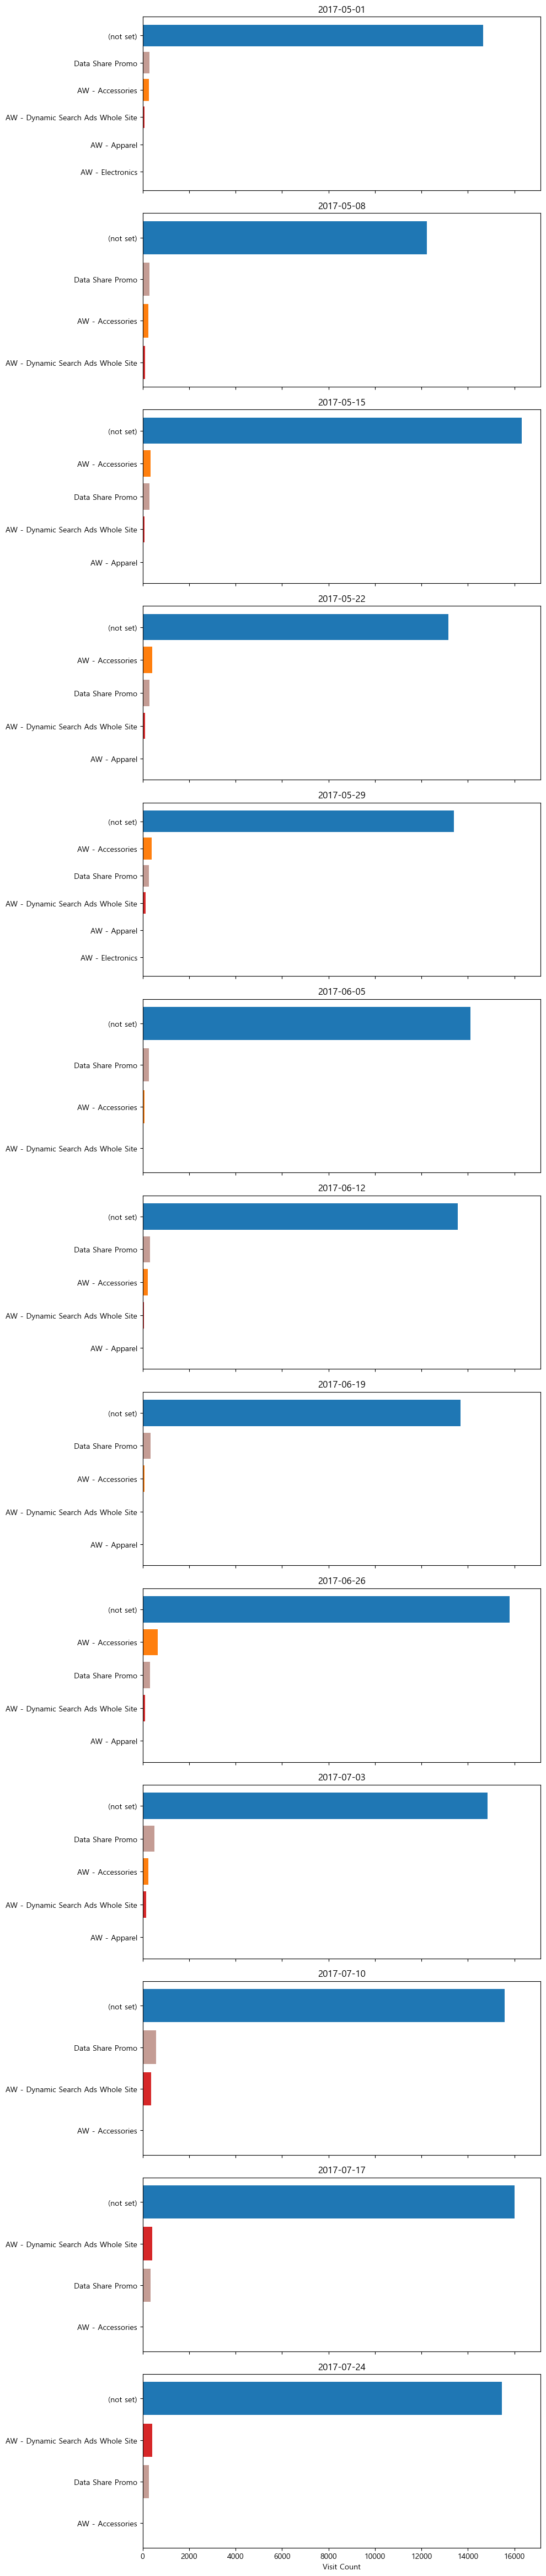

In [37]:
# ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÖÄ ÏÉÅÎã®ÏóêÏÑú Î∞îÎ°ú Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
weeks_to_show = 14
top_k = 6

# ÏõêÎ≥∏ Î≥¥Ìò∏Î•º ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏúºÎ°ú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
dfp = weekly_cpn.copy()

# Ï£ºÏ∞®Í∞Ä Î¨∏ÏûêÏó¥Ïù¥Î©¥ datetimeÏúºÎ°ú ÌÜµÏùºÌïòÍ≤†ÏäµÎãàÎã§.
if not np.issubdtype(dfp["_week_start"].dtype, np.datetime64):
    dfp["_week_start"] = pd.to_datetime(dfp["_week_start"])

# Ï∫†ÌéòÏù∏ Í≤∞Ï∏°Í≥º Îπà Î¨∏ÏûêÏó¥ÏùÑ ÌÜµÏùºÌïòÍ≤†ÏäµÎãàÎã§.
dfp["_campaign"] = dfp["_campaign"].fillna("(not set)").replace("", "(not set)")

# ÏµúÍ∑º NÏ£ºÎßå ÏÑ†ÌÉùÌïòÍ≤†ÏäµÎãàÎã§.
weeks = dfp["_week_start"].drop_duplicates().sort_values().to_list()[-weeks_to_show:]
dfp = dfp[dfp["_week_start"].isin(weeks)]

# Í∞Å Ï£ºÏóêÏÑú Î∞©Î¨∏Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ KÍ∞úÎßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
dfp = (dfp.sort_values(["_week_start", "visit_count"], ascending=[True, False])
          .groupby("_week_start", group_keys=False)
          .head(top_k))

# Îì±Ïû• Ï∫†ÌéòÏù∏Ïóê ÎåÄÌï¥ Í≥†Ï†ï ÏÉâÏùÑ Îß§ÌïëÌïòÍ≤†ÏäµÎãàÎã§.
from matplotlib.cm import get_cmap
campaigns = sorted(dfp["_campaign"].unique())
cmap = get_cmap("tab20", max(10, len(campaigns)))
color_map = {c: cmap(i % cmap.N) for i, c in enumerate(campaigns)}

# Ï£ºÏ∞® ÏàòÏóê ÎßûÏ∂∞ Í∞ÑÎã®Ìïú ÏÑ∏Î°ú Ìå®ÎÑêÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.
n = len(weeks)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, max(2.0, 0.6*top_k)*n), sharex=True)
if n == 1:
    axes = [axes]

# Ï£ºÏ∞®Î≥ÑÎ°ú Í∞ÄÎ°ú ÎßâÎåÄÎ•º Í∑∏Î¶¨Í≤†ÏäµÎãàÎã§.
for ax, wk in zip(axes, weeks):
    wdf = dfp[dfp["_week_start"].eq(wk)].sort_values("visit_count", ascending=True)
    ax.barh(wdf["_campaign"], wdf["visit_count"], color=[color_map[c] for c in wdf["_campaign"]])
    ax.set_title(wk.strftime("%Y-%m-%d"))

# Í≥µÌÜµ xÏ∂ï ÎùºÎ≤®ÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Î†àÏù¥ÏïÑÏõÉÏùÑ Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
axes[-1].set_xlabel("Visit Count")
plt.tight_layout()
plt.show()

Ïó¨Í∏∞ÍπåÏßÄ Î≥¥ÏïòÏùÑ Îïå! Î≠îÍ∞Ä ÌäπÏù¥Ï†êÏù¥ ÏûàÏóàÎÇòÏöî?

ÏòàÏÉÅÎ≥¥Îã§ 06-26 Ï£ºÍ∞Ñ ÎßåÏùò Ï∞®Ïù¥Ï†êÏùÄ ÏóÜÏóàÎçò Í≤É Í∞ôÏïÑÏöî.

Í∑∏ ÏßÅÏ†Ñ ÎåÄÎûµ Ìïú Îã¨ Í∞Ñ Íµ¨Í∏ÄÏùÑ ÌÜµÌïú Ïú†ÏûÖÏù¥ Îñ®Ïñ¥ÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏóàÏúºÎÇò, ÌôïÏã§ÌïòÍ≤å Ïù¥Í≤ÉÏù¥ ÏõêÏù∏Ïù¥ÎùºÍ≥† ÎßêÌïòÍ∏¥ Ïñ¥Î†§Ïö∏ Í≤É Í∞ôÏïÑÏöî.

Î™®Îç∏ÎßÅÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Ïù¥Î©¥Ïùò Ïà®ÏùÄ ÎúªÏùÑ Ï∞æÏïÑÎ¥ÖÏãúÎã§!

Îã§Ïùå ÏΩîÎìúÎì§ÏùÄ ÏÑ∏ÏÖòÏùò ÌîºÏ≤òÎ•º ÌôúÏö©ÌïòÏó¨ Ïû¨Î∞©Î¨∏ Ïó¨Î∂Ä(0 or 1)ÏùÑ ÏòàÏ∏°ÌïòÍ≥† ÏûàÏñ¥Ïöî.

`Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º Ïù¥Ïö©Ìïú Î∂ÑÎ•ò`ÎùºÍ≥† Ìï† Ïàò ÏûàÍ≤†ÎÑ§Ïöî.

06-26Ï£ºÍ∞ÑÏùÑ test ÏÖãÏúºÎ°ú Îëî ÌõÑ, ÎÇòÎ®∏ÏßÄ ÎÇ†ÏßúÎì§ÏùÑ train setÏúºÎ°ú ÎëêÏóàÏùÑ Îïå

test Ï£ºÍ∞ÑÏùÄ ÏòàÏÉÅÎ≥¥Îã§ ÎÜíÏùÄ Î¶¨ÌÖêÏÖòÏùÑ Î≥¥Ïù∏Í±∏ÍπåÏöî? ÌòπÏùÄ Îçî ÎÇÆÏùÄ Î¶¨ÌÖêÏÖòÏùÑ Î≥¥Ïù∏Í±∏ÍπåÏöî?

In [ ]:
# Ïù¥ ÏÖÄÏùÄ 06-26 ÏΩîÌò∏Ìä∏Ïùò 1Ï£º Î¶¨ÌÖêÏÖòÏù¥ Í∏∞ÎåÄÏπòÎ≥¥Îã§ ÎÇÆÏïòÎäîÏßÄ ÏµúÏÜå Ï†ÑÏ≤òÎ¶¨+Î°úÏßÄÏä§Ìã±ÏúºÎ°ú ÌôïÏù∏Ìï©ÎãàÎã§.

UID = "fullVisitorId"
TARGET_COHORT = pd.to_datetime("2017-06-26")

# ÎÇ†ÏßúÎ•º ÌååÏã±ÌïòÍ≥† Í∞Å ÏÑ∏ÏÖò ÎÇ†ÏßúÎ•º Í∑∏ Ï£ºÏùò ÏõîÏöîÏùºÎ°ú Ïä§ÎÉÖÌï©ÎãàÎã§.
k = df.copy()
k["_day"] = pd.to_datetime(k["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
k = k.dropna(subset=["_day"])
k["_first_day"]    = k.groupby(UID)["_day"].transform("min")
k["_first_week"]   = k["_first_day"]  - pd.to_timedelta(k["_first_day"].dt.weekday,  unit="D")
k["_session_week"] = k["_day"]        - pd.to_timedelta(k["_day"].dt.weekday,       unit="D")

# ÏµúÏ¥à Ï£ºÎ°úÎ∂ÄÌÑ∞Ïùò Í≤ΩÍ≥º Ï£ºÏ∞®Î•º Í≥ÑÏÇ∞ÌïòÍ≥† ÏùåÏàòÎäî Ï†úÍ±∞Ìï©ÎãàÎã§.
k["week_passed"] = ((k["_session_week"] - k["_first_week"]).dt.days // 7).astype(int)
k = k[k["week_passed"] >= 0].copy()

# Îç∞Ïù¥ÌÑ∞Ïùò ÎßàÏßÄÎßâ ÏãúÏûë Ï£º(Î∂ÄÎ∂Ñ ÏΩîÌò∏Ìä∏)Îäî ÌïôÏäµÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.
last_anchor = k["_first_week"].max()
k = k[k["_first_week"] != last_anchor].copy()

# ÏÇ¨Ïö©Ïûê Îã®ÏúÑÎ°ú '1Ï£º ÎÇ¥ Ïû¨Î∞©Î¨∏ Ïó¨Î∂Ä' ÎùºÎ≤®ÏùÑ ÎßåÎì≠ÎãàÎã§.
y1_uid = (
    k.groupby(UID)["week_passed"]
     .apply(lambda s: int((s == 1).any()))
     .rename("y")
)

# ÏÇ¨Ïö©Ïûê Ï≤´ ÏÑ∏ÏÖò Ìïú ÌñâÎßå ÎÇ®Í∏∞Í≥† ÌäπÏßïÍ≥º ÎùºÎ≤®ÏùÑ Í≤∞Ìï©Ìï©ÎãàÎã§.
first_idx = k.groupby(UID)["_day"].idxmin()
base_cols = [
    UID, "_first_week",
    "trafficSource.source","trafficSource.medium","trafficSource.campaign","geoNetwork.country",
    "totals.newVisits","totals.pageviews","totals.timeOnSite",
    "action_type_count_1","action_type_count_2","action_type_count_3","action_type_count_5","action_type_count_6"
]
use_cols = [c for c in base_cols if c in k.columns]
X = k.loc[first_idx, use_cols].copy().join(y1_uid, on=UID)

# ÌÉÄÍπÉ ÏΩîÌò∏Ìä∏Î•º ÌôÄÎìúÏïÑÏõÉÏúºÎ°ú ÎëêÍ≥† ÎÇòÎ®∏ÏßÄ ÏΩîÌò∏Ìä∏Î°ú ÌïôÏäµÌï©ÎãàÎã§.
hold_df  = X[X["_first_week"].eq(TARGET_COHORT)].copy()
train_df = X[~X["_first_week"].eq(TARGET_COHORT)].copy()

# Î≤îÏ£ºÌòïÍ≥º ÏàòÏπòÌòï ÌäπÏßïÏùÑ ÏïàÏ†ÑÌïòÍ≤å Íµ¨Î∂ÑÌï©ÎãàÎã§.
cat_cols = [c for c in ["trafficSource.source","trafficSource.medium","trafficSource.campaign","geoNetwork.country"] if c in X.columns]
num_cols = [c for c in ["totals.newVisits","totals.pageviews","totals.timeOnSite",
                        "action_type_count_1","action_type_count_2","action_type_count_3","action_type_count_5","action_type_count_6"] if c in X.columns]
feature_cols = cat_cols + num_cols

# Í≤∞Ï∏°ÏùÑ Îã®Ïàú ÎåÄÏπòÌïòÍ≥† Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÌõÑ Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÏòàÏ∏°Ìï©ÎãàÎã§.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pre = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                          ("ohe", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ("num", Pipeline([("imp", SimpleImputer(strategy="median"))]), num_cols),
    ],
    remainder="drop",
)

pipe = Pipeline([("pre", pre),
                 ("clf", LogisticRegression(max_iter=2000, C=1.0, n_jobs=None))])

pipe.fit(train_df[feature_cols], train_df["y"])

# ÌôÄÎìúÏïÑÏõÉ ÏΩîÌò∏Ìä∏Ïùò ÏòàÏÉÅ Î¶¨ÌÖêÏÖòÏùÑ ÌèâÍ∑† ÌôïÎ•†Î°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
p_hat = pipe.predict_proba(hold_df[feature_cols])[:, 1]

# Ïã§Ï†úÍ∞íÍ≥º Í∏∞ÎåÄÍ∞í, Í∑∏Î¶¨Í≥† ÏûîÏ∞®Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.
actual   = float(hold_df["y"].mean())
expected = float(p_hat.mean())
residual = actual - expected

print(f"[Rows] train={len(train_df):,}, hold(06-26)={len(hold_df):,}")
print("=== 06-26 cohort ‚Äî week_passed==1 (Heatmap-style) ===")
print(f"Actual   : {actual:.4f}")
print(f"Expected : {expected:.4f}")
print(f"Residual : {residual:+.4f}")

[Rows] train=142,219, hold(06-26)=13,603
=== 06-26 cohort ‚Äî week_passed==1 (Heatmap-style) ===
Actual   : 0.0248
Expected : 0.0307
Residual : -0.0059


c:\Users\Allen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Î™®Îç∏ÏùÄ Í∑∏ Ï£ºÍ∞ÑÏóê ÎåÄÌï¥ÏÑú 3.07%Ïùò Î¶¨ÌÖêÏÖòÏùÑ ÏòàÏÉÅÌñàÏäµÎãàÎã§!

Îã§Îßå Ïö∞Î¶¨Í∞Ä ÏïåÍ≥† ÏûàÎã§ÏãúÌîº Ïã§Ï†úÎ°úÎäî 2.48% Î∞ñÏóê Î≥¥Ïù¥ÏßÄ ÏïäÏïòÏ£†.

0.59%Ïùò Ï∞®Ïù¥Îäî Ïñ¥ÎîîÏÑú ÎÇúÍ±∏ÍπåÏöî?

ÌîºÏ≤òÎì§(ÏÑ∏Í∑∏Î®ºÌä∏)Î≥ÑÎ°ú ÏòàÏÉÅÍ∞íÏùÑ Î∂ÑÌï¥ÌïòÏó¨ Ïñ¥ÎîîÏÑú Ï†úÏùº ÎßéÏùÄ Ïò§Î•òÍ∞Ä ÎÇ¨ÎäîÏßÄ ÌååÏïÖÌï¥Î¥ÖÏãúÎã§.

In [39]:
# ÌÉÄÍπÉ ÏΩîÌò∏Ìä∏ÏôÄ ÏÇ¨Ïö©Ïûê ÌÇ§Î•º Ï†ïÏùòÌï©ÎãàÎã§.
UID = "fullVisitorId"
TARGET_COHORT = pd.to_datetime("2017-06-26")  # ÏõîÏöîÏùº ÏïµÏª§(2017-06-26)

# ÎÇ†ÏßúÎ•º ÌååÏã±ÌïòÍ≥† ÏõîÏöîÏùº ÏãúÏûë Ï£ºÏ∞®Î°ú Ïä§ÎÉÖÌï©ÎãàÎã§.
kdf = df.copy()
kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf.dropna(subset=["_day"])
kdf["_first_day"]   = kdf.groupby(UID)["_day"].transform("min")
kdf["_first_week"]  = kdf["_first_day"]  - pd.to_timedelta(kdf["_first_day"].dt.weekday,  unit="D")
kdf["_session_week"] = kdf["_day"]       - pd.to_timedelta(kdf["_day"].dt.weekday,       unit="D")

# Îã§Ïùå Ï£ºÏóê Ïû¨Î∞©Î¨∏ÌñàÎäîÏßÄÎ•º ÏÇ¨Ïö©Ïûê Îã®ÏúÑ ÎùºÎ≤®Î°ú ÎßåÎì≠ÎãàÎã§.
kdf["week_pass"] = ((kdf["_session_week"] - kdf["_first_week"]).dt.days // 7).astype(int)
y_heatmap = kdf.groupby(UID)["week_pass"].transform(lambda s: int((s == 1).any()))

# Ï≤´ ÏÑ∏ÏÖòÎßå ÎÇ®Í∏∞Í≥† ÌïÑÏöîÌïú Ïó¥Í≥º ÎùºÎ≤®ÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§.
first = kdf["_day"].eq(kdf["_first_day"])
X = kdf.loc[first, [
    UID, "_first_week",
    "trafficSource.source", "trafficSource.medium", "trafficSource.campaign", "geoNetwork.country"
]].copy()
X["y"] = y_heatmap.loc[first].astype(int)

# ÌÉÄÍπÉ ÏΩîÌò∏Ìä∏Î•º ÌôÄÎìúÏïÑÏõÉÏúºÎ°ú, ÎÇòÎ®∏ÏßÄÎ•º Í∏∞Ï§ÄÏÑ†ÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
hold = X[X["_first_week"].eq(TARGET_COHORT)]
base = X[~X["_first_week"].eq(TARGET_COHORT)]

# ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÏûîÏ∞® ÌÖåÏù¥Î∏îÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Í∞ÑÎã® Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.
def seg_table(by: str, min_n_target=30, top_k=12, underperform=True):
    base_mean = base.groupby(by, dropna=False)["y"].mean().rename("expected_base")
    tgt = hold.groupby(by, dropna=False)["y"].agg(n="size", actual="mean").reset_index()
    out = tgt.merge(base_mean, on=by, how="left")
    out["expected_base"] = out["expected_base"].fillna(out["actual"].mean())
    out["residual"] = out["actual"] - out["expected_base"]
    out["contrib_users"] = out["residual"] * out["n"]
    out = out.query("n >= @min_n_target")
    out = out.sort_values("contrib_users", ascending=underperform)
    return out.head(top_k)

# Í≤∞Í≥º ÏöîÏïΩÍ≥º Ï£ºÏöî ÏÑ∏Í∑∏Î®ºÌä∏ ÏûîÏ∞®Î•º ÌëúÏãúÌï©ÎãàÎã§.
print(f"[Rows] target(06-26)={len(hold):,} | Actual={hold['y'].mean():.4f}")

from IPython.display import display
for col in ["trafficSource.source", "trafficSource.medium", "trafficSource.campaign", "geoNetwork.country"]:
    print(f"\n## [UNDER] by {col}")
    display(seg_table(col, min_n_target=30, top_k=12, underperform=True)
            [[col, "n", "actual", "expected_base", "residual", "contrib_users"]])

[Rows] target(06-26)=14,517 | Actual=0.0276

## [UNDER] by trafficSource.source


trafficSource.source     n    actual  expected_base  residual  \
0               (direct)  4111  0.037704       0.051767 -0.014063   
17                google  7432  0.025969       0.032055 -0.006086   
1               Partners   282  0.021277       0.044250 -0.022974   
35        m.facebook.com   464  0.002155       0.007449 -0.005294   
14          facebook.com    76  0.026316       0.047059 -0.020743   
3   analytics.google.com   257  0.038911       0.043565 -0.004655   
22            google.com    70  0.014286       0.022954 -0.008668   
48             quora.com    37  0.000000       0.016129 -0.016129   
49            reddit.com    37  0.000000       0.007026 -0.007026   
57                  t.co    35  0.000000       0.006961 -0.006961   
6                  baidu    45  0.000000       0.004598 -0.004598   
60           youtube.com  1410  0.012766       0.011059  0.001707   

    contrib_users  
0      -57.812146  
17     -45.230811  
1       -6.478579  
35      -2.456238  
14      -1.576471  
3       -1.196294  
22      -0.606786  
48      -0.596774  
49      -0.259953  
57      -0.243619  
6       -0.206897  
60       2.406183


## [UNDER] by trafficSource.medium


trafficSource.medium     n    actual  expected_base  residual  contrib_users
0               (none)  4111  0.037704       0.051768 -0.014065     -57.819263
4              organic  6886  0.025559       0.030345 -0.004786     -32.957899
5             referral  2570  0.017510       0.025176 -0.007666     -19.701809
2                  cpc   654  0.027523       0.057062 -0.029539     -19.318644
1            affiliate   282  0.021277       0.044250 -0.022974      -6.478579


## [UNDER] by trafficSource.campaign


trafficSource.campaign      n    actual  expected_base  \
0                           (not set)  13585  0.027825       0.038600   
1                    AW - Accessories    562  0.017794       0.054054   
4                    Data Share Promo    282  0.021277       0.044250   
3  AW - Dynamic Search Ads Whole Site     83  0.072289       0.061093   

   residual  contrib_users  
0 -0.010775    -146.380799  
1 -0.036260     -20.378378  
4 -0.022974      -6.478579  
3  0.011196       0.929260


## [UNDER] by geoNetwork.country


geoNetwork.country     n    actual  expected_base  residual  contrib_users
153      United States  6037  0.039424       0.054906 -0.015482     -93.464605
63               India   977  0.008188       0.021341 -0.013152     -12.849818
51             Germany   390  0.002564       0.022794 -0.020230      -7.889783
27              Canada   399  0.022556       0.038661 -0.016104      -6.425668
126          Singapore   138  0.014493       0.058700 -0.044207      -6.100629
132        South Korea    87  0.000000       0.043812 -0.043812      -3.811610
49              France   388  0.015464       0.024101 -0.008637      -3.351030
87            Malaysia   163  0.006135       0.026575 -0.020440      -3.331693
115             Poland   125  0.000000       0.026455 -0.026455      -3.306878
71               Japan   364  0.027473       0.035828 -0.008356      -3.041472
141             Taiwan   170  0.047059       0.064797 -0.017738      -3.015536
152     United Kingdom   764  0.020942       0.024140 -0.003197      -2.442639

Í∞ÄÏû• ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÎÇú Î∂ÄÎ∂ÑÏùÄ `trafficSource.campaign`Ïùò `(not set)`

Í∑∏Î¶¨Í≥† `geoNetwork.country`Ïùò `United States`ÏòÄÏäµÎãàÎã§.

Îã§Îßå `(not set)`Ïùò Í≤ΩÏö∞ Í≤∞Ï∏°Í∞íÏù¥ ÌòÑÏû¨ ÏÑûÏó¨ÏûàÍ∏∞Ïóê Îçî Ìï¥ÏÑùÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï∞®ÏõêÏóêÏÑú Îã§Ïãú Ï†ëÍ∑ºÌï¥Ïïº Ìï† Í≤É Í∞ôÏïÑÏöî.

Í∑∏Î†áÍ∏∞Ïóê ÏßÄÍ∏à ÏãúÍ∞ÑÏóêÎäî Ï†úÌïòÍ≥† Îã§Ïùå ÏõêÏù∏ÏùÄ `United States`Ïóê Îçî ÏßëÏ§ëÌï¥Î≥ºÍ≤åÏöî.

**Ïù∏ÏÇ¨Ïù¥Ìä∏:**
* Îπ†Î•∏ Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏

1. ÎØ∏Íµ≠ Ï§ëÏã¨Ïùò ÏßÅÏ†ë/Ïò§Í∞ÄÎãâ Ï†ÄÌïò
    * 06-26 ÏΩîÌò∏Ìä∏ÏóêÏÑú ÎØ∏Íµ≠ + (direct/organic/google) ÎπÑÏ§ëÏù¥ ÌÅ¨Í≥†, Ïù¥ Íµ∞Ïù¥ Í∏∞ÎåÄ ÎåÄÎπÑ ÏùºÍ¥Ñ ÌïòÎùΩ ‚Üí Ï†ÑÏ≤¥ Î¶¨ÌÖêÏÖòÏùÑ ÎÅåÏñ¥ÎÇ¥Î†∏ÏäµÎãàÎã§.

2. Ï∫†ÌéòÏù∏ Ìä∏ÎûòÌÇπ/ÎØπÏä§ Ïù¥Ïäà
    * **(not set)**Ïùò ÎåÄÍ∑úÎ™® ‚àí146Î™ÖÏùÄ Ï∫†ÌéòÏù∏ ÌååÎùºÎØ∏ÌÑ∞ ÎàÑÎùΩ ÎòêÎäî ÏÑ±Í≥º ÎÇÆÏùÄ Ïú†ÏûÖÏùò ÏßëÏ§ëÏùÑ ÏãúÏÇ¨. ÎèôÏùº Í∏∞Í∞Ñ cpc/affiliateÎèÑ Í∏∞ÎåÄ ÎØ∏Îã¨.

3. Îã¨Î†• Ìö®Í≥º(Ï∫òÎ¶∞Îçî)
    * 06-26 ÏΩîÌò∏Ìä∏Ïùò 1Ï£ºÏ∞® Ï∞ΩÏùÄ 2017-07-03 Ï£ºÍ∞Ñ(ÎØ∏Íµ≠ Independence Day, 7/4)ÏôÄ Í≤πÏπ©ÎãàÎã§. ÎØ∏Íµ≠ Ìä∏ÎûòÌîΩÏùò ÏûêÏó∞Í∞êÏÜåÎ°ú 1Ï£ºÏ∞® Ïû¨Î∞©Î¨∏Ïù¥ ÏïΩÌï¥Ï°åÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.

# 4. Revenue (ÏàòÏùµ)
: Í≥†Í∞ùÏúºÎ°úÎ∂ÄÌÑ∞ ÏñºÎßàÎÇò ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌï† Ïàò ÏûàÎäîÏßÄÎ•º ÌååÏïÖÌï¥ Î¥ÖÏãúÎã§.<br>

**ÏÇ¨Ïö©ÏûêÍ∞Ä Ïö∞Î¶¨ ÏÑúÎπÑÏä§Ïóê ÎåÄÌï¥ Ïã§Ï†ú ÎπÑÏö©ÏùÑ ÏßÄÎ∂àÌïòÎäîÍ∞Ä?**

ÏÑúÎπÑÏä§Ïùò ÌïµÏã¨ Í∞ÄÏπòÎ•º Í∏àÏ†ÑÏ†Å Í∞ÄÏπòÎ°ú Ï†ÑÌôòÏãúÏºú ÏàòÏùµÏùÑ Ï∞ΩÏ∂úÌïòÍ≥†, Í∑∏ ÏàòÏ§ÄÏùÑ Ï∏°Ï†ïÌï† Ïàò ÏûàÎäî ÏßÄÌëúÎ•º Ï†ïÏùòÌïòÍ≥† Í¥ÄÎ¶¨ÌïòÎäî Îã®Í≥Ñ.

**Ïù¥Î≤à Îã®Í≥ÑÏóêÏÑú ÏàòÌñâÌï† Î∂ÑÏÑù**

* Í∑∏Î£πÎ≥Ñ RPV(Î∞©Î¨∏Îãπ ÌèâÍ∑† ÏàòÏùµ) ÎπÑÍµê Î∂ÑÏÑù
* RFM Î∂ÑÏÑùÏùÑ ÌÜµÌïú Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÎ•ò
* Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ARPU(ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑† ÏàòÏùµ), RPR(Ïû¨Íµ¨Îß§Ïú®), LTV(Í≥†Í∞ùÏÉùÏï†Í∞ÄÏπò) ÏÇ∞Ï∂ú

## 4.1. Ïú†ÏûÖ Í≤ΩÎ°úÎ≥Ñ RPV
*RPVÎûÄ?<br>*
*:Revenue per visit(Î∞©Î¨∏Îãπ ÌèâÍ∑† ÏàòÏùµ)ÏùÑ ÎßêÌï¥Ïöî<br>*
*Î∞©Î¨∏ ÌöüÏàòÍ∞Ä Îß§Ï∂úÍ≥º ÏñºÎßàÎÇò Ïó∞Í≤∞ÎêòÎäîÏßÄ Î≥¥Ïó¨Ï£ºÎäî ÏßÄÌëú Ï§ë ÌïòÎÇòÏóêÏöî!*

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ìò∏ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Îß§Ï∂úÏùÑ Ïà´Ïûê(ÌÜµÌôî Îã®ÏúÑ)Î°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
# - GA ÏÉòÌîåÏùÄ ÎßàÏù¥ÌÅ¨Î°ú Îã®ÏúÑÏùº Ïàò ÏûàÏñ¥ÏÑú 1,000,000ÏúºÎ°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
# - Î≥ÄÌôò Ïã§Ìå®ÎÇò Í≤∞Ï∏°ÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_revenue"] = pd.to_numeric(kdf.get("totals.transactionRevenue"), errors="coerce").fillna(0) / 1_000_000

# Í±∞ÎûòÍ∞Ä Î∞úÏÉùÌïú ÏÑ∏ÏÖòÎßå Í≥†Î•¥Í≤†ÏäµÎãàÎã§.
df_purchase = kdf[***]

# Ïú†ÏûÖ ÏÜåÏä§Î≥ÑÎ°ú Íµ¨Îß§ ÏÑ∏ÏÖò Ïàò¬∑Ï¥ùÎß§Ï∂ú¬∑RPVÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
# - visit_countÎäî Íµ¨Îß§Í∞Ä Î∞úÏÉùÌïú ÏÑ∏ÏÖò ÏàòÎ•º ÎúªÌï©ÎãàÎã§.
# - rpvÎäî ÏÑ∏ÏÖòÎãπ Îß§Ï∂ú(= total_revenue / visit_count)ÏûÖÎãàÎã§.
df_inflow_RPV = (
    df_purchase.groupby("trafficSource.source", dropna=False)
      .***(    # ÏßëÍ≥ÑÌï®ÏàòÎ•º ÌïúÎ≤àÏóê Ïì∞Í≤å Ìï¥Ï£ºÎäî Ï¢ãÏùÄ ÏπúÍµ¨Í∞Ä ÏûàÏóàÎçò Í≤É Í∞ôÏùÄÎç∞...
          visit_count=("trafficSource.source", "size"),
          total_revenue=("_revenue", "sum"),
      )
      .assign(rpv=lambda d: d["total_revenue"] / d["visit_count"])
      .rename(columns={"trafficSource.source": "source"})
      .sort_values("rpv", ascending=False)
      .reset_index()
)

# ÏÉÅÏúÑ 20Í∞úÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
df_inflow_RPV.head(20)

trafficSource.source  visit_count  total_revenue         rpv
0                   dfa           18       11772.56  654.031111
1       mail.google.com           16        3198.43  199.901875
2      sites.google.com           13        1638.57  126.043846
3              (direct)         2162      272246.67  125.923529
4              Partners            4         487.71  121.927500
5      search.myway.com            1         100.94  100.940000
6                google          812       75323.36   92.762759
7         dealspotr.com            3         257.65   85.883333
8        duckduckgo.com            1          84.07   84.070000
9       chat.google.com            1          66.03   66.030000
10                 t.co            1          63.84   63.840000
11                 bing            7         418.62   59.802857
12         mail.aol.com            1          56.85   56.850000
13  calendar.google.com            1          54.24   54.240000
14                yahoo            5         260.98   52.196000
15        phandroid.com            1          49.95   49.950000
16         facebook.com            1          47.99   47.990000
17    groups.google.com           27        1255.06   46.483704
18       l.facebook.com            2          82.47   41.235000
19      plus.google.com            2          71.07   35.535000

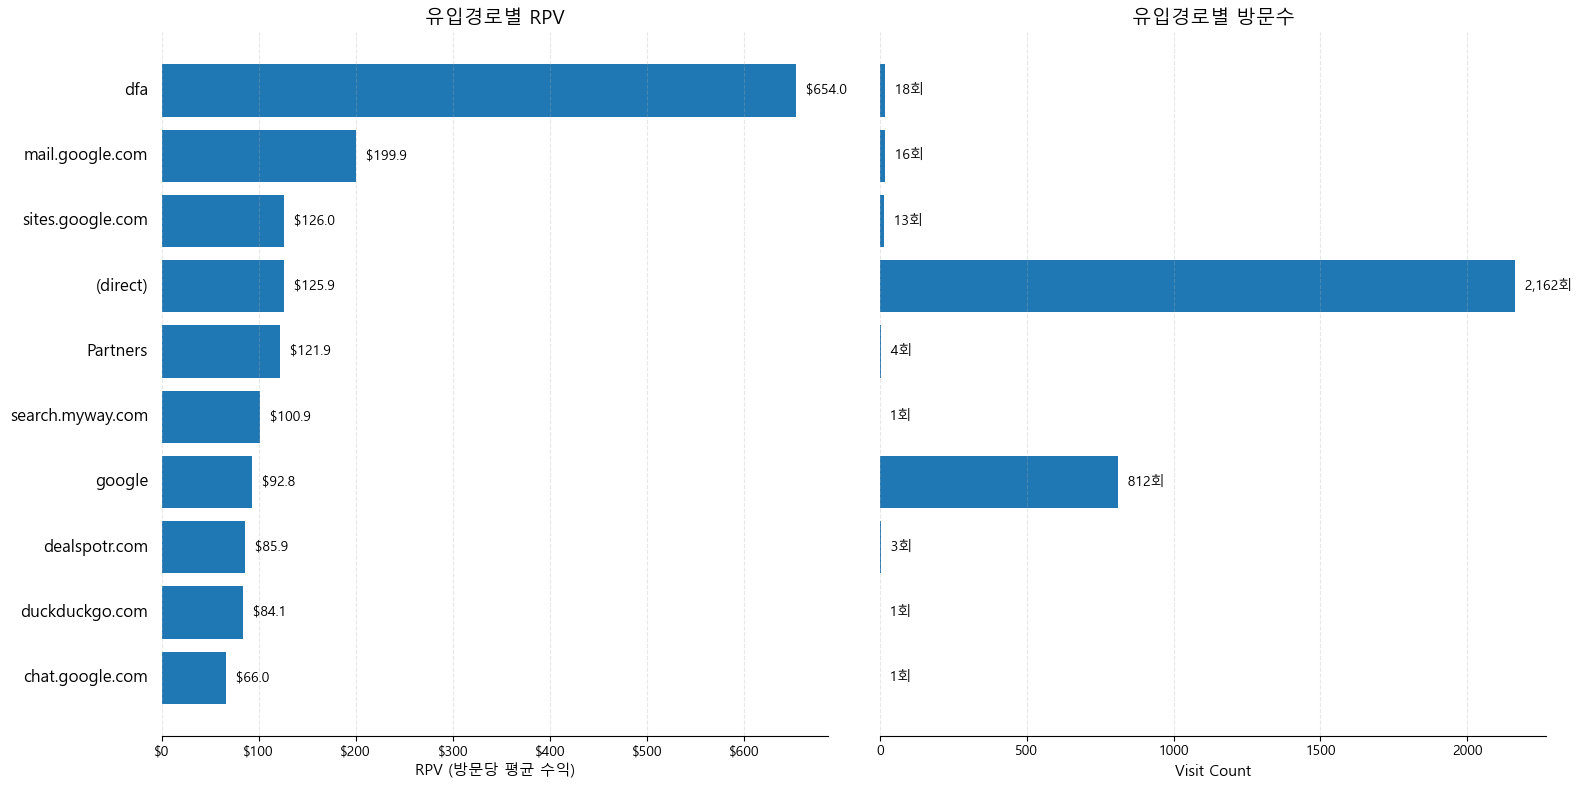

In [41]:
from matplotlib.ticker import FuncFormatter
from matplotlib import transforms
import textwrap

# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Ïª¨ÎüºÎ™Ö ÌÜµÏùº + ÏÉÅÏúÑ 10Í∞úÎßå
plot_df = (
    df_inflow_RPV.rename(columns={"trafficSource.source": "source"})
                 .sort_values("rpv", ascending=False)
                 .head(10)
                 .reset_index(drop=True)
)

# 2) Í∏¥ ÎùºÎ≤®ÏùÄ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï§ÑÎ∞îÍøà
def wrap_label(s, width=18):
    s = "(not set)" if s is None or s == "" else str(s)
    return "\n".join(textwrap.wrap(s, width=width)) if len(s) > width else s

sources_raw = plot_df["source"].tolist()
sources_lbl = [wrap_label(s) for s in sources_raw]
rpv     = plot_df["rpv"].to_numpy()
visits  = plot_df["visit_count"].to_numpy()
ypos    = np.arange(len(sources_lbl))

# 3) ÏôºÏ™Ω Ïó¨Î∞±ÏùÑ ÎÑâÎÑâÌûà Ï£ºÍ≥† ÏãúÏûë
fig, (ax_l, ax_r) = plt.subplots(
    1, 2, figsize=(16, 8), sharey=True, gridspec_kw={"width_ratios":[1, 1]}
)
plt.subplots_adjust(left=0.40, wspace=0.18)  # ‚Üê Ïó¨Î∞± ÌÅ¨Í≤å

# ‚îÄ‚îÄ Ï¢åÏ∏°: RPV ‚îÄ‚îÄ
ax_l.barh(ypos, rpv)
ax_l.invert_yaxis()
ax_l.set_xlabel("RPV (Î∞©Î¨∏Îãπ ÌèâÍ∑† ÏàòÏùµ)", fontsize=11)
ax_l.set_title("Ïú†ÏûÖÍ≤ΩÎ°úÎ≥Ñ RPV", fontsize=14)
ax_l.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f"${x:,.0f}"))
ax_l.set_yticks([])  # Ï∂ï ÎùºÎ≤®ÏùÄ ÏßÄÏö∞Í≥†‚Ä¶

# ‚Ä¶ÎåÄÏã† ÎßâÎåÄ ÏôºÏ™ΩÏóê ÏÜåÏä§Î™ÖÏùÑ ÏßÅÏ†ë Í∑∏Î¶ΩÎãàÎã§(Ï∂ï Ï¢åÌëúÎ•º ÏÑûÏñ¥ Ïç®ÏÑú Ìï≠ÏÉÅ Î≥¥Ïù¥Í≤å).
trans = transforms.blended_transform_factory(ax_l.transAxes, ax_l.transData)
for y, name, v in zip(ypos, sources_lbl, rpv):
    ax_l.text(-0.02, y, name, transform=trans, va="center", ha="right", fontsize=12)
    ax_l.text(v, y, f"  ${v:,.1f}", va="center", ha="left", fontsize=10)

# ‚îÄ‚îÄ Ïö∞Ï∏°: Î∞©Î¨∏Ïàò ‚îÄ‚îÄ
ax_r.barh(ypos, visits)
ax_r.set_title("Ïú†ÏûÖÍ≤ΩÎ°úÎ≥Ñ Î∞©Î¨∏Ïàò", fontsize=14)
ax_r.set_xlabel("Visit Count", fontsize=11)
ax_r.set_yticks([])  # Í≥µÏú† yÏ∂ïÏù¥ÎØÄÎ°ú Ïó¨Í∏∞ÏÑúÎèÑ Ï∂ï ÎùºÎ≤®ÏùÄ Ïà®ÍπÅÎãàÎã§.
for y, v in zip(ypos, visits):
    ax_r.text(v, y, f"  {v:,.0f}Ìöå", va="center", ha="left", fontsize=10)

# Î≥¥Ï°∞ Í≤©Ïûê/ÌÖåÎëêÎ¶¨ Ï†ïÎ¶¨
for ax in (ax_l, ax_r):
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    for sp in ("top","right","left"):
        ax.spines[sp].set_visible(False)

plt.tight_layout()
plt.show()

## 4.2. Ï∫†ÌéòÏù∏Î≥Ñ RPV

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Îß§Ï∂úÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ≥† ÎßàÏù¥ÌÅ¨Î°ú Îã®ÏúÑÎ•º ÌÜµÌôî Îã®ÏúÑÎ°ú Î≥¥Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_revenue"] = pd.to_numeric(kdf.get("totals.transactionRevenue"), errors="coerce").fillna(0) / 1_000_000

# Íµ¨Îß§Í∞Ä Î∞úÏÉùÌïú ÏÑ∏ÏÖòÎßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
df_txn = kdf[***].copy()

# Ï∫†ÌéòÏù∏ ÎùºÎ≤®ÏùÑ Ï†ïÎ¶¨ÌïòÏó¨ Í≤∞Ï∏°¬∑Í≥µÎ∞±ÏùÑ '(not set)'ÏúºÎ°ú ÌÜµÏùºÌïòÍ≤†ÏäµÎãàÎã§.
df_txn["_campaign"] = (
    df_txn.get("trafficSource.campaign")
          .astype(str).str.strip()
          .replace({"<NA>": "(not set)", "": "(not set)", "None": "(not set)"})
          .fillna("(not set)")
)

# Ï∫†ÌéòÏù∏Î≥ÑÎ°ú Î∞©Î¨∏ ÏàòÏôÄ Îß§Ï∂úÏùÑ ÏßëÍ≥ÑÌïòÍ≥† Î∞©Î¨∏Îãπ Îß§Ï∂ú(RPV)ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
agg_campaign = (
    df_txn.***("***", dropna=False) # Ï∫†ÌéòÏù∏Î≥ÑÎ°ú Î¨∂Ïñ¥Ï£ºÍ∏∞!
          .agg(visit_count=("fullVisitorId", "count"),
               total_revenue=("_revenue", "sum"))
          .assign(rpv=lambda d: d["total_revenue"] / d["visit_count"])
          .sort_values("rpv", ascending=False)
          .reset_index()
          .rename(columns={"_campaign": "campaign"})
)

# ÏÉÅÏúÑ 10Í∞úÎßå ÎØ∏Î¶¨ Î≥¥Í≤†ÏäµÎãàÎã§.
agg_campaign.head(10)

campaign  visit_count  total_revenue         rpv
0                    AW - Accessories           51        7027.73  137.798627
1                    Data Share Promo            4         487.71  121.927500
2                           (not set)         2983      357389.63  119.808793
3  AW - Dynamic Search Ads Whole Site           54        2875.18   53.244074

## 4.3. Î∞©Î¨∏ Îß§Ï≤¥

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Îß§Ï∂úÍ≥º Í±∞Îûò ÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ≥† Îã®ÏúÑÎ•º Î≥¥Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_revenue"]      = pd.to_numeric(kdf["totals.transactionRevenue"], errors="coerce").fillna(0) / 1_000_000
kdf["_transactions"] = pd.to_numeric(kdf["totals.transactions"],       errors="coerce").fillna(0).astype(int)

# Ïã§Ï†ú Í±∞ÎûòÍ∞Ä Î∞úÏÉùÌïú ÏÑ∏ÏÖòÎßå ÎåÄÏÉÅÏúºÎ°ú ÏÇºÍ≤†ÏäµÎãàÎã§.
df_txn = ***

# Ïú†ÏûÖ Îß§Ï≤¥ ÎùºÎ≤®ÏùÑ Ï†ïÎ¶¨ÌïòÏó¨ Í≤∞Ï∏°¬∑Í≥µÎ∞±ÏùÑ '(not set)'ÏúºÎ°ú ÌÜµÏùºÌïòÍ≤†ÏäµÎãàÎã§.
df_txn["_medium"] = (
    df_txn["trafficSource.medium"]
         .astype(str).str.strip()
         .replace({"<NA>": "(not set)", "": "(not set)", "None": "(not set)"})
         .fillna("(not set)")
)

# Îß§Ï≤¥Î≥Ñ Î∞©Î¨∏ ÏàòÏôÄ Îß§Ï∂úÏùÑ ÏßëÍ≥ÑÌïòÍ≥† Î∞©Î¨∏Îãπ Îß§Ï∂ú(RPV)ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
agg_medium = (
    df_txn.groupby("_medium", dropna=False)
          .agg(
              visit_count=("fullVisitorId", "count"),
              total_revenue=("_revenue", "sum")
          )
          .assign(rpv=lambda d: d["total_revenue"] / d["visit_count"])
          .sort_values("rpv", ascending=False)
          .reset_index()
          .rename(columns={"_medium": "medium"})
)

# ÏÉÅÏúÑ 10Í∞ú Í≤∞Í≥ºÎßå ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
agg_medium.head(10)

medium  visit_count  total_revenue         rpv
0        cpm           35       13112.33  374.638000
1     (none)         2162      272246.67  125.923529
2  affiliate            4         487.71  121.927500
3        cpc          106        9918.89   93.574434
4    organic          702       64748.26   92.233989
5   referral           83        7266.39   87.546867

## 4.4. RFM Î∂ÑÏÑù
: Í≥†Í∞ùÏùò Íµ¨Îß§ ÌñâÎèôÏùÑ Í∏∞Î∞òÏúºÎ°ú Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Í≥†Í∞ùÏùÑ ÏãùÎ≥ÑÌïòÍ≥† ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏµúÏ†ÅÌôîÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í∏∞Î≤ï.


RFM Î∂ÑÏÑùÏùò ÏÑ∏ Í∞ÄÏßÄ ÏöîÏÜå

* Recency (ÏµúÏã†ÏÑ±): ÌòÑÏû¨ÎÇ†ÏßúÏôÄ Í≥†Í∞ùÏù¥ ÎßàÏßÄÎßâÏúºÎ°ú Íµ¨Îß§Ìïú ÎÇ†ÏßúÏùò Ï∞®Ïù¥
* Frequency (ÎπàÎèÑ): Í≥†Í∞ùÏù¥ ÌäπÏ†ï Í∏∞Í∞Ñ ÎèôÏïà Î™á Î≤à Íµ¨Îß§ÌñàÎäîÏßÄ (Íµ¨Îß§ ÌöüÏàò)
* Monetary (Í∏àÏï°): Í≥†Í∞ùÏù¥ ÌäπÏ†ï Í∏∞Í∞Ñ ÎèôÏïà Ï¥ù ÏñºÎßàÎ•º ÏÜåÎπÑÌñàÎäîÏßÄ (Íµ¨Îß§ Í∏àÏï°)

### (1) R, F, M Î≥ÄÏàò ÏÉùÏÑ±

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Í∏∞Ï§ÄÏùºÏùÑ Ï†ïÌïòÍ≥†(Î¶¨ÏÑºÏãú Í≥ÑÏÇ∞Ïùò Í∏∞Ï§ÄÏ†ê), Í∏àÏï°/Í±∞Îûò ÏàòÎ•º Ïà´ÏûêÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
REF_DATE = pd.to_datetime("2017-08-02")
kdf["_revenue"]      = pd.to_numeric(kdf["totals.transactionRevenue"], errors="coerce").fillna(0) / 1_000_000
kdf["_transactions"] = pd.to_numeric(kdf["totals.transactions"],       errors="coerce").fillna(0).astype(int)

# Ïã§Ï†úÎ°ú Í±∞ÎûòÍ∞Ä ÏûàÎäî ÏÑ∏ÏÖòÎßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
tx = kdf.loc[kdf["_transactions"] > 0].copy()

# ÎÇ†ÏßúÎ•º YYYYMMDDÏóêÏÑú datetimeÏúºÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§.
tx["_date"] = pd.to_datetime(tx["date"].astype(str), format="%Y%m%d", errors="coerce")

# ÏÇ¨Ïö©Ïûê Í∏∞Ï§ÄÏúºÎ°ú ÎßàÏßÄÎßâ Íµ¨Îß§Ïùº, Íµ¨Îß§ ÎπàÎèÑ, Ï¥ù Îß§Ï∂úÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
rfm = (
    tx.groupby("fullVisitorId", as_index=False)
      .agg(last_visit=("***", "max"),
           frequency =("fullVisitorId", "***"),
           monetary  =("***", "***"))
)

# Í∏∞Ï§ÄÏùºÍ≥º ÎßàÏßÄÎßâ Íµ¨Îß§ÏùºÏùò Ï∞®Ïù¥Î°ú Î¶¨ÏÑºÏãú(ÏùºÏàò)Î•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
rfm["recency"] = (REF_DATE - rfm["last_visit"]).dt.days

# ÌïÑÏöîÌïú Ïó¥Îßå Ï†ïÎ¶¨Ìï¥ Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§.
df_rfm = rfm[["fullVisitorId", "recency", "frequency", "monetary"]]
df_rfm.head()

fullVisitorId  recency  frequency  monetary
0  0024932550342595467       11          1    126.89
1  0143782636543876435       11          1     75.98
2  0396718069117936487       11          1     23.94
3   057693500927581077       11          1    558.50
4   081281456829886913       11          1     78.71

### (2) R, F, M Ï†êÏàò ÏÑ§Ï†ï

In [45]:
# RFM Ï†êÏàòÎ•º Í∞ÑÎã®Ìûà Îß§Í≤® Î≥¥Í≤†ÏäµÎãàÎã§.

# 1) Îì±Í∏â ÎùºÎ≤®ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§. (RÏùÄ ÏµúÍ∑ºÏùºÏàò ÏûëÏùÑÏàòÎ°ù ÎÜíÍ≤å, MÏùÄ Í∏àÏï° ÌÅ¥ÏàòÎ°ù ÎÜíÍ≤å)
R_LABELS = [5, 4, 3, 2, 1]
M_LABELS = [1, 2, 3, 4, 5]
N_QUANT  = 5  # 5Î∂ÑÏúÑ Í∏∞Î≥∏

def safe_qcut(s, q, labels):
    """
    ÏãúÎ¶¨Ï¶àÎ•º Î∂ÑÏúÑÏàòÎ°ú ÎÇòÎàÑÏñ¥ ÎùºÎ≤®ÏùÑ Î∂ÄÏó¨ÌïòÍ≤†ÏäµÎãàÎã§.
    - Ïú†ÎãàÌÅ¨ Í∞íÏù¥ Ï†ÅÏúºÎ©¥ Î∂ÑÏúÑÏàò Í∞úÏàòÎ•º ÏûêÎèôÏúºÎ°ú Ï§ÑÏù¥Í≤†ÏäµÎãàÎã§.
    - Í≤ΩÍ≥ÑÍ∞Ä Í≤πÏπòÎ©¥(drop) Í∞ÄÎä•Ìïú Íµ¨Í∞ÑÎßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
    - Î™®Îì† Í∞íÏù¥ Í∞ôÏïÑ 1Íµ¨Í∞ÑÎßå Í∞ÄÎä•ÌïòÎ©¥ Ï§ëÏïô ÎùºÎ≤®Î°ú Ï±ÑÏö∞Í≤†ÏäµÎãàÎã§.
    """
    s = pd.to_numeric(s, errors="coerce")
    k = s.dropna().nunique()
    q_eff = min(q, max(1, k), len(labels))
    if q_eff <= 1:
        return pd.Series([labels[(len(labels)-1)//2]] * len(s), index=s.index)
    return pd.qcut(s, q_eff, labels=labels[:q_eff], duplicates="drop")

# 2) Í≤∞Ï∏°¬∑Î¨¥ÌïúÎåÄÎ•º NaNÏúºÎ°ú ÌÜµÏùºÌïòÍ≤†ÏäµÎãàÎã§.
rfm_src = df_rfm.replace([np.inf, -np.inf], np.nan).copy()

# 3) R/M Ï†êÏàòÎ•º Íµ¨Í∞ÑÌôîÌïòÍ≤†ÏäµÎãàÎã§. (recencyÎäî ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùÄ Îì±Í∏âÏùÑ Î∂ÄÏó¨Ìï©ÎãàÎã§)
rfm_src["R_score"] = safe_qcut(rfm_src["recency"],  N_QUANT, R_LABELS)
rfm_src["M_score"] = safe_qcut(rfm_src["monetary"], N_QUANT, M_LABELS)

# 4) F Ï†êÏàòÎäî Í∑úÏπô Í∏∞Î∞òÏúºÎ°ú Í∞ÑÎã®Ìûà Îß§Í∏∞Í≤†ÏäµÎãàÎã§. (2Ìöå Ïù¥ÏÉÅ=2, Í∑∏ Ïô∏=1)
rfm_src["F_score"] = (rfm_src["frequency"].fillna(0) >= 2).astype(int) + 1

# 5) ÏµúÏÜåÌïú R/M Îì±Í∏âÏù¥ ÏûàÎäî ÌñâÎßå ÎÇ®Í∏∞Í≥† Í≤∞Í≥º Ïª¨ÎüºÎßå Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
rfm_df = (
    rfm_src.dropna(subset=["R_score", "M_score"])
           .loc[:, ["fullVisitorId", "recency", "frequency", "monetary",
                    "R_score", "F_score", "M_score"]]
           .reset_index(drop=True)
)

# Í≤∞Í≥º ÌôïÏù∏
rfm_df.head()

fullVisitorId  recency  frequency  monetary R_score  F_score M_score
0  0024932550342595467       11          1    126.89       5        1       5
1  0143782636543876435       11          1     75.98       5        1       4
2  0396718069117936487       11          1     23.94       5        1       2
3   057693500927581077       11          1    558.50       5        1       5
4   081281456829886913       11          1     78.71       5        1       4

### (3) Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî

In [46]:
def classify_customer_segment(row):
    # Í∞Å Ìñâ(row)Ïùò R/F/M Ï†êÏàòÎ•º Ï†ïÏàòÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©
    R, F, M = int(row["R_score"]), int(row["F_score"]), int(row["M_score"])

    # ÏÑ∏Í∑∏Î®ºÌä∏ Í∑úÏπô 1: ÏµúÍ∑º Î∞©Î¨∏Ïù¥ Îß§Ïö∞ Í∞ÄÍπùÍ≥†(R=5), Ïû¨Î∞©Î¨∏ ÎπàÎèÑ ÎÜíÏúºÎ©∞(F‚â•2), Í∏àÏï°ÎèÑ ÌÅº(M=5)
    # ‚Üí ÌïµÏã¨ Ïö∞Ïàò Í≥†Í∞ù
    if (R == 5) and (F >= 2) and (M == 5):
        return "Champions"

    # ÏÑ∏Í∑∏Î®ºÌä∏ Í∑úÏπô 2: ÏµúÍ∑ºÏÑ±/ÎπàÎèÑ/Í∏àÏï°Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÜíÏùÄ Í≥†Í∞ù
    # (R‚â•3, F‚â•1, M‚â•4) ‚Üí Ï∂©ÏÑ± Í≥†Í∞ù
    elif (R >= 3) and (F >= 1) and (M >= 4):
        return "Loyal Customers"

    # ÏÑ∏Í∑∏Î®ºÌä∏ Í∑úÏπô 3: Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÌôúÎèôÏùÄ ÏûàÏúºÎÇò(ÏµúÏÜå Ï°∞Í±¥ Ï∂©Ï°±), Ïù¥ÌÉà ÏúÑÌóò Íµ¨Í∞Ñ
    # (R‚â•2, F‚â•1, M‚â•1) ‚Üí ÏúÑÌóò Í≥†Í∞ù
    elif (R >= 2) and (F >= 1) and (M >= 1):
        return "At Risk"

    # ÏÑ∏Í∑∏Î®ºÌä∏ Í∑úÏπô 4: ÏµúÍ∑ºÏÑ±Ïù¥ Îß§Ïö∞ ÎÇÆÏùÄ(R=1) Í≥†Í∞ù(Í≥ºÍ±∞ ÌôúÎèôÏùÄ ÏûàÏóàÏùå)
    # ‚Üí Ïù¥ÌÉà Í≥†Í∞ù
    elif (R == 1) and (F >= 1) and (M >= 1):
        return "Lost"

    # ÏúÑ Ï°∞Í±¥Ïóê Î™®Îëê Ìï¥ÎãπÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞ Í∏∞Î≥∏ ÎùºÎ≤®
    return "Other"  # Í∏∞Î≥∏ ÎùºÎ≤® Ï∂îÍ∞Ä

# Ìñâ Îã®ÏúÑÎ°ú Î∂ÑÎ•ò Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï¥ ÏÑ∏Í∑∏Î®ºÌä∏ Ïª¨Îüº ÏÉùÏÑ±
rfm_df["Segment"] = rfm_df.apply(classify_customer_segment, axis=1)
rfm_df

fullVisitorId  recency  frequency  monetary R_score  F_score  \
0     0024932550342595467       11          1    126.89       5        1   
1     0143782636543876435       11          1     75.98       5        1   
2     0396718069117936487       11          1     23.94       5        1   
3      057693500927581077       11          1    558.50       5        1   
4      081281456829886913       11          1     78.71       5        1   
...                   ...      ...        ...       ...     ...      ...   
2787  9973195165804180005       70          1     23.76       2        1   
2788  9973665079624172058        9          1     78.95       5        1   
2789  9974351919673138742       16          1     53.60       5        1   
2790  9982700667464896535       82          1     33.59       1        1   
2791    99879093370825436       37          1     35.00       4        1   

     M_score          Segment  
0          5  Loyal Customers  
1          4  Loyal Customers  
2          2          At Risk  
3          5  Loyal Customers  
4          4  Loyal Customers  
...      ...              ...  
2787       2          At Risk  
2788       4  Loyal Customers  
2789       3          At Risk  
2790       2             Lost  
2791       3          At Risk  

[2792 rows x 8 columns]

In [47]:
# Í∞Å ÏÑ∏Í∑∏Î®ºÌä∏Ïùò ÎπÑÏú®(ÎπàÎèÑ ÎπÑÏú®) Í≥ÑÏÇ∞
# normalize=True ‚áí Ï†àÎåÄÍ∞úÏàò ÎåÄÏã† Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπÑÏú®(0~1)Î°ú Î∞òÌôò
# ÌçºÏÑºÌä∏(%)Î°ú Î≥¥Í∏∞ + ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
(rfm_df["Segment"].value_counts(normalize=True)
        .sort_values(ascending=False)
        .mul(100).round(2))

Segment
At Risk            55.41
Loyal Customers    22.78
Lost               19.91
Champions           1.90
Name: proportion, dtype: float64

(4) Í∞Å ÏÑ∏Í∑∏Î®ºÌä∏ Î≥Ñ ARPU, RPR, LTV Î∂ÑÏÑù

* ÏÇ¨Ïö©ÏûêÎãπ ÌèâÍ∑† ÏàòÏùµ (ARPU, Average Revenue Per User) = Ï¥ù Îß§Ï∂úÏï° / Ï¥ù Í≥†Í∞ù Ïàò
* Ïû¨Íµ¨Îß§Ïú® (RPR, Repeat Purchase Rate) = Îëê Î≤à Ïù¥ÏÉÅ Íµ¨Îß§Ìïú Í≥†Í∞ù Ïàò / Ï†ÑÏ≤¥ Íµ¨Îß§ Í≥†Í∞ù Ïàò
* Í≥†Í∞ù ÏÉùÏï† Í∞ÄÏπò (LTV, Customer Lifetime Value) = ARPU * Í≥†Í∞ù ÌèâÍ∑† ÏÉùÏï† Í∏∞Í∞Ñ (Í≥†Í∞ùÏù¥ ÌèâÏÉù Ï∞ΩÏ∂úÌï† Ïàò ÏûàÎäî Ï¥ù Í∞ÄÏπòÎ•º Ï∂îÏ†ï)

In [48]:
# ÏõêÎ≥∏ Î≥¥Ï°¥ÏùÑ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
kdf = df.copy()

# Í±∞ÎûòÏàòÎ•º ÏïàÏ†ÑÌïòÍ≤å Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥† Í≤∞Ï∏°ÏùÄ 0ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
kdf["_transactions"] = pd.to_numeric(kdf["totals.transactions"], errors="coerce").fillna(0).astype(int)

# Ïã§Ï†ú Í±∞ÎûòÍ∞Ä ÏûàÎäî ÏÑ∏ÏÖòÎßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
txn = kdf[kdf["_transactions"] > 0].copy()

# ÎÇ†ÏßúÎ•º YYYYMMDDÏóêÏÑú datetimeÏúºÎ°ú ÌååÏã±ÌïòÍ≥† Í≤∞Ï∏°ÏùÄ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
txn["_date"] = pd.to_datetime(txn["date"].astype(str), format="%Y%m%d", errors="coerce")
txn = txn.dropna(subset=["_date"])

# Í≥†Í∞ùÎ≥Ñ ÏµúÏ¥à/ÏµúÏ¢Ö Íµ¨Îß§ÏùºÏùÑ ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
g = txn.groupby("fullVisitorId")["_date"].agg(first_date="min", last_date="max").reset_index()

# ÏµúÏ¥à~ÏµúÏ¢Ö ÏÇ¨Ïù¥Ïùò ‚ÄòÌè¨Ìï® Í∏∞Í∞Ñ‚Äô ÏùºÏàòÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
g["date_diff"] = (g["last_date"] - g["first_date"]).dt.days + 1

# Í≤∞Í≥ºÎ•º Í∞ÑÎã®Ìûà ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
print(g.head())
print("Í≥†Í∞ù Ïàò:", len(g))

         fullVisitorId first_date  last_date  date_diff
0  0024932550342595467 2017-07-22 2017-07-22          1
1  0143782636543876435 2017-07-22 2017-07-22          1
2  0396718069117936487 2017-07-22 2017-07-22          1
3   057693500927581077 2017-07-22 2017-07-22          1
4   081281456829886913 2017-07-22 2017-07-22          1
Í≥†Í∞ù Ïàò: 2792


In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Î≥µÏÇ¨ÌïòÍ≤†ÏäµÎãàÎã§.
need_cols = ["fullVisitorId", "Segment", "F_score", "monetary"]
rfm = rfm_df[need_cols].copy()

# F_scoreÍ∞Ä Ïà´ÏûêÍ∞Ä ÏïÑÎãê Ïàò ÏûàÏúºÎØÄÎ°ú ÏïàÏ†ÑÌïòÍ≤å Ï†ïÏàòÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
rfm["F_score"] = pd.to_numeric(rfm["F_score"], errors="coerce").fillna(0).astype(int)

# 1) Ïû¨Íµ¨Îß§ Í≥†Í∞ù ÏàòÎ•º ÏÑ∏Í∑∏Î®ºÌä∏Î≥ÑÎ°ú ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
re_counts = (
    rfm.loc[rfm["F_score"] > 1]
       .groupby("Segment", dropna=False)["fullVisitorId"]
       .nunique()
       .rename("count_over_twice")
       .reset_index()
)

# 2) ÏÑ∏Í∑∏Î®ºÌä∏ ÏöîÏïΩÏùÑ ÏúÑÌï¥ ÎÇ†Ïßú Ï∞®Ïù¥Î•º Í≥†Í∞ù ÌÖåÏù¥Î∏îÏóê Í≤∞Ìï©ÌïòÍ≤†ÏäµÎãàÎã§.
datediff = g[["fullVisitorId", "date_diff"]].copy()
base = (
    rfm.merge(datediff, on="fullVisitorId", how="left")
       .assign(
           monetary=lambda d: pd.to_numeric(d["monetary"], errors="coerce").fillna(0.0),
           date_diff=lambda d: pd.to_numeric(d["date_diff"], errors="coerce")  # NaNÏùÄ Í∑∏ÎåÄÎ°ú ÎëêÍ≤†ÏäµÎãàÎã§.
       )
)

# 3) ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Ï¥ùÎß§Ï∂ú¬∑Í≥†Í∞ùÏàò¬∑ÌèâÍ∑† ÏÉùÏï†Í∏∞Í∞ÑÏùÑ ÏßëÍ≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
seg_summary = (
    base.groupby("Segment", dropna=False)
        .agg(
            total_monetary=("monetary", "sum"),
            n_users=("***", "***"),
            avg_lifetime=("***", "***")
        )
        .reset_index()
)

# 4) ARPUÏôÄ Ïû¨Íµ¨Îß§Ïú®(RPR)ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
seg_summary["ARPU"] = seg_summary["total_monetary"] / seg_summary["n_users"]
seg_summary = seg_summary.merge(re_counts, on="Segment", how="left")
seg_summary["count_over_twice"] = seg_summary["count_over_twice"].fillna(0).astype(int)
seg_summary["RPR"] = seg_summary["count_over_twice"] / seg_summary["n_users"]

# 5) Í∞ÑÏù¥ LTV(Ïùº Îã®ÏúÑ)Î•º Í≥ÑÏÇ∞ÌïòÍ≥† Í≤∞Í≥º ÌÖåÏù¥Î∏îÏùÑ Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
seg_summary["LTV"] = seg_summary["ARPU"] * seg_summary["avg_lifetime"]
df_segment = seg_summary[["Segment", "ARPU", "RPR", "LTV"]].sort_values("LTV", ascending=False)

# 6) Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.
df_segment

Segment        ARPU       RPR           LTV
1        Champions  939.550755  1.000000  31501.541342
3  Loyal Customers  276.259937  0.154088   1214.066862
2             Lost   99.965522  0.026978    110.393580
0          At Risk   56.045191  0.038785     86.295827

**Ïù∏ÏÇ¨Ïù¥Ìä∏:**

1. ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Í≥†Í∞ù Î∂ÑÌè¨
* At Risk Í∑∏Î£πÏù¥ Í∞ÄÏû• ÌÅ∞ ÎπÑÏ§ë(55.41%)ÏùÑ Ï∞®ÏßÄÌïòÍ≥† ÏûàÎã§.
* Ïù¥Îì§ÏùÑ Ïñ¥ÎñªÍ≤å Ïû¨ÌôúÏÑ±ÌôîÌïòÍ≥† Ïú†ÏßÄÌï†ÏßÄÏóê ÎåÄÌïú Ï†ÑÎûµ ÌïÑÏöî
* Loyal Customers(22.4%), Lost(19.7%), Champions(1.4%) ÏàúÏúºÎ°ú Î∂ÑÌè¨
* Lost Í∑∏Î£πÏùò Ïù¥ÌÉà Ïù¥Ïú†Î•º ÌååÏïÖÌï¥ÏïºÌï®.
    * Ìï¥Îãπ ÏûëÏóÖÏùÄ ÌçºÎÑê Î∂ÑÏÑù(Funnel Analysis)ÏúºÎ°ú Î≥¥Îã§ ÏûêÏÑ∏Ìûà ÌååÏïÖ Í∞ÄÎä•

2. ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌäπÏßï
    1. Champions
    * ÎÜíÏùÄ Íµ¨Îß§ÎπàÎèÑ, Ïû¨Íµ¨Îß§Ïú®, Íµ¨Îß§Í∏àÏï°ÏùÑ Î≥¥Ïú†Ìïú ÌïµÏã¨ Í≥†Í∞ù Í∑∏Î£π 
    * ~~~

    2. Loyal Customers
    * Ï§ëÍ∞Ñ Ïù¥ÏÉÅÏùò Íµ¨Îß§ÎπàÎèÑ, Ïû¨Íµ¨Îß§Ïú®, Íµ¨Îß§Í∏àÏï°ÏùÑ Ïú†ÏßÄ
    * ~~~
    
    3. At Risk
    * Í∞ÄÏû• ÌÅ∞ ÎπÑÏ§ëÏù¥ÏßÄÎßå Îß§Ï∂ú Í∏∞Ïó¨ÎèÑÎäî ÎÇÆÏùÄ Ìé∏
    * ~~~
    * ~~~

    4. Lost
    * Ïù¥ÎØ∏ Ïù¥ÌÉàÌñàÏßÄÎßå At Risk Í∑∏Î£πÎ≥¥Îã§ ÎÜíÏùÄ ÏßÄÌëúÎì§ÏùÑ Î≥¥Ïú†ÌïòÍ≥† ÏûàÏñ¥, Î≥µÍ∑Ä Ïãú ÏÉÅÎãπÌïú ÏàòÏùµÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÏùå.
    * ~~~

3. Í≤∞Î°†
~~~

# 5. Referral (Ï∂îÏ≤ú)
: Í∏∞Ï°¥ Í≥†Í∞ùÏù¥ Îã§Î•∏ ÏÇ¨ÎûåÏóêÍ≤å Ï†úÌíàÏù¥ÎÇò ÏÑúÎπÑÏä§Î•º Ï∂îÏ≤úÌïòÎäîÏßÄ, Ï¶â ÏûêÏó∞Ïä§Îü¨Ïö¥ ÏûÖÏÜåÎ¨∏ Ìö®Í≥ºÎ•º Î∂ÑÏÑùÌï¥Î¥ÖÏãúÎã§.

**ÏÇ¨Ïö©ÏûêÎì§Ïù¥ Ïö∞Î¶¨ ÏÑúÎπÑÏä§Î•º Ï£ºÎ≥Ä ÏßÄÏù∏ÏóêÍ≤å ÏÜåÍ∞ú/ Ï∂îÏ≤úÌïòÎäîÍ∞Ä?**

Ï¶â, ÏÑúÎπÑÏä§Î•º Ïù¥Ïö©Ìïú Í≥†Í∞ùÏù¥ ÎßåÏ°±ÌïòÏó¨ ÏûêÎ∞úÏ†Å Î∞îÏù¥Îü¥ Î∞è Í≥µÏú†Î•º ÏùºÏúºÌÇ§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.

Ìï¥Îãπ Îã®Í≥ÑÎäî Ï∂©ÏÑ±ÎèÑÍ∞Ä ÎÜíÏùÄ Í≥†Í∞ùÎì§Îßå Ï∂îÏ≤úÌñâÎèôÏùÑ ÌïòÍ∏∞Ïóê ÌçºÎÑê ÎÇ¥ Í∞ÄÏû• Ï¢ÅÏùÄ ÏúÑÏπòÎã§.

**Ïù¥Î≤à Îã®Í≥ÑÏóêÏÑú ÏàòÌñâÌï† Î∂ÑÏÑù**

* GAÎäî Ï∂îÏ≤ú Î∞úÏÜ° Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥Î≤à Î∂ÑÏÑùÏóêÏÑúÎäî Ï∂îÏ≤úÏúºÎ°ú Ïú†ÏûÖÎêú 'Ï∂îÏ≤ú Ïú†ÏûÖ Ïú†Ï†Ä' Í∑∏Î£πÍ≥º Ï∂îÏ≤úÏúºÎ°ú Ïú†ÏûÖÎêòÏßÄ ÏïäÏùÄ 'ÏùºÎ∞ò Ïú†ÏûÖ Ïú†Ï†Ä' Í∑∏Î£π Í∞ÑÏóê Ï∞®Ïù¥Î•º Î∂ÑÏÑùÌï¥Î≥ºÍ≤åÏöî.
* Ï∂îÏ≤ú / ÏùºÎ∞ò Ïú†ÏûÖ Í≥†Í∞ù Í∑∏Î£π Í∞ÅÍ∞Å ÌçºÎÑêÏùò Ï†ÑÌôòÏú®, Ïù¥ÌÉàÏú® ÎπÑÍµê Î∂ÑÏÑù Ìï¥ z-Í≤ÄÏ†ï ÏàòÌñâ

## 5.1. Ï∂îÏ≤ú / ÏùºÎ∞ò Ïú†ÏûÖ Í≥†Í∞ùÎ≥Ñ ÏàòÏùµ ÎπÑÍµê Î∂ÑÏÑù

### (1) Ï∂îÏ≤ú Ïú†ÏûÖ Ïú†Ï†Ä

In [ ]:
# ÏõêÎ≥∏ÏùÑ Î≥¥Ï°¥ÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
k = df.copy()

# ÌïÑÏöîÌïú Ïó¥ÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú ÏïàÏ†Ñ Î≥ÄÌôòÌïòÍ≥† Î≥¥Ï°∞ Ïó¥ÏùÑ Ï§ÄÎπÑÌïòÍ≤†ÏäµÎãàÎã§.
k["_medium"]     = k["trafficSource.medium"]                                   # ÌïÑÌÑ∞ Ìé∏ÏùòÎ•º ÏúÑÌï¥ ÎØ∏ÎîîÏóÑÏùÑ Î≥¥Ï°∞ Ïó¥Î°ú Î≥µÏÇ¨ÌïòÍ≤†ÏäµÎãàÎã§.
k["_pageviews"]  = pd.to_numeric(k["totals.pageviews"], errors="coerce").fillna(0)        # ÌéòÏù¥ÏßÄÎ∑∞Î•º Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
k["_timeOnSite"] = pd.to_numeric(k["totals.timeOnSite"], errors="coerce").fillna(0)       # Ï≤¥Î•òÏãúÍ∞ÑÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
k["_revenue_u"]  = pd.to_numeric(k["totals.transactionRevenue"], errors="coerce").fillna(0)  # Îß§Ï∂ú ÎßàÏù¥ÌÅ¨Î°ú Îã®ÏúÑÎ•º Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.

# referral ÎØ∏ÎîîÏóÑÏù¥Î©¥ÏÑú Îß§Ï∂úÏù¥ Î∞úÏÉùÌïú ÏÑ∏ÏÖòÎßå ÏÑ†ÌÉùÌïòÍ≤†ÏäµÎãàÎã§.
ref = k[(***) & (***)].copy()

# ÌëúÎ≥∏ ÏàòÎ•º ÏÇ∞Ï∂úÌïòÍ≤†ÏäµÎãàÎã§.
n = len(ref)

# ÏöîÏ≤≠ ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
total_sessions   = n                                                                 # Ï¥ù ÏÑ∏ÏÖò ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
avg_session_dur  = ref["_timeOnSite"].mean() if n else np.nan                        # ÌèâÍ∑† Ï≤¥Î•òÏãúÍ∞Ñ(Ï¥à)ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
avg_pageviews    = ref["_pageviews"].mean() if n else np.nan                         # ÌèâÍ∑† ÌéòÏù¥ÏßÄÎ∑∞Î•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
total_revenue    = (ref["_revenue_u"].sum() / 1_000_000) if n else 0.0               # Ï¥ù Îß§Ï∂úÏùÑ ÌÜµÌôî Îã®ÏúÑÎ°ú ÌôòÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
rpv              = (total_revenue / n) if n else np.nan                              # Î∞©Î¨∏Îãπ Îß§Ï∂úÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.

# Ìïú Ìñâ ÏöîÏïΩ ÌÖåÏù¥Î∏îÎ°ú Ï†ïÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
df_referral_traffic = pd.DataFrame([{
    "total_sessions": total_sessions,
    "avg_session_duration": avg_session_dur,
    "avg_pageviews": avg_pageviews,
    "total_revenue": total_revenue,
    "rpv": rpv,
}])

df_referral_traffic

total_sessions  avg_session_duration  avg_pageviews  total_revenue  \
0              83            785.506024      20.277108        7266.39   

         rpv  
0  87.546867

### (2) ÏùºÎ∞ò Ïú†ÏûÖ Ïú†Ï†Ä

In [ ]:
# ÏõêÎ≥∏ Î≥ÄÍ≤ΩÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ Î≥µÏÇ¨Î≥∏ÏóêÏÑú ÏûëÏóÖÌïòÍ≤†ÏäµÎãàÎã§.
k = df.copy()

# ÌïÑÏöîÌïú Ïó¥ÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú ÏïàÏ†Ñ Î≥ÄÌôòÌïòÍ≥† Î≥¥Ï°∞ Ïó¥ÏùÑ Ï§ÄÎπÑÌïòÍ≤†ÏäµÎãàÎã§.
k["_medium"]     = k["trafficSource.medium"]
k["_pageviews"]  = pd.to_numeric(k["totals.pageviews"], errors="coerce").fillna(0)
k["_timeOnSite"] = pd.to_numeric(k["totals.timeOnSite"], errors="coerce").fillna(0)
k["_revenue_u"]  = pd.to_numeric(k["totals.transactionRevenue"], errors="coerce").fillna(0)  # ÎßàÏù¥ÌÅ¨Î°ú Îã®ÏúÑÎ°ú Í∞ÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§.

# referralÏù¥ ÏïÑÎãå Ìä∏ÎûòÌîΩ Ï§ë Îß§Ï∂úÏù¥ Î∞úÏÉùÌïú ÏÑ∏ÏÖòÎßå ÏÑ†Î≥ÑÌïòÍ≤†ÏäµÎãàÎã§.
not_ref = k[(k["_medium"] != "referral") & (k["_revenue_u"] > 0)].copy()

# ÌëúÎ≥∏ ÏàòÏóê Îî∞Îùº ÏöîÏïΩ ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
n = len(not_ref)
avg_dur = (***)
avg_pv  = (***)
tot_rev = (***) if n else 0.0  # ÌÜµÌôî Îã®ÏúÑÎ°ú ÌôòÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
rpv     = (***) if n else float("nan")

# Ìïú Ìñâ ÏöîÏïΩ ÌÖåÏù¥Î∏îÎ°ú Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§.
df_not_referral_traffic = pd.DataFrame([{
    "total_sessions": n,
    "avg_session_duration": avg_dur,
    "avg_pageviews": avg_pv,
    "total_revenue": tot_rev,
    "rpv": rpv,
}])

df_not_referral_traffic

total_sessions  avg_session_duration  avg_pageviews  total_revenue  \
0            3009           1022.979395      24.109671      360513.86   

          rpv  
0  119.811851

## 5.2. Ï∂îÏ≤ú/ÏùºÎ∞ò Í∑∏Î£πÎ≥Ñ ÌçºÎÑê Î∂ÑÏÑù

### (1) Ï∂îÏ≤ú Ïú†ÏûÖ Ïú†Ï†Ä

In [ ]:
# ÏΩîÎìú ‚Üî ÎùºÎ≤® Îß§ÌïëÏùÑ Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
ACTION_LABELS = {
    "1": "Product list",
    "2": "Product detail page",
    "3": "Add to cart",
    "5": "Check out",
    "6": "Completed purchase",
}
ACTION_CODES = ["1", "2", "3", "5", "6"]  # Ï∂úÎ†• ÏàúÏÑúÎ•º Í≥†Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.

def extract_funnels(df: pd.DataFrame, medium_filter: str | None = None) -> pd.DataFrame:
    """Ïï°ÏÖò Ïπ¥Ïö¥Ìä∏Î•º ÏßëÍ≥ÑÌï¥ Îã®Í≥ÑÎ≥Ñ Ìï©Í≥ÑÎ•º Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§."""
    # ÎØ∏ÎîîÏóÑ ÌïÑÌÑ∞Î•º Ï†ÅÏö©ÌïòÍ≤†ÏäµÎãàÎã§.
    if medium_filter == "referral":
        sub = df[df["trafficSource.medium"] == "referral"]
    elif medium_filter == "not_referral":
        sub = df[df["trafficSource.medium"] != "referral"]
    else:
        sub = df

    # Ïï°ÏÖò ÏΩîÎìú ‚Üí Ïª¨ÎüºÎ™Ö Îß§ÌïëÏùÑ Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
    col_map = {
        "1": "action_type_count_1",
        "2": "action_type_count_2",
        "3": "action_type_count_3",
        "5": "action_type_count_5",
        "6": "action_type_count_6",
    }

    # Í∞Å Ïï°ÏÖòÎ≥Ñ Ìï©Í≥ÑÎ•º ÏïàÏ†ÑÌïòÍ≤å Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
    # ¬∑ Ïª¨ÎüºÏù¥ ÏóÜÍ±∞ÎÇò ÎπÑÏàòÏπòÍ∞Ä ÏÑûÏó¨ÎèÑ 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.
    counts = {}
    for code, col in col_map.items():
        if col in sub.columns:
            s = pd.to_numeric(sub[col], errors="coerce").fillna(0)
            counts[code] = int(s.sum())
        else:
            counts[code] = 0

    # ÌëúÎ°ú Ï†ïÎ¶¨ÌïòÍ≥† ÎùºÎ≤®ÏùÑ Îß§ÌïëÌïú Îí§, count ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ≤†ÏäµÎãàÎã§.
    out = (
        pd.DataFrame({"action_code": ACTION_CODES})
          .assign(count=lambda d: d["action_code"].map(counts).fillna(0).astype(int))
          .assign(action=lambda d: d["action_code"].map(ACTION_LABELS))
          .sort_values("count", ascending=False)
          .loc[:, ["action", "count"]]
          .reset_index(drop=True)
    )
    return out

In [ ]:
# ---------- Ïã§Ìñâ ----------
# medium == 'referral' Ïù∏ ÏÑ∏ÏÖòÎßå ÎåÄÏÉÅÏúºÎ°ú Ïï°ÏÖòÎ≥Ñ Ìï©Í≥ÑÎ•º ÏßëÍ≥ÑÌï¥ ÌçºÎÑê ÌÖåÏù¥Î∏î ÏÉùÏÑ±
df_ref_funnels = extract_funnels(kdf, medium_filter="referral")

# Í≤∞Í≥º ÌôïÏù∏
df_ref_funnels

action  count
0         Product list   6078
1  Product detail page   4943
2          Add to cart   1807
3            Check out    749
4   Completed purchase    170

### (2) ÏùºÎ∞ò Ïú†ÏûÖ Ïú†Ï†Ä

In [ ]:
# ---------- Ïã§Ìñâ ----------
# medium != 'referral' Ïù∏ ÏÑ∏ÏÖòÎßå ÎåÄÏÉÅÏúºÎ°ú Ïï°ÏÖòÎ≥Ñ Ìï©Í≥ÑÎ•º ÏßëÍ≥ÑÌï¥ ÌçºÎÑê ÌÖåÏù¥Î∏î ÏÉùÏÑ±
df_not_ref_funnels = extract_funnels(kdf, medium_filter="not_referral")

# Í≤∞Í≥º ÌôïÏù∏
df_not_ref_funnels

action  count
0         Product list  92421
1  Product detail page  71250
2          Add to cart  29156
3            Check out  21038
4   Completed purchase   6289

## 5.3. Í∑∏Î£πÎ≥Ñ Ï†ÑÌôòÏú® & Ïù¥ÌÉàÏú®

### (1) Ï∂îÏ≤ú Ïú†ÏûÖ Ïú†Ï†Ä

In [55]:
# ÌçºÎÑê Îã®Í≥ÑÏùò ÎÖºÎ¶¨Ï†Å ÏàúÏÑúÎ•º Í≥†Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
order = ["Product list",
         "Product detail page",
         "Add to cart",
         "Check out",
         "Completed purchase"]

# Ïï°ÏÖòÎ≥Ñ Ïπ¥Ïö¥Ìä∏Î•º ÌçºÎÑê ÏàúÏÑúÏóê ÎßûÏ∂∞ Ï†ïÎ†¨ÌïòÍ≥† Ïà´ÏûêÌòïÏúºÎ°ú ÏïàÏ†Ñ Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
f = (
    df_ref_funnels.set_index("action")
                  .reindex(order)  # ÎàÑÎùΩ Îã®Í≥ÑÎäî NaNÏúºÎ°ú ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
                  .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0).astype(int))
                  .reset_index()
)

# Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ ÎπÑÏú®Î°ú Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
prev = f["count"].shift(1).replace(0, np.nan)  # 0Î∂ÑÎ™®Î•º NaNÏúºÎ°ú Î∞îÍøî Í≥ÑÏÇ∞ Ïò§Î•òÎ•º Î∞©ÏßÄÌïòÍ≤†ÏäµÎãàÎã§.
step_conv = (f["count"] / prev * 100).round(2)  # Îëê Î≤àÏß∏ Îã®Í≥ÑÎ∂ÄÌÑ∞Ïùò Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
step_conv.iloc[0] = 100.0                       # Ï≤´ Îã®Í≥ÑÎäî Í∏∞Ï§ÄÏù¥ÎØÄÎ°ú 100%Î°ú ÏÑ§Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
step_conv = step_conv.fillna(0.0)               # Í≥ÑÏÇ∞ Î∂àÍ∞Ä Íµ¨Í∞ÑÏùÄ 0%Î°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.

# Ïù¥ÌÉàÎ•†ÏùÄ 100%ÏóêÏÑú Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Î∫Ä Í∞íÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
bounce = (100.0 - step_conv).round(2)
bounce.iloc[0] = 0.0  # Ï≤´ Îã®Í≥ÑÏùò Ïù¥ÌÉàÎ•†ÏùÄ 0ÏúºÎ°ú ÎëêÍ≤†ÏäµÎãàÎã§.

# ÎàÑÏ†Å Ï†ÑÌôòÏú®ÏùÄ Ï≤´ Îã®Í≥Ñ ÎåÄÎπÑ ÎπÑÏú®Î°ú Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
first = f["count"].iloc[0]
cum_conv = ((f["count"] / first) * 100).round(2) if first > 0 else np.zeros(len(f))

# Í≥ÑÏÇ∞ Í∞íÏùÑ ÌÖåÏù¥Î∏îÏóê Ìï©ÏπòÍ≤†ÏäµÎãàÎã§.
f["conversion rate"] = step_conv
f["Bounce rate"] = bounce
f["cumulative conversion"] = cum_conv

f

action  count  conversion rate  Bounce rate  \
0         Product list   6078           100.00         0.00   
1  Product detail page   4943            81.33        18.67   
2          Add to cart   1807            36.56        63.44   
3            Check out    749            41.45        58.55   
4   Completed purchase    170            22.70        77.30   

   cumulative conversion  
0                 100.00  
1                  81.33  
2                  29.73  
3                  12.32  
4                   2.80

### (2) ÏùºÎ∞ò Ïú†ÏûÖ Ïú†Ï†Ä

In [56]:
# ÌçºÎÑê Îã®Í≥ÑÏùò ÎÖºÎ¶¨Ï†Å ÏàúÏÑúÎ•º Í≥†Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
order = ["Product list",
         "Product detail page",
         "Add to cart",
         "Check out",
         "Completed purchase"]

# Ïï°ÏÖòÎ≥Ñ Ïπ¥Ïö¥Ìä∏Î•º ÌçºÎÑê ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÍ≥† Ïà´ÏûêÌòïÏúºÎ°ú ÏïàÏ†Ñ Î≥ÄÌôòÌïòÍ≤†ÏäµÎãàÎã§.
f = (
    df_not_ref_funnels.set_index("action")
                      .reindex(order)  # ÎàÑÎùΩ Îã®Í≥ÑÎäî NaNÏúºÎ°ú ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.
                      .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0).astype(int))
                      .reset_index()
)

# Ïù¥Ï†Ñ Îã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
prev = f["count"].shift(1).replace(0, np.nan)     # 0Î∂ÑÎ™®Î•º NaNÏúºÎ°ú ÏπòÌôòÌïòÍ≤†ÏäµÎãàÎã§.
step_conv = (f["count"] / prev * 100).round(2)    # 2Îã®Í≥ÑÎ∂ÄÌÑ∞Ïùò Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
step_conv.iloc[0] = 100.0                         # Ï≤´ Îã®Í≥ÑÎäî Í∏∞Ï§Ä 100%Î°ú ÎëêÍ≤†ÏäµÎãàÎã§.
step_conv = step_conv.fillna(0.0)                 # Í≥ÑÏÇ∞ Î∂àÍ∞Ä Íµ¨Í∞ÑÏùÄ 0%Î°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.

# Ïù¥ÌÉàÎ•†ÏùÑ Ï†ÑÌôòÏú®Ïùò Î≥¥ÏôÑÍ∞íÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
bounce = (100.0 - step_conv).round(2)
bounce.iloc[0] = 0.0                              # Ï≤´ Îã®Í≥Ñ Ïù¥ÌÉàÎ•†ÏùÄ 0ÏúºÎ°ú ÎëêÍ≤†ÏäµÎãàÎã§.

# ÎàÑÏ†Å Ï†ÑÌôòÏú®ÏùÑ Ï≤´ Îã®Í≥Ñ ÎåÄÎπÑ ÎπÑÏú®Î°ú Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
first = f["count"].iloc[0]
cum_conv = ((f["count"] / first) * 100).round(2) if first > 0 else np.zeros(len(f))

# Í≤∞Í≥º Ïª¨ÎüºÏùÑ Ìï©Ï≥ê ÏµúÏ¢Ö ÌÖåÏù¥Î∏îÏùÑ Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§.
f["conversion rate"] = step_conv
f["Bounce rate"] = bounce
f["cumulative conversion"] = cum_conv

f

action  count  conversion rate  Bounce rate  \
0         Product list  92421           100.00         0.00   
1  Product detail page  71250            77.09        22.91   
2          Add to cart  29156            40.92        59.08   
3            Check out  21038            72.16        27.84   
4   Completed purchase   6289            29.89        70.11   

   cumulative conversion  
0                 100.00  
1                  77.09  
2                  31.55  
3                  22.76  
4                   6.80

In [ ]:
# ÌçºÎÑê ÏàúÏÑúÎ•º Í≥†Ï†ïÌïòÍ≤†ÏäµÎãàÎã§.
ORDER = ["Product list",
         "Product detail page",
         "Add to cart",
         "Check out",
         "Completed purchase"]

def _prepare_counts(df_funnel: pd.DataFrame, order=ORDER):
    """Ïï°ÏÖò Ïπ¥Ïö¥Ìä∏Î•º ÌçºÎÑê ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÌïòÍ≥† Ï†ïÏàò Î∞∞Ïó¥Î°ú Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§."""
    f = (df_funnel.set_index("action")
                  .reindex(order)
                  .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0).astype(int))
                  .reset_index())
    return f["count"].to_numpy(dtype=int)

def _two_prop_ztest(x1, n1, x2, n2):
    """Îëê ÎπÑÏú®Ïùò z ÌÜµÍ≥ÑÎüâÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§."""
    with np.errstate(divide="ignore", invalid="ignore"):
        p_pool = (x1 + x2) / (n1 + n2)
        se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
        z = np.where(se == 0, 0.0, (x1/n1 - x2/n2) / se)
    return z

def _p_two_sided_from_z(z):
    """Ï†ïÍ∑úÎ∂ÑÌè¨ Í∏∞Î∞ò ÏñëÏ∏° pÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§."""
    from math import erf, sqrt
    sf = lambda a: 0.5 * (1 - erf(a / sqrt(2)))
    z = np.atleast_1d(z)
    return np.array([2 * sf(abs(v)) for v in z])

def compare_funnels_minimal(ref_funnel: pd.DataFrame, nonref_funnel: pd.DataFrame, order=ORDER, alpha=0.05):
    """Îã®Í≥Ñ Ï†ÑÌôòÍ≥º ÎàÑÏ†Å Ï†ÑÌôòÏóê ÎåÄÌï¥ zÏôÄ p(Î≥¥Ï†ï Ìè¨Ìï®)Î•º ÌëúÎ°ú Î∞òÌôòÌïòÍ≤†ÏäµÎãàÎã§."""
    # Ïπ¥Ïö¥Ìä∏Î•º Ï§ÄÎπÑÌïòÍ≤†ÏäµÎãàÎã§.
    c_ref = _prepare_counts(ref_funnel, order)
    c_non = _prepare_counts(nonref_funnel, order)

    # Îã®Í≥Ñ Ï†ÑÌôòÏùò Î∂ÑÎ™®¬∑ÏÑ±Í≥µÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
    b1, s1 = c_ref[:-1], c_ref[1:]
    b2, s2 = c_non[:-1], c_non[1:]

    # Îã®Í≥Ñ Ï†ÑÌôòÏùò zÏôÄ pÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
    z_step = _two_prop_ztest(s1, b1, s2, b2)
    p_step = _p_two_sided_from_z(z_step)
    p_step_adj = np.minimum(1.0, p_step * len(p_step))  # Î≥∏ÌéòÎ°úÎãà Î≥¥Ï†ïÏùÑ Ï†ÅÏö©ÌïòÍ≤†ÏäµÎãàÎã§.
    step_tbl = pd.DataFrame({
        "step": [f"{order[i]} ‚Üí {order[i+1]}" for i in range(len(order)-1)],
        "z": np.round(z_step, 3),
        "p": p_step,
        "p_adj": p_step_adj,
        "significant": p_step_adj < alpha
    })

    # ÎàÑÏ†Å Ï†ÑÌôòÏùò Î∂ÑÎ™®¬∑ÏÑ±Í≥µÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
    b1c, b2c = np.full_like(c_ref, c_ref[0]), np.full_like(c_non, c_non[0])
    s1c, s2c = c_ref, c_non

    # ÎàÑÏ†Å Ï†ÑÌôòÏùò zÏôÄ pÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≤†ÏäµÎãàÎã§.
    z_cum = _two_prop_ztest(s1c, b1c, s2c, b2c)
    p_cum = _p_two_sided_from_z(z_cum)
    p_cum_adj = np.minimum(1.0, p_cum * len(p_cum))     # Î≥∏ÌéòÎ°úÎãà Î≥¥Ï†ïÏùÑ Ï†ÅÏö©ÌïòÍ≤†ÏäµÎãàÎã§.
    cum_tbl = pd.DataFrame({
        "stage": order,
        "z": np.round(z_cum, 3),
        "p": p_cum,
        "p_adj": p_cum_adj,
        "significant": p_cum_adj < alpha
    })

    return step_tbl, cum_tbl

# Ïã§ÌñâÌï¥Î≥¥Ï£†.
step_min, cum_min = compare_funnels_minimal(df_ref_funnels, df_not_ref_funnels, order=ORDER, alpha=0.05)
display(step_min)
display(cum_min)


step       z             p         p_adj  \
0  Product list ‚Üí Product detail page   7.638  2.209344e-14  8.837375e-14   
1   Product detail page ‚Üí Add to cart  -6.041  1.534015e-09  6.136059e-09   
2             Add to cart ‚Üí Check out -27.738  0.000000e+00  0.000000e+00   
3      Check out ‚Üí Completed purchase  -4.238  2.256896e-05  9.027582e-05   

   significant  
0         True  
1         True  
2         True  
3         True

stage       z             p         p_adj  significant
0         Product list   0.000  1.000000e+00  1.000000e+00        False
1  Product detail page   7.638  2.209344e-14  1.104672e-13         True
2          Add to cart  -2.955  3.124313e-03  1.562157e-02         True
3            Check out -18.996  0.000000e+00  0.000000e+00         True
4   Completed purchase -12.227  0.000000e+00  0.000000e+00         True

**Ïù∏ÏÇ¨Ïù¥Ìä∏:**
Ï∂îÏ≤ú(Referral) Ïú†ÏûÖÏùÄ **Ï¥àÍ∏∞ Í¥ÄÏã¨ Í∞ïÌï®**, Í∑∏Îü¨ÎÇò **Íµ¨Îß§ Íµ¨Í∞ÑÏóêÏÑú ÎåÄÍ∑úÎ™® Ïù¥ÌÉà**

1. Î¨¥ÏóáÏù¥ Î≥¥ÏòÄÎÇò
- **Ï¥àÍ∏∞ Ï†ÑÌôò Ïö∞ÏúÑ:** `Î¶¨Ïä§Ìä∏ ‚Üí ÏÉÅÏÑ∏` Ï†ÑÌôòÏùÄ referralÏù¥ **+4.2%p** ÎÜíÏïòÏäµÎãàÎã§.  
- **ÌïµÏã¨ Î≥ëÎ™©:** `Ïû•Î∞îÍµ¨Îãà ‚Üí Í≤∞Ï†ú`ÏóêÏÑú referralÏù¥ **‚àí30.7%p** ÎÇÆÍ≥†, `Í≤∞Ï†ú ‚Üí Íµ¨Îß§`ÎèÑ **‚àí7.2%p** ÎÇÆÏïòÏäµÎãàÎã§.  
- **ÎàÑÏ†Å Í¥ÄÏ†ê:** Ï≤´ Îã®Í≥Ñ ÎåÄÎπÑ ÎàÑÏ†Å Ï†ÑÌôòÏóêÏÑú **Ï≤¥ÌÅ¨ÏïÑÏõÉ/Íµ¨Îß§ Íµ¨Í∞Ñ** Í≤©Ï∞®Í∞Ä ÌÅ¨Í≤å Î≤åÏñ¥ÏßëÎãàÎã§.  
- **ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±:** Îã®Í≥Ñ/ÎàÑÏ†Å Î™®Îì† ÌïµÏã¨ Ï∞®Ïù¥Îäî **Î≥¥Ï†ï ÌõÑÏóêÎèÑ Ïú†Ïùò**Ìï©ÎãàÎã§(ÌëúÎ≥∏ Îß§Ïö∞ ÌÅº).

2. Ïôú Ïù¥Îü∞Í∞Ä (Í∞ÄÏÑ§)
- **ÏùòÎèÑ ÎØ∏Ïä§Îß§Ïπò:** Ï∂îÏ≤ú Ïú†ÏûÖÏùÄ ÌÉêÏÉâ/Ìò∏Í∏∞Ïã¨ ÏÑ±Ìñ•Ïù¥ ÎÜíÏïÑ **Íµ¨Îß§ ÏùòÎèÑ Ï†ÑÌôò**Ïù¥ ÏïΩÌï®.  
- **Ï≤¥ÌÅ¨ÏïÑÏõÉ ÎßàÏ∞∞:** Î°úÍ∑∏Ïù∏ Í∞ïÏ†ú, Î∞∞ÏÜ°ÎπÑ/ÏàòÏàòÎ£åÏùò **Îä¶ÏùÄ ÎÖ∏Ï∂ú**, Î≥µÏû°Ìïú Ìèº, Ïø†Ìè∞ ÏûÖÎ†• Ïä§Ìä∏Î†àÏä§.  
- **Í≤∞Ï†úÏàòÎã®/ÏßÄÏó≠ Ï†ÅÌï©ÏÑ±:** Ï∂îÏ≤ú ÏÜåÏä§Ïùò Íµ≠Í∞Ä¬∑ÎîîÎ∞îÏù¥Ïä§ ÎØπÏä§Í∞Ä **Í≤∞Ï†úÏàòÎã®/Ïù∏Ï¶ù ÌùêÎ¶Ñ**Í≥º ÎßûÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå.  
- **Í∏∞Ïà†Ï†Å Ïù¥Ïäà:** Ïû•Î∞îÍµ¨Îãà/Í≤∞Ï†ú ÏßÑÏûÖ Ïãú **Î°úÎî© ÏßÄÏó∞, 3rd-party ÏúÑÏ†Ø ÏóêÎü¨, Ï∂îÏ†Å ÎàÑÎùΩ**.  
- **ÏÉÅÌíà¬∑Í∞ÄÍ≤© Îß•ÎùΩ Î∂ÄÏ°∞Ìôî:** Ï∂îÏ≤ú ÏΩòÌÖêÏ∏†ÏôÄ ÎûúÎî© ÏÉÅÌíàÏùò **Í∞ÄÍ≤©/ÌòúÌÉù ÌÜ§** Î∂àÏùºÏπò.

3. Ï¶âÏãú Ïã§Ìñâ Ï†ÑÎûµ
- **Ïû•Î∞îÍµ¨Îãà ‚Üí Í≤∞Ï†ú Ï†ÑÌôò Í∞ïÌôî**
    - ~~~
    - ~~~
- **Í≤∞Ï†ú Ìèº ÎßàÏ∞∞ ÏµúÏÜåÌôî**
    - ~~~
- **Ïù∏ÌÖêÌä∏ Î≥¥Í∞ï Ïò§Ìçº**
    - ~~~
- **ÏÑ∏Í∑∏Î®ºÌä∏ ÏµúÏ†ÅÌôî**
    - ~~~
- **Í∏∞Ïà†/ÏÜçÎèÑ ÏïàÏ†ïÌôî**
    - ~~~

4. Í∏∞ÎåÄ Ìö®Í≥º
- Ï∂îÏ≤ú Ïú†ÏûÖ LTV ÌïòÎùΩ ÏõêÏù∏Ïù¥ **ÌïòÎ∂Ä ÌçºÎÑê ÎßàÏ∞∞**ÏûÑÏùÑ ÌôïÏù∏ÌñàÏúºÎØÄÎ°ú, ÏÉÅÎ∂Ä Ìä∏ÎûòÌîΩ Ï¶ùÎåÄÎ≥¥Îã§ **Ï≤¥ÌÅ¨ÏïÑÏõÉ Í≤ΩÌóò** Í∞úÏÑ†Ïù¥ ROIÍ∞Ä ÌÅº